In [1]:
import sys, os
import torch
import numpy as np
import utils
from torch.nn import Module, Parameter
import torch.optim as opt
from utils import preprocess
import torch.nn.functional as F

from sklearn.decomposition import PCA
from umap import UMAP

import pandas as pd 
import numpy as np 
import scipy.sparse as sp
import torch
import model

from sklearn.preprocessing import StandardScaler

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [106]:
import importlib 
importlib.reload(model)

<module 'model' from '/storage/hive/project/cse-vuduc/zzhang834/CFRM/src/model.py'>

# Under construction

In [107]:
model1 = model.cfrm_test(dir = '../data/simulated/2b5c_ziqi2/', N = 5, batch_size = 0.1, 
                             interval = 100, lr = 1e-3, alpha = [1000, 1000, 0, 0, 0]).to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)


Initial Loss is 1520.11487
Epoch 100, Validating Loss: 653.1517
	 loss 1: 194.78819
	 loss 2: 458.36346
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 200, Validating Loss: 335.5900
	 loss 1: 94.99680
	 loss 2: 240.59315
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 300, Validating Loss: 206.9276
	 loss 1: 58.20575
	 loss 2: 148.72185
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 400, Validating Loss: 146.8561
	 loss 1: 43.37602
	 loss 2: 103.48012
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 500, Validating Loss: 118.5561
	 loss 1: 37.61581
	 loss 2: 80.94031
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 600, Validating Loss: 105.3538
	 loss 1: 35.44363
	 loss 2: 69.91015
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 700, Validating Loss: 99.4674
	 loss 1: 34.66975
	 loss 2: 64.79765
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 800, Validating Loss: 96.9547
	 loss 1: 34.415

Epoch 6400, Validating Loss: 64.3339
	 loss 1: 25.69399
	 loss 2: 38.63986
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 6500, Validating Loss: 64.0921
	 loss 1: 25.46636
	 loss 2: 38.62576
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 6600, Validating Loss: 63.6563
	 loss 1: 25.03457
	 loss 2: 38.62172
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 6700, Validating Loss: 63.0364
	 loss 1: 24.40906
	 loss 2: 38.62736
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 6800, Validating Loss: 62.3861
	 loss 1: 23.75949
	 loss 2: 38.62657
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 6900, Validating Loss: 61.9298
	 loss 1: 23.30864
	 loss 2: 38.62112
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 7000, Validating Loss: 61.6773
	 loss 1: 23.06278
	 loss 2: 38.61456
	 loss 3: -0.00000
	 loss 4: 0.00000
	 loss 5: -0.00000
Epoch 7100, Validating Loss: 61.5517
	 loss 1: 22.94879
	 loss 2: 38.60296
	 loss 3

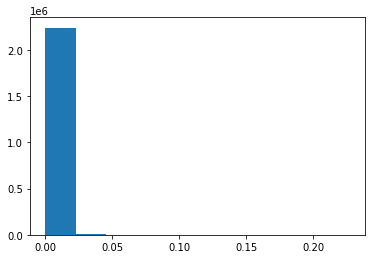

In [108]:
import matplotlib.pyplot as plt
# _ = plt.hist(model1.softmax(model1.C_r).reshape(-1).detach().cpu().numpy(), bins = 10)
_ = plt.hist(model1.softmax(model1.Pl @ model1.Pr).reshape(-1).detach().cpu().numpy(), bins = 10)

In [109]:
# model1.load_state_dict(torch.load(f'../check_points/2b3c_ziqi1.pt'))

None


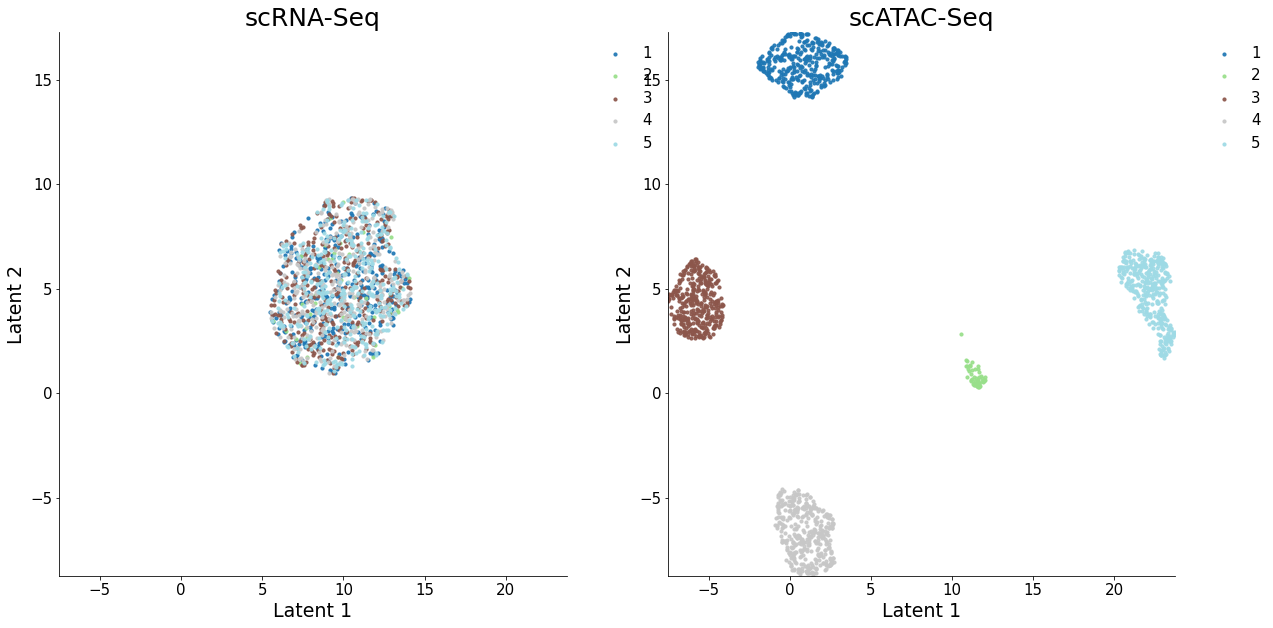

In [110]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = model1.meta_rna["pop"].values[:,None]
label_atac = model1.meta_atac["pop"].values[:,None]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

None


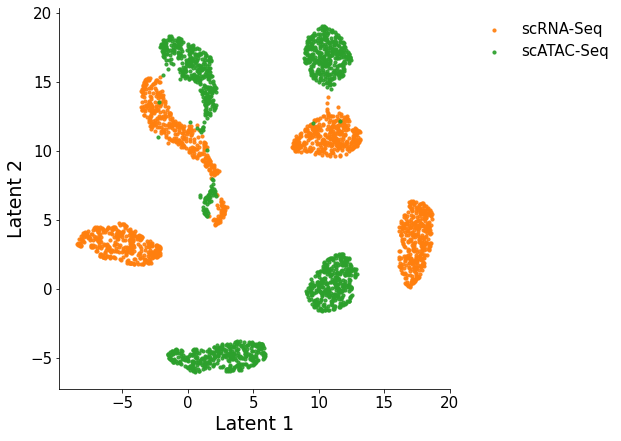

In [73]:
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "modality", save = None, figsize = (7,7))

None


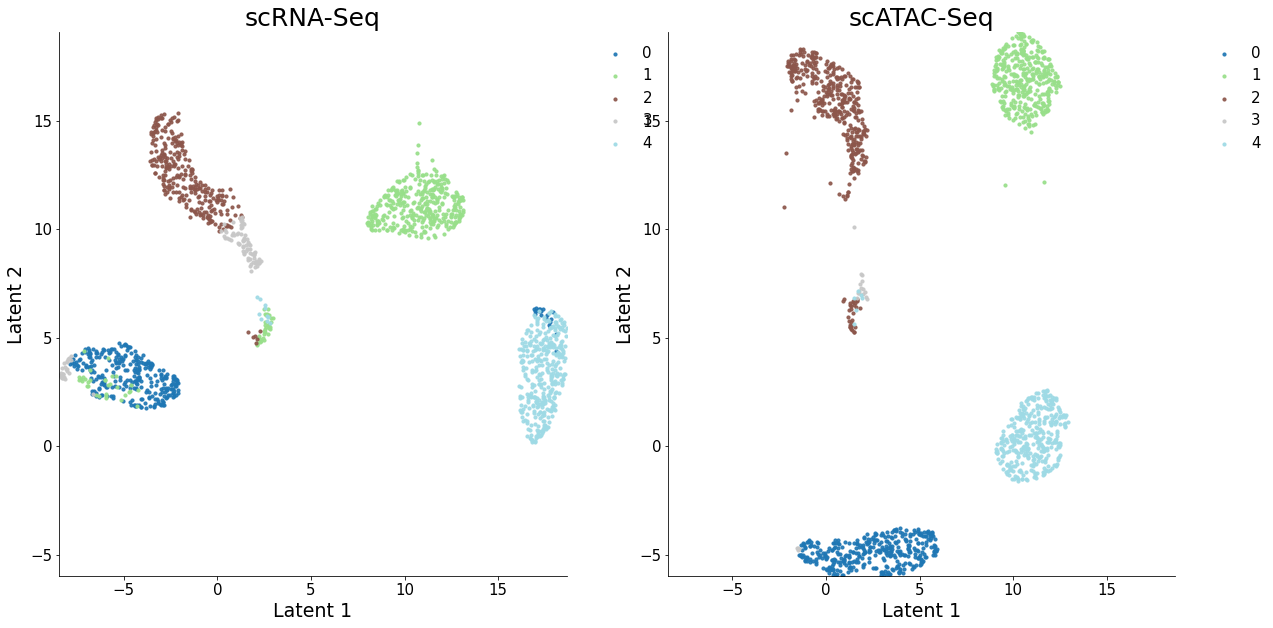

In [74]:
utils.plot_latent(z_rna, z_atac, max_rna, max_atac, mode= "separate", save = None)

# Current best

In [25]:
model1 = model.cfrm_best(dir = '../data/simulated/2b5c_ziqi2/', N = 5, batch_size = 0.1, 
                             interval = 1, lr = 1e-3, alpha = [1000, 1000, 100, 0.1]).to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)



Initial Loss is 1420.37439
Epoch 1, Validating Loss: 1414.2432
	 loss 1: 493.83411
	 loss 2: 992.44324
	 loss 3: -72.66506
	 loss 4: 0.63080
Epoch 2, Validating Loss: 1403.7383
	 loss 1: 489.80038
	 loss 2: 985.97131
	 loss 3: -72.66437
	 loss 4: 0.63080
Epoch 3, Validating Loss: 1392.6007
	 loss 1: 485.53247
	 loss 2: 979.10150
	 loss 3: -72.66420
	 loss 4: 0.63080
Epoch 4, Validating Loss: 1380.9689
	 loss 1: 481.09619
	 loss 2: 971.90619
	 loss 3: -72.66438
	 loss 4: 0.63080
Epoch 5, Validating Loss: 1369.0262
	 loss 1: 476.57199
	 loss 2: 964.48804
	 loss 3: -72.66468
	 loss 4: 0.63080
Epoch 6, Validating Loss: 1356.8790
	 loss 1: 471.99695
	 loss 2: 956.91626
	 loss 3: -72.66504
	 loss 4: 0.63080
Epoch 7, Validating Loss: 1344.5514
	 loss 1: 467.37912
	 loss 2: 949.20691
	 loss 3: -72.66549
	 loss 4: 0.63080
Epoch 8, Validating Loss: 1332.1674
	 loss 1: 462.76248
	 loss 2: 941.43976
	 loss 3: -72.66577
	 loss 4: 0.63080
Epoch 9, Validating Loss: 1319.8278
	 loss 1: 458.17099
	 los

Epoch 80, Validating Loss: 672.9007
	 loss 1: 230.39845
	 loss 2: 514.58472
	 loss 3: -72.71287
	 loss 4: 0.63045
Epoch 81, Validating Loss: 666.6906
	 loss 1: 228.30588
	 loss 2: 510.46765
	 loss 3: -72.71346
	 loss 4: 0.63044
Epoch 82, Validating Loss: 660.5465
	 loss 1: 226.23547
	 loss 2: 506.39462
	 loss 3: -72.71406
	 loss 4: 0.63043
Epoch 83, Validating Loss: 654.5178
	 loss 1: 224.21474
	 loss 2: 502.38739
	 loss 3: -72.71473
	 loss 4: 0.63042
Epoch 84, Validating Loss: 648.5377
	 loss 1: 222.20386
	 loss 2: 498.41876
	 loss 3: -72.71542
	 loss 4: 0.63042
Epoch 85, Validating Loss: 642.6104
	 loss 1: 220.19885
	 loss 2: 494.49734
	 loss 3: -72.71618
	 loss 4: 0.63041
Epoch 86, Validating Loss: 636.7464
	 loss 1: 218.20172
	 loss 2: 490.63123
	 loss 3: -72.71690
	 loss 4: 0.63040
Epoch 87, Validating Loss: 630.9584
	 loss 1: 216.22952
	 loss 2: 486.81598
	 loss 3: -72.71747
	 loss 4: 0.63039
Epoch 88, Validating Loss: 625.2120
	 loss 1: 214.28987
	 loss 2: 483.00964
	 loss 3: -7

Epoch 157, Validating Loss: 347.3082
	 loss 1: 123.04726
	 loss 2: 296.31677
	 loss 3: -72.68567
	 loss 4: 0.62979
Epoch 158, Validating Loss: 344.5524
	 loss 1: 122.16483
	 loss 2: 294.44250
	 loss 3: -72.68468
	 loss 4: 0.62978
Epoch 159, Validating Loss: 341.7982
	 loss 1: 121.27969
	 loss 2: 292.57263
	 loss 3: -72.68388
	 loss 4: 0.62977
Epoch 160, Validating Loss: 339.0488
	 loss 1: 120.39382
	 loss 2: 290.70816
	 loss 3: -72.68299
	 loss 4: 0.62976
Epoch 161, Validating Loss: 336.3151
	 loss 1: 119.51810
	 loss 2: 288.84912
	 loss 3: -72.68190
	 loss 4: 0.62975
Epoch 162, Validating Loss: 333.5865
	 loss 1: 118.65695
	 loss 2: 286.98029
	 loss 3: -72.68050
	 loss 4: 0.62974
Epoch 163, Validating Loss: 330.8583
	 loss 1: 117.80878
	 loss 2: 285.09857
	 loss 3: -72.67880
	 loss 4: 0.62973
Epoch 164, Validating Loss: 328.1552
	 loss 1: 116.97487
	 loss 2: 283.22757
	 loss 3: -72.67699
	 loss 4: 0.62972
Epoch 165, Validating Loss: 325.4843
	 loss 1: 116.14823
	 loss 2: 281.38159
	 l

Epoch 234, Validating Loss: 192.4253
	 loss 1: 74.94172
	 loss 2: 189.43767
	 loss 3: -72.58321
	 loss 4: 0.62913
Epoch 235, Validating Loss: 191.0309
	 loss 1: 74.52753
	 loss 2: 188.45607
	 loss 3: -72.58178
	 loss 4: 0.62913
Epoch 236, Validating Loss: 189.6534
	 loss 1: 74.11894
	 loss 2: 187.48592
	 loss 3: -72.58063
	 loss 4: 0.62912
Epoch 237, Validating Loss: 188.2872
	 loss 1: 73.71671
	 loss 2: 186.52065
	 loss 3: -72.57929
	 loss 4: 0.62911
Epoch 238, Validating Loss: 186.9376
	 loss 1: 73.32382
	 loss 2: 185.56221
	 loss 3: -72.57752
	 loss 4: 0.62910
Epoch 239, Validating Loss: 185.6061
	 loss 1: 72.93798
	 loss 2: 184.61469
	 loss 3: -72.57568
	 loss 4: 0.62909
Epoch 240, Validating Loss: 184.2923
	 loss 1: 72.55635
	 loss 2: 183.68059
	 loss 3: -72.57372
	 loss 4: 0.62909
Epoch 241, Validating Loss: 182.9893
	 loss 1: 72.17983
	 loss 2: 182.75232
	 loss 3: -72.57188
	 loss 4: 0.62908
Epoch 242, Validating Loss: 181.6922
	 loss 1: 71.80211
	 loss 2: 181.83138
	 loss 3: -7

Epoch 310, Validating Loss: 114.0000
	 loss 1: 52.97297
	 loss 2: 132.87076
	 loss 3: -72.47230
	 loss 4: 0.62860
Epoch 311, Validating Loss: 113.2839
	 loss 1: 52.78368
	 loss 2: 132.34312
	 loss 3: -72.47150
	 loss 4: 0.62859
Epoch 312, Validating Loss: 112.5731
	 loss 1: 52.59785
	 loss 2: 131.81740
	 loss 3: -72.47076
	 loss 4: 0.62859
Epoch 313, Validating Loss: 111.8627
	 loss 1: 52.41259
	 loss 2: 131.29134
	 loss 3: -72.46980
	 loss 4: 0.62858
Epoch 314, Validating Loss: 111.1505
	 loss 1: 52.22857
	 loss 2: 130.76204
	 loss 3: -72.46866
	 loss 4: 0.62858
Epoch 315, Validating Loss: 110.4371
	 loss 1: 52.04511
	 loss 2: 130.23100
	 loss 3: -72.46763
	 loss 4: 0.62857
Epoch 316, Validating Loss: 109.7310
	 loss 1: 51.86401
	 loss 2: 129.70517
	 loss 3: -72.46674
	 loss 4: 0.62856
Epoch 317, Validating Loss: 109.0257
	 loss 1: 51.68229
	 loss 2: 129.18056
	 loss 3: -72.46571
	 loss 4: 0.62856
Epoch 318, Validating Loss: 108.3230
	 loss 1: 51.50176
	 loss 2: 128.65704
	 loss 3: -7

Epoch 387, Validating Loss: 71.5836
	 loss 1: 42.61343
	 loss 2: 100.74763
	 loss 3: -72.40569
	 loss 4: 0.62818
Epoch 388, Validating Loss: 71.1835
	 loss 1: 42.52466
	 loss 2: 100.43580
	 loss 3: -72.40512
	 loss 4: 0.62818
Epoch 389, Validating Loss: 70.7859
	 loss 1: 42.43686
	 loss 2: 100.12554
	 loss 3: -72.40471
	 loss 4: 0.62817
Epoch 390, Validating Loss: 70.3896
	 loss 1: 42.35064
	 loss 2: 99.81521
	 loss 3: -72.40442
	 loss 4: 0.62817
Epoch 391, Validating Loss: 69.9891
	 loss 1: 42.26447
	 loss 2: 99.50060
	 loss 3: -72.40416
	 loss 4: 0.62816
Epoch 392, Validating Loss: 69.5916
	 loss 1: 42.17807
	 loss 2: 99.18897
	 loss 3: -72.40363
	 loss 4: 0.62816
Epoch 393, Validating Loss: 69.1958
	 loss 1: 42.09154
	 loss 2: 98.87897
	 loss 3: -72.40285
	 loss 4: 0.62815
Epoch 394, Validating Loss: 68.8017
	 loss 1: 42.00544
	 loss 2: 98.56995
	 loss 3: -72.40185
	 loss 4: 0.62815
Epoch 395, Validating Loss: 68.4100
	 loss 1: 41.92222
	 loss 2: 98.26035
	 loss 3: -72.40075
	 loss 

Epoch 464, Validating Loss: 48.6730
	 loss 1: 37.92979
	 loss 2: 82.49800
	 loss 3: -72.38266
	 loss 4: 0.62790
Epoch 465, Validating Loss: 48.4606
	 loss 1: 37.89280
	 loss 2: 82.32207
	 loss 3: -72.38218
	 loss 4: 0.62790
Epoch 466, Validating Loss: 48.2491
	 loss 1: 37.85635
	 loss 2: 82.14657
	 loss 3: -72.38168
	 loss 4: 0.62789
Epoch 467, Validating Loss: 48.0382
	 loss 1: 37.81970
	 loss 2: 81.97195
	 loss 3: -72.38134
	 loss 4: 0.62789
Epoch 468, Validating Loss: 47.8273
	 loss 1: 37.78206
	 loss 2: 81.79836
	 loss 3: -72.38100
	 loss 4: 0.62789
Epoch 469, Validating Loss: 47.6195
	 loss 1: 37.74463
	 loss 2: 81.62769
	 loss 3: -72.38069
	 loss 4: 0.62788
Epoch 470, Validating Loss: 47.4175
	 loss 1: 37.70844
	 loss 2: 81.46186
	 loss 3: -72.38065
	 loss 4: 0.62788
Epoch 471, Validating Loss: 47.2193
	 loss 1: 37.67311
	 loss 2: 81.29904
	 loss 3: -72.38070
	 loss 4: 0.62788
Epoch 472, Validating Loss: 47.0209
	 loss 1: 37.63810
	 loss 2: 81.13573
	 loss 3: -72.38081
	 loss 4: 

Epoch 541, Validating Loss: 36.4522
	 loss 1: 35.88306
	 loss 2: 72.34315
	 loss 3: -72.40178
	 loss 4: 0.62774
Epoch 542, Validating Loss: 36.3423
	 loss 1: 35.86702
	 loss 2: 72.25011
	 loss 3: -72.40255
	 loss 4: 0.62774
Epoch 543, Validating Loss: 36.2315
	 loss 1: 35.85087
	 loss 2: 72.15624
	 loss 3: -72.40334
	 loss 4: 0.62774
Epoch 544, Validating Loss: 36.1225
	 loss 1: 35.83529
	 loss 2: 72.06336
	 loss 3: -72.40385
	 loss 4: 0.62774
Epoch 545, Validating Loss: 36.0138
	 loss 1: 35.81980
	 loss 2: 71.97050
	 loss 3: -72.40421
	 loss 4: 0.62774
Epoch 546, Validating Loss: 35.9049
	 loss 1: 35.80420
	 loss 2: 71.87780
	 loss 3: -72.40480
	 loss 4: 0.62774
Epoch 547, Validating Loss: 35.7971
	 loss 1: 35.78848
	 loss 2: 71.78638
	 loss 3: -72.40548
	 loss 4: 0.62773
Epoch 548, Validating Loss: 35.6912
	 loss 1: 35.77317
	 loss 2: 71.69617
	 loss 3: -72.40592
	 loss 4: 0.62773
Epoch 549, Validating Loss: 35.5861
	 loss 1: 35.75858
	 loss 2: 71.60623
	 loss 3: -72.40646
	 loss 4: 

Epoch 618, Validating Loss: 30.0622
	 loss 1: 35.03701
	 loss 2: 66.87498
	 loss 3: -72.47754
	 loss 4: 0.62770
Epoch 619, Validating Loss: 30.0019
	 loss 1: 35.02962
	 loss 2: 66.82358
	 loss 3: -72.47903
	 loss 4: 0.62770
Epoch 620, Validating Loss: 29.9420
	 loss 1: 35.02247
	 loss 2: 66.77229
	 loss 3: -72.48046
	 loss 4: 0.62770
Epoch 621, Validating Loss: 29.8821
	 loss 1: 35.01546
	 loss 2: 66.72079
	 loss 3: -72.48186
	 loss 4: 0.62770
Epoch 622, Validating Loss: 29.8228
	 loss 1: 35.00854
	 loss 2: 66.66967
	 loss 3: -72.48313
	 loss 4: 0.62770
Epoch 623, Validating Loss: 29.7642
	 loss 1: 35.00156
	 loss 2: 66.61926
	 loss 3: -72.48427
	 loss 4: 0.62770
Epoch 624, Validating Loss: 29.7075
	 loss 1: 34.99449
	 loss 2: 66.57055
	 loss 3: -72.48526
	 loss 4: 0.62770
Epoch 625, Validating Loss: 29.6521
	 loss 1: 34.98769
	 loss 2: 66.52285
	 loss 3: -72.48618
	 loss 4: 0.62770
Epoch 626, Validating Loss: 29.5975
	 loss 1: 34.98107
	 loss 2: 66.47615
	 loss 3: -72.48740
	 loss 4: 

Epoch 695, Validating Loss: 26.6665
	 loss 1: 34.67392
	 loss 2: 63.95269
	 loss 3: -72.58781
	 loss 4: 0.62773
Epoch 696, Validating Loss: 26.6361
	 loss 1: 34.67115
	 loss 2: 63.92659
	 loss 3: -72.58936
	 loss 4: 0.62773
Epoch 697, Validating Loss: 26.6056
	 loss 1: 34.66854
	 loss 2: 63.90020
	 loss 3: -72.59089
	 loss 4: 0.62773
Epoch 698, Validating Loss: 26.5750
	 loss 1: 34.66568
	 loss 2: 63.87395
	 loss 3: -72.59233
	 loss 4: 0.62773
Epoch 699, Validating Loss: 26.5447
	 loss 1: 34.66284
	 loss 2: 63.84775
	 loss 3: -72.59360
	 loss 4: 0.62773
Epoch 700, Validating Loss: 26.5140
	 loss 1: 34.66008
	 loss 2: 63.82114
	 loss 3: -72.59492
	 loss 4: 0.62773
Epoch 701, Validating Loss: 26.4841
	 loss 1: 34.65779
	 loss 2: 63.79487
	 loss 3: -72.59627
	 loss 4: 0.62773
Epoch 702, Validating Loss: 26.4540
	 loss 1: 34.65541
	 loss 2: 63.76853
	 loss 3: -72.59772
	 loss 4: 0.62774
Epoch 703, Validating Loss: 26.4240
	 loss 1: 34.65289
	 loss 2: 63.74255
	 loss 3: -72.59921
	 loss 4: 

Epoch 772, Validating Loss: 24.9384
	 loss 1: 34.53760
	 loss 2: 62.48641
	 loss 3: -72.71342
	 loss 4: 0.62781
Epoch 773, Validating Loss: 24.9224
	 loss 1: 34.53645
	 loss 2: 62.47346
	 loss 3: -72.71531
	 loss 4: 0.62782
Epoch 774, Validating Loss: 24.9069
	 loss 1: 34.53554
	 loss 2: 62.46064
	 loss 3: -72.71713
	 loss 4: 0.62782
Epoch 775, Validating Loss: 24.8917
	 loss 1: 34.53478
	 loss 2: 62.44796
	 loss 3: -72.71881
	 loss 4: 0.62782
Epoch 776, Validating Loss: 24.8771
	 loss 1: 34.53407
	 loss 2: 62.43540
	 loss 3: -72.72017
	 loss 4: 0.62782
Epoch 777, Validating Loss: 24.8626
	 loss 1: 34.53357
	 loss 2: 62.42286
	 loss 3: -72.72161
	 loss 4: 0.62782
Epoch 778, Validating Loss: 24.8476
	 loss 1: 34.53313
	 loss 2: 62.41008
	 loss 3: -72.72340
	 loss 4: 0.62782
Epoch 779, Validating Loss: 24.8326
	 loss 1: 34.53262
	 loss 2: 62.39740
	 loss 3: -72.72526
	 loss 4: 0.62782
Epoch 780, Validating Loss: 24.8173
	 loss 1: 34.53167
	 loss 2: 62.38498
	 loss 3: -72.72716
	 loss 4: 

Epoch 849, Validating Loss: 24.0342
	 loss 1: 34.48233
	 loss 2: 61.78322
	 loss 3: -72.85931
	 loss 4: 0.62794
Epoch 850, Validating Loss: 24.0253
	 loss 1: 34.48185
	 loss 2: 61.77678
	 loss 3: -72.86123
	 loss 4: 0.62794
Epoch 851, Validating Loss: 24.0168
	 loss 1: 34.48178
	 loss 2: 61.77043
	 loss 3: -72.86337
	 loss 4: 0.62794
Epoch 852, Validating Loss: 24.0086
	 loss 1: 34.48193
	 loss 2: 61.76428
	 loss 3: -72.86553
	 loss 4: 0.62794
Epoch 853, Validating Loss: 24.0002
	 loss 1: 34.48191
	 loss 2: 61.75821
	 loss 3: -72.86790
	 loss 4: 0.62794
Epoch 854, Validating Loss: 23.9909
	 loss 1: 34.48137
	 loss 2: 61.75199
	 loss 3: -72.87043
	 loss 4: 0.62795
Epoch 855, Validating Loss: 23.9813
	 loss 1: 34.48038
	 loss 2: 61.74579
	 loss 3: -72.87280
	 loss 4: 0.62795
Epoch 856, Validating Loss: 23.9724
	 loss 1: 34.47955
	 loss 2: 61.73980
	 loss 3: -72.87494
	 loss 4: 0.62795
Epoch 857, Validating Loss: 23.9636
	 loss 1: 34.47874
	 loss 2: 61.73404
	 loss 3: -72.87713
	 loss 4: 

Epoch 924, Validating Loss: 23.5284
	 loss 1: 34.45802
	 loss 2: 61.45253
	 loss 3: -73.01023
	 loss 4: 0.62808
Epoch 925, Validating Loss: 23.5231
	 loss 1: 34.45785
	 loss 2: 61.44973
	 loss 3: -73.01260
	 loss 4: 0.62808
Epoch 926, Validating Loss: 23.5176
	 loss 1: 34.45770
	 loss 2: 61.44674
	 loss 3: -73.01495
	 loss 4: 0.62808
Epoch 927, Validating Loss: 23.5119
	 loss 1: 34.45777
	 loss 2: 61.44368
	 loss 3: -73.01760
	 loss 4: 0.62808
Epoch 928, Validating Loss: 23.5066
	 loss 1: 34.45824
	 loss 2: 61.44060
	 loss 3: -73.02029
	 loss 4: 0.62809
Epoch 929, Validating Loss: 23.5015
	 loss 1: 34.45879
	 loss 2: 61.43750
	 loss 3: -73.02290
	 loss 4: 0.62809
Epoch 930, Validating Loss: 23.4963
	 loss 1: 34.45912
	 loss 2: 61.43441
	 loss 3: -73.02534
	 loss 4: 0.62809
Epoch 931, Validating Loss: 23.4909
	 loss 1: 34.45889
	 loss 2: 61.43148
	 loss 3: -73.02756
	 loss 4: 0.62809
Epoch 932, Validating Loss: 23.4854
	 loss 1: 34.45828
	 loss 2: 61.42882
	 loss 3: -73.02978
	 loss 4: 

Epoch 1001, Validating Loss: 23.1815
	 loss 1: 34.44530
	 loss 2: 61.29045
	 loss 3: -73.18250
	 loss 4: 0.62824
Epoch 1002, Validating Loss: 23.1771
	 loss 1: 34.44501
	 loss 2: 61.28898
	 loss 3: -73.18513
	 loss 4: 0.62824
Epoch 1003, Validating Loss: 23.1732
	 loss 1: 34.44489
	 loss 2: 61.28760
	 loss 3: -73.18759
	 loss 4: 0.62825
Epoch 1004, Validating Loss: 23.1696
	 loss 1: 34.44500
	 loss 2: 61.28638
	 loss 3: -73.19006
	 loss 4: 0.62825
Epoch 1005, Validating Loss: 23.1661
	 loss 1: 34.44506
	 loss 2: 61.28524
	 loss 3: -73.19249
	 loss 4: 0.62825
Epoch 1006, Validating Loss: 23.1627
	 loss 1: 34.44521
	 loss 2: 61.28394
	 loss 3: -73.19472
	 loss 4: 0.62825
Epoch 1007, Validating Loss: 23.1590
	 loss 1: 34.44497
	 loss 2: 61.28277
	 loss 3: -73.19703
	 loss 4: 0.62826
Epoch 1008, Validating Loss: 23.1551
	 loss 1: 34.44451
	 loss 2: 61.28161
	 loss 3: -73.19926
	 loss 4: 0.62826
Epoch 1009, Validating Loss: 23.1511
	 loss 1: 34.44416
	 loss 2: 61.28035
	 loss 3: -73.20164
	

Epoch 1076, Validating Loss: 22.9325
	 loss 1: 34.43291
	 loss 2: 61.21706
	 loss 3: -73.34586
	 loss 4: 0.62840
Epoch 1077, Validating Loss: 22.9296
	 loss 1: 34.43199
	 loss 2: 61.21687
	 loss 3: -73.34770
	 loss 4: 0.62840
Epoch 1078, Validating Loss: 22.9268
	 loss 1: 34.43149
	 loss 2: 61.21653
	 loss 3: -73.34967
	 loss 4: 0.62840
Epoch 1079, Validating Loss: 22.9239
	 loss 1: 34.43130
	 loss 2: 61.21611
	 loss 3: -73.35188
	 loss 4: 0.62841
Epoch 1080, Validating Loss: 22.9206
	 loss 1: 34.43068
	 loss 2: 61.21564
	 loss 3: -73.35408
	 loss 4: 0.62841
Epoch 1081, Validating Loss: 22.9172
	 loss 1: 34.42979
	 loss 2: 61.21514
	 loss 3: -73.35609
	 loss 4: 0.62841
Epoch 1082, Validating Loss: 22.9141
	 loss 1: 34.42918
	 loss 2: 61.21460
	 loss 3: -73.35814
	 loss 4: 0.62841
Epoch 1083, Validating Loss: 22.9102
	 loss 1: 34.42840
	 loss 2: 61.21378
	 loss 3: -73.36043
	 loss 4: 0.62842
Epoch 1084, Validating Loss: 22.9054
	 loss 1: 34.42707
	 loss 2: 61.21286
	 loss 3: -73.36291
	

Epoch 1151, Validating Loss: 22.6975
	 loss 1: 34.41624
	 loss 2: 61.17049
	 loss 3: -73.51777
	 loss 4: 0.62856
Epoch 1152, Validating Loss: 22.6952
	 loss 1: 34.41647
	 loss 2: 61.16999
	 loss 3: -73.51984
	 loss 4: 0.62856
Epoch 1153, Validating Loss: 22.6931
	 loss 1: 34.41700
	 loss 2: 61.16959
	 loss 3: -73.52201
	 loss 4: 0.62856
Epoch 1154, Validating Loss: 22.6909
	 loss 1: 34.41716
	 loss 2: 61.16920
	 loss 3: -73.52402
	 loss 4: 0.62856
Epoch 1155, Validating Loss: 22.6886
	 loss 1: 34.41729
	 loss 2: 61.16878
	 loss 3: -73.52599
	 loss 4: 0.62857
Epoch 1156, Validating Loss: 22.6863
	 loss 1: 34.41756
	 loss 2: 61.16831
	 loss 3: -73.52815
	 loss 4: 0.62857
Epoch 1157, Validating Loss: 22.6831
	 loss 1: 34.41727
	 loss 2: 61.16776
	 loss 3: -73.53046
	 loss 4: 0.62857
Epoch 1158, Validating Loss: 22.6795
	 loss 1: 34.41666
	 loss 2: 61.16722
	 loss 3: -73.53296
	 loss 4: 0.62857
Epoch 1159, Validating Loss: 22.6761
	 loss 1: 34.41626
	 loss 2: 61.16677
	 loss 3: -73.53555
	

Epoch 1228, Validating Loss: 22.4620
	 loss 1: 34.40680
	 loss 2: 61.13028
	 loss 3: -73.70383
	 loss 4: 0.62872
Epoch 1229, Validating Loss: 22.4592
	 loss 1: 34.40705
	 loss 2: 61.12997
	 loss 3: -73.70657
	 loss 4: 0.62872
Epoch 1230, Validating Loss: 22.4563
	 loss 1: 34.40703
	 loss 2: 61.12959
	 loss 3: -73.70907
	 loss 4: 0.62872
Epoch 1231, Validating Loss: 22.4532
	 loss 1: 34.40679
	 loss 2: 61.12907
	 loss 3: -73.71137
	 loss 4: 0.62872
Epoch 1232, Validating Loss: 22.4501
	 loss 1: 34.40641
	 loss 2: 61.12856
	 loss 3: -73.71357
	 loss 4: 0.62873
Epoch 1233, Validating Loss: 22.4467
	 loss 1: 34.40560
	 loss 2: 61.12806
	 loss 3: -73.71574
	 loss 4: 0.62873
Epoch 1234, Validating Loss: 22.4430
	 loss 1: 34.40476
	 loss 2: 61.12747
	 loss 3: -73.71791
	 loss 4: 0.62873
Epoch 1235, Validating Loss: 22.4398
	 loss 1: 34.40395
	 loss 2: 61.12699
	 loss 3: -73.71986
	 loss 4: 0.62873
Epoch 1236, Validating Loss: 22.4370
	 loss 1: 34.40347
	 loss 2: 61.12660
	 loss 3: -73.72182
	

Epoch 1302, Validating Loss: 22.2314
	 loss 1: 34.38597
	 loss 2: 61.09581
	 loss 3: -73.87928
	 loss 4: 0.62886
Epoch 1303, Validating Loss: 22.2284
	 loss 1: 34.38560
	 loss 2: 61.09562
	 loss 3: -73.88171
	 loss 4: 0.62886
Epoch 1304, Validating Loss: 22.2254
	 loss 1: 34.38515
	 loss 2: 61.09545
	 loss 3: -73.88411
	 loss 4: 0.62886
Epoch 1305, Validating Loss: 22.2220
	 loss 1: 34.38457
	 loss 2: 61.09491
	 loss 3: -73.88638
	 loss 4: 0.62886
Epoch 1306, Validating Loss: 22.2189
	 loss 1: 34.38454
	 loss 2: 61.09418
	 loss 3: -73.88869
	 loss 4: 0.62886
Epoch 1307, Validating Loss: 22.2162
	 loss 1: 34.38495
	 loss 2: 61.09346
	 loss 3: -73.89104
	 loss 4: 0.62887
Epoch 1308, Validating Loss: 22.2141
	 loss 1: 34.38588
	 loss 2: 61.09290
	 loss 3: -73.89356
	 loss 4: 0.62887
Epoch 1309, Validating Loss: 22.2120
	 loss 1: 34.38691
	 loss 2: 61.09233
	 loss 3: -73.89614
	 loss 4: 0.62887
Epoch 1310, Validating Loss: 22.2107
	 loss 1: 34.38861
	 loss 2: 61.09167
	 loss 3: -73.89849
	

Epoch 1383, Validating Loss: 21.9960
	 loss 1: 34.37212
	 loss 2: 61.05054
	 loss 3: -74.05562
	 loss 4: 0.62900
Epoch 1384, Validating Loss: 21.9922
	 loss 1: 34.37166
	 loss 2: 61.04973
	 loss 3: -74.05817
	 loss 4: 0.62900
Epoch 1385, Validating Loss: 21.9884
	 loss 1: 34.37098
	 loss 2: 61.04913
	 loss 3: -74.06067
	 loss 4: 0.62900
Epoch 1386, Validating Loss: 21.9858
	 loss 1: 34.37112
	 loss 2: 61.04862
	 loss 3: -74.06299
	 loss 4: 0.62901
Epoch 1387, Validating Loss: 21.9838
	 loss 1: 34.37165
	 loss 2: 61.04811
	 loss 3: -74.06498
	 loss 4: 0.62901
Epoch 1388, Validating Loss: 21.9818
	 loss 1: 34.37233
	 loss 2: 61.04730
	 loss 3: -74.06688
	 loss 4: 0.62901
Epoch 1389, Validating Loss: 21.9794
	 loss 1: 34.37291
	 loss 2: 61.04645
	 loss 3: -74.06898
	 loss 4: 0.62901
Epoch 1390, Validating Loss: 21.9771
	 loss 1: 34.37361
	 loss 2: 61.04578
	 loss 3: -74.07131
	 loss 4: 0.62901
Epoch 1391, Validating Loss: 21.9750
	 loss 1: 34.37424
	 loss 2: 61.04549
	 loss 3: -74.07372
	

	 loss 1: 34.35222
	 loss 2: 60.99458
	 loss 3: -74.21795
	 loss 4: 0.62910
Epoch 1457, Validating Loss: 21.7561
	 loss 1: 34.35297
	 loss 2: 60.99371
	 loss 3: -74.21972
	 loss 4: 0.62910
Epoch 1458, Validating Loss: 21.7548
	 loss 1: 34.35402
	 loss 2: 60.99314
	 loss 3: -74.22142
	 loss 4: 0.62910
Epoch 1459, Validating Loss: 21.7537
	 loss 1: 34.35509
	 loss 2: 60.99255
	 loss 3: -74.22307
	 loss 4: 0.62910
Epoch 1460, Validating Loss: 21.7524
	 loss 1: 34.35615
	 loss 2: 60.99199
	 loss 3: -74.22480
	 loss 4: 0.62910
Epoch 1461, Validating Loss: 21.7508
	 loss 1: 34.35691
	 loss 2: 60.99140
	 loss 3: -74.22662
	 loss 4: 0.62910
Epoch 1462, Validating Loss: 21.7486
	 loss 1: 34.35724
	 loss 2: 60.99067
	 loss 3: -74.22841
	 loss 4: 0.62910
Epoch 1463, Validating Loss: 21.7462
	 loss 1: 34.35700
	 loss 2: 60.99022
	 loss 3: -74.23010
	 loss 4: 0.62910
Epoch 1464, Validating Loss: 21.7429
	 loss 1: 34.35593
	 loss 2: 60.98962
	 loss 3: -74.23178
	 loss 4: 0.62911
Epoch 1465, Validati

	 loss 1: 34.33498
	 loss 2: 60.92470
	 loss 3: -74.37501
	 loss 4: 0.62916
Epoch 1532, Validating Loss: 21.5108
	 loss 1: 34.33431
	 loss 2: 60.92424
	 loss 3: -74.37694
	 loss 4: 0.62916
Epoch 1533, Validating Loss: 21.5079
	 loss 1: 34.33368
	 loss 2: 60.92362
	 loss 3: -74.37857
	 loss 4: 0.62916
Epoch 1534, Validating Loss: 21.5047
	 loss 1: 34.33277
	 loss 2: 60.92277
	 loss 3: -74.37996
	 loss 4: 0.62916
Epoch 1535, Validating Loss: 21.5013
	 loss 1: 34.33194
	 loss 2: 60.92192
	 loss 3: -74.38168
	 loss 4: 0.62916
Epoch 1536, Validating Loss: 21.4980
	 loss 1: 34.33140
	 loss 2: 60.92103
	 loss 3: -74.38364
	 loss 4: 0.62916
Epoch 1537, Validating Loss: 21.4947
	 loss 1: 34.33100
	 loss 2: 60.92002
	 loss 3: -74.38552
	 loss 4: 0.62916
Epoch 1538, Validating Loss: 21.4910
	 loss 1: 34.33043
	 loss 2: 60.91874
	 loss 3: -74.38728
	 loss 4: 0.62916
Epoch 1539, Validating Loss: 21.4863
	 loss 1: 34.32892
	 loss 2: 60.91743
	 loss 3: -74.38925
	 loss 4: 0.62916
Epoch 1540, Validati

Epoch 1605, Validating Loss: 21.2585
	 loss 1: 34.29451
	 loss 2: 60.83561
	 loss 3: -74.50080
	 loss 4: 0.62918
Epoch 1606, Validating Loss: 21.2562
	 loss 1: 34.29531
	 loss 2: 60.83462
	 loss 3: -74.50291
	 loss 4: 0.62918
Epoch 1607, Validating Loss: 21.2536
	 loss 1: 34.29530
	 loss 2: 60.83365
	 loss 3: -74.50449
	 loss 4: 0.62918
Epoch 1608, Validating Loss: 21.2514
	 loss 1: 34.29516
	 loss 2: 60.83274
	 loss 3: -74.50564
	 loss 4: 0.62918
Epoch 1609, Validating Loss: 21.2489
	 loss 1: 34.29508
	 loss 2: 60.83156
	 loss 3: -74.50697
	 loss 4: 0.62918
Epoch 1610, Validating Loss: 21.2454
	 loss 1: 34.29416
	 loss 2: 60.83065
	 loss 3: -74.50860
	 loss 4: 0.62918
Epoch 1611, Validating Loss: 21.2413
	 loss 1: 34.29263
	 loss 2: 60.82977
	 loss 3: -74.51029
	 loss 4: 0.62918
Epoch 1612, Validating Loss: 21.2379
	 loss 1: 34.29144
	 loss 2: 60.82915
	 loss 3: -74.51189
	 loss 4: 0.62918
Epoch 1613, Validating Loss: 21.2341
	 loss 1: 34.29040
	 loss 2: 60.82796
	 loss 3: -74.51342
	

Epoch 1678, Validating Loss: 20.9891
	 loss 1: 34.24920
	 loss 2: 60.72826
	 loss 3: -74.61745
	 loss 4: 0.62914
Epoch 1679, Validating Loss: 20.9856
	 loss 1: 34.24859
	 loss 2: 60.72655
	 loss 3: -74.61871
	 loss 4: 0.62913
Epoch 1680, Validating Loss: 20.9817
	 loss 1: 34.24796
	 loss 2: 60.72459
	 loss 3: -74.62002
	 loss 4: 0.62913
Epoch 1681, Validating Loss: 20.9771
	 loss 1: 34.24732
	 loss 2: 60.72219
	 loss 3: -74.62157
	 loss 4: 0.62913
Epoch 1682, Validating Loss: 20.9722
	 loss 1: 34.24650
	 loss 2: 60.71960
	 loss 3: -74.62302
	 loss 4: 0.62913
Epoch 1683, Validating Loss: 20.9685
	 loss 1: 34.24682
	 loss 2: 60.71674
	 loss 3: -74.62421
	 loss 4: 0.62913
Epoch 1684, Validating Loss: 20.9649
	 loss 1: 34.24718
	 loss 2: 60.71427
	 loss 3: -74.62563
	 loss 4: 0.62912
Epoch 1685, Validating Loss: 20.9610
	 loss 1: 34.24714
	 loss 2: 60.71201
	 loss 3: -74.62723
	 loss 4: 0.62912
Epoch 1686, Validating Loss: 20.9574
	 loss 1: 34.24711
	 loss 2: 60.70997
	 loss 3: -74.62881
	

Epoch 1754, Validating Loss: 20.6482
	 loss 1: 34.19910
	 loss 2: 60.54563
	 loss 3: -74.72549
	 loss 4: 0.62897
Epoch 1755, Validating Loss: 20.6453
	 loss 1: 34.19955
	 loss 2: 60.54280
	 loss 3: -74.72598
	 loss 4: 0.62897
Epoch 1756, Validating Loss: 20.6427
	 loss 1: 34.20044
	 loss 2: 60.53973
	 loss 3: -74.72643
	 loss 4: 0.62896
Epoch 1757, Validating Loss: 20.6401
	 loss 1: 34.20142
	 loss 2: 60.53640
	 loss 3: -74.72672
	 loss 4: 0.62896
Epoch 1758, Validating Loss: 20.6366
	 loss 1: 34.20172
	 loss 2: 60.53297
	 loss 3: -74.72701
	 loss 4: 0.62896
Epoch 1759, Validating Loss: 20.6321
	 loss 1: 34.20123
	 loss 2: 60.52951
	 loss 3: -74.72762
	 loss 4: 0.62895
Epoch 1760, Validating Loss: 20.6265
	 loss 1: 34.20017
	 loss 2: 60.52591
	 loss 3: -74.72852
	 loss 4: 0.62895
Epoch 1761, Validating Loss: 20.6221
	 loss 1: 34.19957
	 loss 2: 60.52266
	 loss 3: -74.72907
	 loss 4: 0.62895
Epoch 1762, Validating Loss: 20.6182
	 loss 1: 34.19908
	 loss 2: 60.51970
	 loss 3: -74.72949
	

Epoch 1830, Validating Loss: 20.2369
	 loss 1: 34.11471
	 loss 2: 60.28798
	 loss 3: -74.79451
	 loss 4: 0.62870
Epoch 1831, Validating Loss: 20.2300
	 loss 1: 34.11295
	 loss 2: 60.28415
	 loss 3: -74.79575
	 loss 4: 0.62869
Epoch 1832, Validating Loss: 20.2242
	 loss 1: 34.11185
	 loss 2: 60.28017
	 loss 3: -74.79654
	 loss 4: 0.62869
Epoch 1833, Validating Loss: 20.2183
	 loss 1: 34.11036
	 loss 2: 60.27639
	 loss 3: -74.79710
	 loss 4: 0.62868
Epoch 1834, Validating Loss: 20.2122
	 loss 1: 34.10877
	 loss 2: 60.27278
	 loss 3: -74.79800
	 loss 4: 0.62868
Epoch 1835, Validating Loss: 20.2056
	 loss 1: 34.10683
	 loss 2: 60.26935
	 loss 3: -74.79926
	 loss 4: 0.62867
Epoch 1836, Validating Loss: 20.1989
	 loss 1: 34.10490
	 loss 2: 60.26583
	 loss 3: -74.80054
	 loss 4: 0.62867
Epoch 1837, Validating Loss: 20.1924
	 loss 1: 34.10363
	 loss 2: 60.26203
	 loss 3: -74.80197
	 loss 4: 0.62866
Epoch 1838, Validating Loss: 20.1867
	 loss 1: 34.10334
	 loss 2: 60.25808
	 loss 3: -74.80338
	

Epoch 1908, Validating Loss: 19.7314
	 loss 1: 34.00001
	 loss 2: 59.94559
	 loss 3: -74.84245
	 loss 4: 0.62827
Epoch 1909, Validating Loss: 19.7242
	 loss 1: 33.99761
	 loss 2: 59.94077
	 loss 3: -74.84244
	 loss 4: 0.62826
Epoch 1910, Validating Loss: 19.7171
	 loss 1: 33.99582
	 loss 2: 59.93569
	 loss 3: -74.84269
	 loss 4: 0.62825
Epoch 1911, Validating Loss: 19.7099
	 loss 1: 33.99406
	 loss 2: 59.93046
	 loss 3: -74.84286
	 loss 4: 0.62824
Epoch 1912, Validating Loss: 19.7018
	 loss 1: 33.99126
	 loss 2: 59.92510
	 loss 3: -74.84279
	 loss 4: 0.62824
Epoch 1913, Validating Loss: 19.6946
	 loss 1: 33.98862
	 loss 2: 59.92026
	 loss 3: -74.84254
	 loss 4: 0.62823
Epoch 1914, Validating Loss: 19.6880
	 loss 1: 33.98665
	 loss 2: 59.91569
	 loss 3: -74.84257
	 loss 4: 0.62822
Epoch 1915, Validating Loss: 19.6808
	 loss 1: 33.98445
	 loss 2: 59.91085
	 loss 3: -74.84273
	 loss 4: 0.62822
Epoch 1916, Validating Loss: 19.6732
	 loss 1: 33.98182
	 loss 2: 59.90609
	 loss 3: -74.84290
	

Epoch 1986, Validating Loss: 19.0868
	 loss 1: 33.82526
	 loss 2: 59.47894
	 loss 3: -74.84502
	 loss 4: 0.62759
Epoch 1987, Validating Loss: 19.0769
	 loss 1: 33.82182
	 loss 2: 59.47187
	 loss 3: -74.84435
	 loss 4: 0.62758
Epoch 1988, Validating Loss: 19.0668
	 loss 1: 33.81849
	 loss 2: 59.46449
	 loss 3: -74.84372
	 loss 4: 0.62757
Epoch 1989, Validating Loss: 19.0564
	 loss 1: 33.81538
	 loss 2: 59.45665
	 loss 3: -74.84319
	 loss 4: 0.62756
Epoch 1990, Validating Loss: 19.0468
	 loss 1: 33.81282
	 loss 2: 59.44886
	 loss 3: -74.84241
	 loss 4: 0.62755
Epoch 1991, Validating Loss: 19.0377
	 loss 1: 33.81035
	 loss 2: 59.44145
	 loss 3: -74.84163
	 loss 4: 0.62754
Epoch 1992, Validating Loss: 19.0292
	 loss 1: 33.80787
	 loss 2: 59.43460
	 loss 3: -74.84080
	 loss 4: 0.62753
Epoch 1993, Validating Loss: 19.0200
	 loss 1: 33.80506
	 loss 2: 59.42741
	 loss 3: -74.84001
	 loss 4: 0.62752
Epoch 1994, Validating Loss: 19.0108
	 loss 1: 33.80194
	 loss 2: 59.42055
	 loss 3: -74.83921
	

Epoch 2061, Validating Loss: 18.3037
	 loss 1: 33.58735
	 loss 2: 58.87641
	 loss 3: -74.78676
	 loss 4: 0.62669
Epoch 2062, Validating Loss: 18.2918
	 loss 1: 33.58292
	 loss 2: 58.86763
	 loss 3: -74.78539
	 loss 4: 0.62667
Epoch 2063, Validating Loss: 18.2800
	 loss 1: 33.57802
	 loss 2: 58.85905
	 loss 3: -74.78368
	 loss 4: 0.62666
Epoch 2064, Validating Loss: 18.2687
	 loss 1: 33.57358
	 loss 2: 58.85071
	 loss 3: -74.78224
	 loss 4: 0.62665
Epoch 2065, Validating Loss: 18.2567
	 loss 1: 33.56892
	 loss 2: 58.84185
	 loss 3: -74.78073
	 loss 4: 0.62663
Epoch 2066, Validating Loss: 18.2454
	 loss 1: 33.56445
	 loss 2: 58.83381
	 loss 3: -74.77953
	 loss 4: 0.62662
Epoch 2067, Validating Loss: 18.2348
	 loss 1: 33.56079
	 loss 2: 58.82624
	 loss 3: -74.77884
	 loss 4: 0.62661
Epoch 2068, Validating Loss: 18.2246
	 loss 1: 33.55788
	 loss 2: 58.81833
	 loss 3: -74.77824
	 loss 4: 0.62660
Epoch 2069, Validating Loss: 18.2131
	 loss 1: 33.55447
	 loss 2: 58.80980
	 loss 3: -74.77773
	

Epoch 2140, Validating Loss: 17.2423
	 loss 1: 33.22607
	 loss 2: 58.06543
	 loss 3: -74.67464
	 loss 4: 0.62541
Epoch 2141, Validating Loss: 17.2259
	 loss 1: 33.22134
	 loss 2: 58.05247
	 loss 3: -74.67334
	 loss 4: 0.62539
Epoch 2142, Validating Loss: 17.2110
	 loss 1: 33.21753
	 loss 2: 58.03966
	 loss 3: -74.67155
	 loss 4: 0.62537
Epoch 2143, Validating Loss: 17.1971
	 loss 1: 33.21400
	 loss 2: 58.02747
	 loss 3: -74.66969
	 loss 4: 0.62535
Epoch 2144, Validating Loss: 17.1833
	 loss 1: 33.21036
	 loss 2: 58.01575
	 loss 3: -74.66817
	 loss 4: 0.62533
Epoch 2145, Validating Loss: 17.1681
	 loss 1: 33.20535
	 loss 2: 58.00372
	 loss 3: -74.66624
	 loss 4: 0.62531
Epoch 2146, Validating Loss: 17.1528
	 loss 1: 33.19987
	 loss 2: 57.99170
	 loss 3: -74.66405
	 loss 4: 0.62529
Epoch 2147, Validating Loss: 17.1376
	 loss 1: 33.19425
	 loss 2: 57.98051
	 loss 3: -74.66242
	 loss 4: 0.62527
Epoch 2148, Validating Loss: 17.1223
	 loss 1: 33.18895
	 loss 2: 57.96931
	 loss 3: -74.66119
	

Epoch 2219, Validating Loss: 15.8842
	 loss 1: 32.73954
	 loss 2: 57.00030
	 loss 3: -74.47926
	 loss 4: 0.62364
Epoch 2220, Validating Loss: 15.8670
	 loss 1: 32.73259
	 loss 2: 56.98643
	 loss 3: -74.47563
	 loss 4: 0.62362
Epoch 2221, Validating Loss: 15.8483
	 loss 1: 32.72494
	 loss 2: 56.97218
	 loss 3: -74.47243
	 loss 4: 0.62360
Epoch 2222, Validating Loss: 15.8301
	 loss 1: 32.71883
	 loss 2: 56.95693
	 loss 3: -74.46922
	 loss 4: 0.62357
Epoch 2223, Validating Loss: 15.8121
	 loss 1: 32.71309
	 loss 2: 56.94154
	 loss 3: -74.46609
	 loss 4: 0.62355
Epoch 2224, Validating Loss: 15.7939
	 loss 1: 32.70734
	 loss 2: 56.92613
	 loss 3: -74.46306
	 loss 4: 0.62353
Epoch 2225, Validating Loss: 15.7754
	 loss 1: 32.70016
	 loss 2: 56.91208
	 loss 3: -74.46030
	 loss 4: 0.62350
Epoch 2226, Validating Loss: 15.7567
	 loss 1: 32.69299
	 loss 2: 56.89799
	 loss 3: -74.45781
	 loss 4: 0.62348
Epoch 2227, Validating Loss: 15.7363
	 loss 1: 32.68478
	 loss 2: 56.88331
	 loss 3: -74.45519
	

	 loss 1: 32.12735
	 loss 2: 55.85404
	 loss 3: -74.24612
	 loss 4: 0.62166
Epoch 2293, Validating Loss: 14.3342
	 loss 1: 32.11787
	 loss 2: 55.83677
	 loss 3: -74.24205
	 loss 4: 0.62163
Epoch 2294, Validating Loss: 14.3104
	 loss 1: 32.10771
	 loss 2: 55.81876
	 loss 3: -74.23770
	 loss 4: 0.62160
Epoch 2295, Validating Loss: 14.2871
	 loss 1: 32.09708
	 loss 2: 55.80103
	 loss 3: -74.23257
	 loss 4: 0.62157
Epoch 2296, Validating Loss: 14.2645
	 loss 1: 32.08681
	 loss 2: 55.78365
	 loss 3: -74.22749
	 loss 4: 0.62153
Epoch 2297, Validating Loss: 14.2421
	 loss 1: 32.07732
	 loss 2: 55.76616
	 loss 3: -74.22294
	 loss 4: 0.62150
Epoch 2298, Validating Loss: 14.2201
	 loss 1: 32.06895
	 loss 2: 55.74870
	 loss 3: -74.21904
	 loss 4: 0.62147
Epoch 2299, Validating Loss: 14.1984
	 loss 1: 32.06052
	 loss 2: 55.73204
	 loss 3: -74.21561
	 loss 4: 0.62144
Epoch 2300, Validating Loss: 14.1766
	 loss 1: 32.05195
	 loss 2: 55.71539
	 loss 3: -74.21219
	 loss 4: 0.62142
Epoch 2301, Validati

	 loss 1: 31.31309
	 loss 2: 54.46125
	 loss 3: -73.92537
	 loss 4: 0.61913
Epoch 2374, Validating Loss: 12.4454
	 loss 1: 31.30301
	 loss 2: 54.44404
	 loss 3: -73.92076
	 loss 4: 0.61909
Epoch 2375, Validating Loss: 12.4228
	 loss 1: 31.29390
	 loss 2: 54.42657
	 loss 3: -73.91669
	 loss 4: 0.61906
Epoch 2376, Validating Loss: 12.4005
	 loss 1: 31.28475
	 loss 2: 54.40931
	 loss 3: -73.91259
	 loss 4: 0.61903
Epoch 2377, Validating Loss: 12.3770
	 loss 1: 31.27402
	 loss 2: 54.39184
	 loss 3: -73.90790
	 loss 4: 0.61899
Epoch 2378, Validating Loss: 12.3534
	 loss 1: 31.26336
	 loss 2: 54.37418
	 loss 3: -73.90312
	 loss 4: 0.61896
Epoch 2379, Validating Loss: 12.3299
	 loss 1: 31.25255
	 loss 2: 54.35732
	 loss 3: -73.89889
	 loss 4: 0.61893
Epoch 2380, Validating Loss: 12.3060
	 loss 1: 31.24087
	 loss 2: 54.34153
	 loss 3: -73.89533
	 loss 4: 0.61890
Epoch 2381, Validating Loss: 12.2826
	 loss 1: 31.22932
	 loss 2: 54.32589
	 loss 3: -73.89144
	 loss 4: 0.61887
Epoch 2382, Validati

	 loss 1: 30.42501
	 loss 2: 53.07573
	 loss 3: -73.59660
	 loss 4: 0.61635
Epoch 2455, Validating Loss: 10.4973
	 loss 1: 30.41519
	 loss 2: 53.05772
	 loss 3: -73.59196
	 loss 4: 0.61631
Epoch 2456, Validating Loss: 10.4734
	 loss 1: 30.40551
	 loss 2: 53.03987
	 loss 3: -73.58820
	 loss 4: 0.61628
Epoch 2457, Validating Loss: 10.4489
	 loss 1: 30.39541
	 loss 2: 53.02237
	 loss 3: -73.58516
	 loss 4: 0.61624
Epoch 2458, Validating Loss: 10.4247
	 loss 1: 30.38517
	 loss 2: 53.00540
	 loss 3: -73.58208
	 loss 4: 0.61621
Epoch 2459, Validating Loss: 10.4013
	 loss 1: 30.37518
	 loss 2: 52.98853
	 loss 3: -73.57862
	 loss 4: 0.61618
Epoch 2460, Validating Loss: 10.3775
	 loss 1: 30.36467
	 loss 2: 52.97194
	 loss 3: -73.57521
	 loss 4: 0.61615
Epoch 2461, Validating Loss: 10.3539
	 loss 1: 30.35374
	 loss 2: 52.95561
	 loss 3: -73.57161
	 loss 4: 0.61612
Epoch 2462, Validating Loss: 10.3312
	 loss 1: 30.34312
	 loss 2: 52.93964
	 loss 3: -73.56769
	 loss 4: 0.61609
Epoch 2463, Validati

	 loss 1: 29.65545
	 loss 2: 51.93324
	 loss 3: -73.32158
	 loss 4: 0.61385
Epoch 2536, Validating Loss: 8.8630
	 loss 1: 29.64670
	 loss 2: 51.92077
	 loss 3: -73.31831
	 loss 4: 0.61383
Epoch 2537, Validating Loss: 8.8452
	 loss 1: 29.63878
	 loss 2: 51.90778
	 loss 3: -73.31520
	 loss 4: 0.61380
Epoch 2538, Validating Loss: 8.8262
	 loss 1: 29.63005
	 loss 2: 51.89458
	 loss 3: -73.31219
	 loss 4: 0.61377
Epoch 2539, Validating Loss: 8.8078
	 loss 1: 29.62129
	 loss 2: 51.88179
	 loss 3: -73.30905
	 loss 4: 0.61375
Epoch 2540, Validating Loss: 8.7898
	 loss 1: 29.61283
	 loss 2: 51.86922
	 loss 3: -73.30598
	 loss 4: 0.61372
Epoch 2541, Validating Loss: 8.7718
	 loss 1: 29.60461
	 loss 2: 51.85680
	 loss 3: -73.30334
	 loss 4: 0.61369
Epoch 2542, Validating Loss: 8.7535
	 loss 1: 29.59662
	 loss 2: 51.84426
	 loss 3: -73.30104
	 loss 4: 0.61366
Epoch 2543, Validating Loss: 8.7371
	 loss 1: 29.58968
	 loss 2: 51.83234
	 loss 3: -73.29858
	 loss 4: 0.61363
Epoch 2544, Validating Loss:

Epoch 2617, Validating Loss: 7.6094
	 loss 1: 29.06850
	 loss 2: 51.05955
	 loss 3: -73.13048
	 loss 4: 0.61180
Epoch 2618, Validating Loss: 7.5983
	 loss 1: 29.06462
	 loss 2: 51.05111
	 loss 3: -73.12923
	 loss 4: 0.61178
Epoch 2619, Validating Loss: 7.5868
	 loss 1: 29.06057
	 loss 2: 51.04250
	 loss 3: -73.12797
	 loss 4: 0.61176
Epoch 2620, Validating Loss: 7.5743
	 loss 1: 29.05576
	 loss 2: 51.03354
	 loss 3: -73.12675
	 loss 4: 0.61174
Epoch 2621, Validating Loss: 7.5618
	 loss 1: 29.05040
	 loss 2: 51.02473
	 loss 3: -73.12501
	 loss 4: 0.61172
Epoch 2622, Validating Loss: 7.5503
	 loss 1: 29.04505
	 loss 2: 51.01648
	 loss 3: -73.12293
	 loss 4: 0.61170
Epoch 2623, Validating Loss: 7.5395
	 loss 1: 29.04052
	 loss 2: 51.00868
	 loss 3: -73.12135
	 loss 4: 0.61168
Epoch 2624, Validating Loss: 7.5283
	 loss 1: 29.03649
	 loss 2: 51.00067
	 loss 3: -73.12049
	 loss 4: 0.61166
Epoch 2625, Validating Loss: 7.5170
	 loss 1: 29.03233
	 loss 2: 50.99273
	 loss 3: -73.11970
	 loss 4: 

Epoch 2699, Validating Loss: 6.6771
	 loss 1: 28.71058
	 loss 2: 50.43487
	 loss 3: -73.07874
	 loss 4: 0.61038
Epoch 2700, Validating Loss: 6.6651
	 loss 1: 28.70572
	 loss 2: 50.42928
	 loss 3: -73.08022
	 loss 4: 0.61037
Epoch 2701, Validating Loss: 6.6534
	 loss 1: 28.70088
	 loss 2: 50.42398
	 loss 3: -73.08183
	 loss 4: 0.61036
Epoch 2702, Validating Loss: 6.6425
	 loss 1: 28.69669
	 loss 2: 50.41938
	 loss 3: -73.08389
	 loss 4: 0.61035
Epoch 2703, Validating Loss: 6.6319
	 loss 1: 28.69289
	 loss 2: 50.41448
	 loss 3: -73.08585
	 loss 4: 0.61033
Epoch 2704, Validating Loss: 6.6216
	 loss 1: 28.68929
	 loss 2: 50.40905
	 loss 3: -73.08701
	 loss 4: 0.61032
Epoch 2705, Validating Loss: 6.6112
	 loss 1: 28.68515
	 loss 2: 50.40345
	 loss 3: -73.08766
	 loss 4: 0.61031
Epoch 2706, Validating Loss: 6.6009
	 loss 1: 28.68052
	 loss 2: 50.39811
	 loss 3: -73.08803
	 loss 4: 0.61030
Epoch 2707, Validating Loss: 6.5905
	 loss 1: 28.67630
	 loss 2: 50.39238
	 loss 3: -73.08843
	 loss 4: 

Epoch 2773, Validating Loss: 6.0720
	 loss 1: 28.50265
	 loss 2: 50.07159
	 loss 3: -73.11172
	 loss 4: 0.60953
Epoch 2774, Validating Loss: 6.0661
	 loss 1: 28.50079
	 loss 2: 50.06696
	 loss 3: -73.11122
	 loss 4: 0.60952
Epoch 2775, Validating Loss: 6.0605
	 loss 1: 28.49884
	 loss 2: 50.06242
	 loss 3: -73.11026
	 loss 4: 0.60950
Epoch 2776, Validating Loss: 6.0545
	 loss 1: 28.49611
	 loss 2: 50.05816
	 loss 3: -73.10928
	 loss 4: 0.60949
Epoch 2777, Validating Loss: 6.0483
	 loss 1: 28.49333
	 loss 2: 50.05468
	 loss 3: -73.10920
	 loss 4: 0.60948
Epoch 2778, Validating Loss: 6.0420
	 loss 1: 28.49088
	 loss 2: 50.05155
	 loss 3: -73.10990
	 loss 4: 0.60947
Epoch 2779, Validating Loss: 6.0360
	 loss 1: 28.48857
	 loss 2: 50.04850
	 loss 3: -73.11051
	 loss 4: 0.60946
Epoch 2780, Validating Loss: 6.0299
	 loss 1: 28.48622
	 loss 2: 50.04528
	 loss 3: -73.11105
	 loss 4: 0.60945
Epoch 2781, Validating Loss: 6.0232
	 loss 1: 28.48368
	 loss 2: 50.04153
	 loss 3: -73.11150
	 loss 4: 

Epoch 2849, Validating Loss: 5.6216
	 loss 1: 28.38076
	 loss 2: 49.80553
	 loss 3: -73.17369
	 loss 4: 0.60901
Epoch 2850, Validating Loss: 5.6174
	 loss 1: 28.37994
	 loss 2: 49.80240
	 loss 3: -73.17397
	 loss 4: 0.60901
Epoch 2851, Validating Loss: 5.6132
	 loss 1: 28.37896
	 loss 2: 49.79956
	 loss 3: -73.17433
	 loss 4: 0.60900
Epoch 2852, Validating Loss: 5.6092
	 loss 1: 28.37799
	 loss 2: 49.79744
	 loss 3: -73.17517
	 loss 4: 0.60899
Epoch 2853, Validating Loss: 5.6055
	 loss 1: 28.37714
	 loss 2: 49.79571
	 loss 3: -73.17634
	 loss 4: 0.60898
Epoch 2854, Validating Loss: 5.6008
	 loss 1: 28.37634
	 loss 2: 49.79303
	 loss 3: -73.17755
	 loss 4: 0.60898
Epoch 2855, Validating Loss: 5.5950
	 loss 1: 28.37499
	 loss 2: 49.79000
	 loss 3: -73.17896
	 loss 4: 0.60897
Epoch 2856, Validating Loss: 5.5884
	 loss 1: 28.37320
	 loss 2: 49.78690
	 loss 3: -73.18063
	 loss 4: 0.60896
Epoch 2857, Validating Loss: 5.5819
	 loss 1: 28.37139
	 loss 2: 49.78350
	 loss 3: -73.18199
	 loss 4: 

Epoch 2924, Validating Loss: 5.2354
	 loss 1: 28.30523
	 loss 2: 49.61850
	 loss 3: -73.29695
	 loss 4: 0.60867
Epoch 2925, Validating Loss: 5.2314
	 loss 1: 28.30441
	 loss 2: 49.61599
	 loss 3: -73.29771
	 loss 4: 0.60866
Epoch 2926, Validating Loss: 5.2267
	 loss 1: 28.30349
	 loss 2: 49.61327
	 loss 3: -73.29876
	 loss 4: 0.60866
Epoch 2927, Validating Loss: 5.2212
	 loss 1: 28.30269
	 loss 2: 49.61035
	 loss 3: -73.30051
	 loss 4: 0.60865
Epoch 2928, Validating Loss: 5.2152
	 loss 1: 28.30155
	 loss 2: 49.60745
	 loss 3: -73.30242
	 loss 4: 0.60865
Epoch 2929, Validating Loss: 5.2090
	 loss 1: 28.30002
	 loss 2: 49.60494
	 loss 3: -73.30464
	 loss 4: 0.60865
Epoch 2930, Validating Loss: 5.2028
	 loss 1: 28.29917
	 loss 2: 49.60253
	 loss 3: -73.30749
	 loss 4: 0.60864
Epoch 2931, Validating Loss: 5.1980
	 loss 1: 28.29962
	 loss 2: 49.60009
	 loss 3: -73.31033
	 loss 4: 0.60864
Epoch 2932, Validating Loss: 5.1948
	 loss 1: 28.30077
	 loss 2: 49.59837
	 loss 3: -73.31293
	 loss 4: 

Epoch 3000, Validating Loss: 4.9090
	 loss 1: 28.25271
	 loss 2: 49.46736
	 loss 3: -73.41945
	 loss 4: 0.60835
Epoch 3001, Validating Loss: 4.9033
	 loss 1: 28.25077
	 loss 2: 49.46584
	 loss 3: -73.42171
	 loss 4: 0.60835
Epoch 3002, Validating Loss: 4.8972
	 loss 1: 28.24892
	 loss 2: 49.46378
	 loss 3: -73.42381
	 loss 4: 0.60834
Epoch 3003, Validating Loss: 4.8919
	 loss 1: 28.24819
	 loss 2: 49.46152
	 loss 3: -73.42616
	 loss 4: 0.60834
Epoch 3004, Validating Loss: 4.8852
	 loss 1: 28.24707
	 loss 2: 49.45895
	 loss 3: -73.42918
	 loss 4: 0.60834
Epoch 3005, Validating Loss: 4.8785
	 loss 1: 28.24612
	 loss 2: 49.45625
	 loss 3: -73.43216
	 loss 4: 0.60834
Epoch 3006, Validating Loss: 4.8736
	 loss 1: 28.24559
	 loss 2: 49.45387
	 loss 3: -73.43417
	 loss 4: 0.60834
Epoch 3007, Validating Loss: 4.8702
	 loss 1: 28.24507
	 loss 2: 49.45232
	 loss 3: -73.43557
	 loss 4: 0.60833
Epoch 3008, Validating Loss: 4.8669
	 loss 1: 28.24477
	 loss 2: 49.45080
	 loss 3: -73.43703
	 loss 4: 

	 loss 1: 28.21397
	 loss 2: 49.33575
	 loss 3: -73.53866
	 loss 4: 0.60799
Epoch 3077, Validating Loss: 4.6130
	 loss 1: 28.21168
	 loss 2: 49.33439
	 loss 3: -73.54103
	 loss 4: 0.60799
Epoch 3078, Validating Loss: 4.6072
	 loss 1: 28.21002
	 loss 2: 49.33215
	 loss 3: -73.54292
	 loss 4: 0.60799
Epoch 3079, Validating Loss: 4.6013
	 loss 1: 28.20832
	 loss 2: 49.32952
	 loss 3: -73.54449
	 loss 4: 0.60798
Epoch 3080, Validating Loss: 4.5963
	 loss 1: 28.20673
	 loss 2: 49.32739
	 loss 3: -73.54585
	 loss 4: 0.60798
Epoch 3081, Validating Loss: 4.5922
	 loss 1: 28.20561
	 loss 2: 49.32557
	 loss 3: -73.54701
	 loss 4: 0.60798
Epoch 3082, Validating Loss: 4.5887
	 loss 1: 28.20537
	 loss 2: 49.32391
	 loss 3: -73.54853
	 loss 4: 0.60797
Epoch 3083, Validating Loss: 4.5847
	 loss 1: 28.20527
	 loss 2: 49.32205
	 loss 3: -73.55062
	 loss 4: 0.60797
Epoch 3084, Validating Loss: 4.5798
	 loss 1: 28.20474
	 loss 2: 49.32013
	 loss 3: -73.55302
	 loss 4: 0.60796
Epoch 3085, Validating Loss:

Epoch 3152, Validating Loss: 4.3222
	 loss 1: 28.17309
	 loss 2: 49.20491
	 loss 3: -73.66340
	 loss 4: 0.60761
Epoch 3153, Validating Loss: 4.3196
	 loss 1: 28.17396
	 loss 2: 49.20242
	 loss 3: -73.66438
	 loss 4: 0.60760
Epoch 3154, Validating Loss: 4.3170
	 loss 1: 28.17488
	 loss 2: 49.20047
	 loss 3: -73.66594
	 loss 4: 0.60760
Epoch 3155, Validating Loss: 4.3133
	 loss 1: 28.17541
	 loss 2: 49.19822
	 loss 3: -73.66787
	 loss 4: 0.60759
Epoch 3156, Validating Loss: 4.3088
	 loss 1: 28.17476
	 loss 2: 49.19567
	 loss 3: -73.66919
	 loss 4: 0.60758
Epoch 3157, Validating Loss: 4.3038
	 loss 1: 28.17343
	 loss 2: 49.19321
	 loss 3: -73.67037
	 loss 4: 0.60758
Epoch 3158, Validating Loss: 4.2981
	 loss 1: 28.17188
	 loss 2: 49.19077
	 loss 3: -73.67209
	 loss 4: 0.60757
Epoch 3159, Validating Loss: 4.2927
	 loss 1: 28.17050
	 loss 2: 49.18882
	 loss 3: -73.67422
	 loss 4: 0.60756
Epoch 3160, Validating Loss: 4.2881
	 loss 1: 28.16979
	 loss 2: 49.18680
	 loss 3: -73.67601
	 loss 4: 

Epoch 3227, Validating Loss: 4.0325
	 loss 1: 28.13512
	 loss 2: 49.05322
	 loss 3: -73.76297
	 loss 4: 0.60710
Epoch 3228, Validating Loss: 4.0285
	 loss 1: 28.13498
	 loss 2: 49.05128
	 loss 3: -73.76485
	 loss 4: 0.60709
Epoch 3229, Validating Loss: 4.0243
	 loss 1: 28.13425
	 loss 2: 49.04942
	 loss 3: -73.76641
	 loss 4: 0.60708
Epoch 3230, Validating Loss: 4.0190
	 loss 1: 28.13224
	 loss 2: 49.04686
	 loss 3: -73.76718
	 loss 4: 0.60707
Epoch 3231, Validating Loss: 4.0140
	 loss 1: 28.13036
	 loss 2: 49.04396
	 loss 3: -73.76738
	 loss 4: 0.60706
Epoch 3232, Validating Loss: 4.0107
	 loss 1: 28.12996
	 loss 2: 49.04110
	 loss 3: -73.76737
	 loss 4: 0.60705
Epoch 3233, Validating Loss: 4.0078
	 loss 1: 28.12987
	 loss 2: 49.03862
	 loss 3: -73.76778
	 loss 4: 0.60704
Epoch 3234, Validating Loss: 4.0047
	 loss 1: 28.13056
	 loss 2: 49.03623
	 loss 3: -73.76913
	 loss 4: 0.60703
Epoch 3235, Validating Loss: 4.0014
	 loss 1: 28.13069
	 loss 2: 49.03408
	 loss 3: -73.77042
	 loss 4: 

Epoch 3308, Validating Loss: 3.7100
	 loss 1: 28.09649
	 loss 2: 48.85337
	 loss 3: -73.84620
	 loss 4: 0.60635
Epoch 3309, Validating Loss: 3.7065
	 loss 1: 28.09599
	 loss 2: 48.85023
	 loss 3: -73.84607
	 loss 4: 0.60633
Epoch 3310, Validating Loss: 3.7041
	 loss 1: 28.09621
	 loss 2: 48.84766
	 loss 3: -73.84612
	 loss 4: 0.60632
Epoch 3311, Validating Loss: 3.7011
	 loss 1: 28.09592
	 loss 2: 48.84509
	 loss 3: -73.84627
	 loss 4: 0.60631
Epoch 3312, Validating Loss: 3.6957
	 loss 1: 28.09417
	 loss 2: 48.84166
	 loss 3: -73.84647
	 loss 4: 0.60630
Epoch 3313, Validating Loss: 3.6919
	 loss 1: 28.09303
	 loss 2: 48.83901
	 loss 3: -73.84644
	 loss 4: 0.60628
Epoch 3314, Validating Loss: 3.6893
	 loss 1: 28.09237
	 loss 2: 48.83658
	 loss 3: -73.84589
	 loss 4: 0.60626
Epoch 3315, Validating Loss: 3.6865
	 loss 1: 28.09212
	 loss 2: 48.83348
	 loss 3: -73.84538
	 loss 4: 0.60625
Epoch 3316, Validating Loss: 3.6838
	 loss 1: 28.09235
	 loss 2: 48.83001
	 loss 3: -73.84480
	 loss 4: 

Epoch 3389, Validating Loss: 3.2986
	 loss 1: 28.02684
	 loss 2: 48.55799
	 loss 3: -73.89148
	 loss 4: 0.60528
Epoch 3390, Validating Loss: 3.2933
	 loss 1: 28.02665
	 loss 2: 48.55375
	 loss 3: -73.89236
	 loss 4: 0.60527
Epoch 3391, Validating Loss: 3.2893
	 loss 1: 28.02805
	 loss 2: 48.54982
	 loss 3: -73.89387
	 loss 4: 0.60526
Epoch 3392, Validating Loss: 3.2861
	 loss 1: 28.03070
	 loss 2: 48.54556
	 loss 3: -73.89537
	 loss 4: 0.60524
Epoch 3393, Validating Loss: 3.2823
	 loss 1: 28.03276
	 loss 2: 48.54050
	 loss 3: -73.89618
	 loss 4: 0.60523
Epoch 3394, Validating Loss: 3.2774
	 loss 1: 28.03349
	 loss 2: 48.53541
	 loss 3: -73.89667
	 loss 4: 0.60522
Epoch 3395, Validating Loss: 3.2713
	 loss 1: 28.03309
	 loss 2: 48.53058
	 loss 3: -73.89754
	 loss 4: 0.60520
Epoch 3396, Validating Loss: 3.2634
	 loss 1: 28.03127
	 loss 2: 48.52544
	 loss 3: -73.89847
	 loss 4: 0.60519
Epoch 3397, Validating Loss: 3.2556
	 loss 1: 28.02897
	 loss 2: 48.52088
	 loss 3: -73.89941
	 loss 4: 

Epoch 3470, Validating Loss: 2.7360
	 loss 1: 27.92400
	 loss 2: 48.13528
	 loss 3: -73.92722
	 loss 4: 0.60395
Epoch 3471, Validating Loss: 2.7269
	 loss 1: 27.92115
	 loss 2: 48.13002
	 loss 3: -73.92816
	 loss 4: 0.60393
Epoch 3472, Validating Loss: 2.7182
	 loss 1: 27.91833
	 loss 2: 48.12510
	 loss 3: -73.92918
	 loss 4: 0.60391
Epoch 3473, Validating Loss: 2.7090
	 loss 1: 27.91583
	 loss 2: 48.11898
	 loss 3: -73.92966
	 loss 4: 0.60389
Epoch 3474, Validating Loss: 2.7005
	 loss 1: 27.91387
	 loss 2: 48.11232
	 loss 3: -73.92950
	 loss 4: 0.60387
Epoch 3475, Validating Loss: 2.6944
	 loss 1: 27.91333
	 loss 2: 48.10567
	 loss 3: -73.92844
	 loss 4: 0.60384
Epoch 3476, Validating Loss: 2.6900
	 loss 1: 27.91400
	 loss 2: 48.09950
	 loss 3: -73.92728
	 loss 4: 0.60382
Epoch 3477, Validating Loss: 2.6838
	 loss 1: 27.91389
	 loss 2: 48.09294
	 loss 3: -73.92683
	 loss 4: 0.60380
Epoch 3478, Validating Loss: 2.6758
	 loss 1: 27.91257
	 loss 2: 48.08589
	 loss 3: -73.92648
	 loss 4: 

Epoch 3545, Validating Loss: 2.0384
	 loss 1: 27.75724
	 loss 2: 47.58445
	 loss 3: -73.90551
	 loss 4: 0.60221
Epoch 3546, Validating Loss: 2.0258
	 loss 1: 27.75341
	 loss 2: 47.57507
	 loss 3: -73.90491
	 loss 4: 0.60219
Epoch 3547, Validating Loss: 2.0147
	 loss 1: 27.75032
	 loss 2: 47.56649
	 loss 3: -73.90425
	 loss 4: 0.60216
Epoch 3548, Validating Loss: 2.0042
	 loss 1: 27.74724
	 loss 2: 47.55824
	 loss 3: -73.90343
	 loss 4: 0.60214
Epoch 3549, Validating Loss: 1.9941
	 loss 1: 27.74478
	 loss 2: 47.54984
	 loss 3: -73.90260
	 loss 4: 0.60211
Epoch 3550, Validating Loss: 1.9846
	 loss 1: 27.74319
	 loss 2: 47.54100
	 loss 3: -73.90164
	 loss 4: 0.60209
Epoch 3551, Validating Loss: 1.9743
	 loss 1: 27.74170
	 loss 2: 47.53092
	 loss 3: -73.90041
	 loss 4: 0.60207
Epoch 3552, Validating Loss: 1.9642
	 loss 1: 27.74004
	 loss 2: 47.52078
	 loss 3: -73.89870
	 loss 4: 0.60205
Epoch 3553, Validating Loss: 1.9551
	 loss 1: 27.73890
	 loss 2: 47.51123
	 loss 3: -73.89703
	 loss 4: 

Epoch 3626, Validating Loss: 1.0706
	 loss 1: 27.49333
	 loss 2: 46.82526
	 loss 3: -73.84798
	 loss 4: 0.60000
Epoch 3627, Validating Loss: 1.0561
	 loss 1: 27.48896
	 loss 2: 46.81486
	 loss 3: -73.84770
	 loss 4: 0.59996
Epoch 3628, Validating Loss: 1.0424
	 loss 1: 27.48503
	 loss 2: 46.80455
	 loss 3: -73.84711
	 loss 4: 0.59993
Epoch 3629, Validating Loss: 1.0292
	 loss 1: 27.48216
	 loss 2: 46.79419
	 loss 3: -73.84705
	 loss 4: 0.59990
Epoch 3630, Validating Loss: 1.0149
	 loss 1: 27.47935
	 loss 2: 46.78330
	 loss 3: -73.84766
	 loss 4: 0.59987
Epoch 3631, Validating Loss: 0.9990
	 loss 1: 27.47545
	 loss 2: 46.77182
	 loss 3: -73.84817
	 loss 4: 0.59984
Epoch 3632, Validating Loss: 0.9829
	 loss 1: 27.47037
	 loss 2: 46.76113
	 loss 3: -73.84843
	 loss 4: 0.59981
Epoch 3633, Validating Loss: 0.9671
	 loss 1: 27.46449
	 loss 2: 46.75115
	 loss 3: -73.84828
	 loss 4: 0.59978
Epoch 3634, Validating Loss: 0.9525
	 loss 1: 27.45924
	 loss 2: 46.74167
	 loss 3: -73.84818
	 loss 4: 

Epoch 3703, Validating Loss: -0.0869
	 loss 1: 27.09890
	 loss 2: 46.00407
	 loss 3: -73.78726
	 loss 4: 0.59744
Epoch 3704, Validating Loss: -0.1030
	 loss 1: 27.09268
	 loss 2: 45.99271
	 loss 3: -73.78577
	 loss 4: 0.59740
Epoch 3705, Validating Loss: -0.1197
	 loss 1: 27.08686
	 loss 2: 45.98132
	 loss 3: -73.78529
	 loss 4: 0.59737
Epoch 3706, Validating Loss: -0.1360
	 loss 1: 27.08197
	 loss 2: 45.96987
	 loss 3: -73.78519
	 loss 4: 0.59734
Epoch 3707, Validating Loss: -0.1518
	 loss 1: 27.07699
	 loss 2: 45.95828
	 loss 3: -73.78439
	 loss 4: 0.59731
Epoch 3708, Validating Loss: -0.1678
	 loss 1: 27.07162
	 loss 2: 45.94645
	 loss 3: -73.78313
	 loss 4: 0.59727
Epoch 3709, Validating Loss: -0.1829
	 loss 1: 27.06666
	 loss 2: 45.93480
	 loss 3: -73.78155
	 loss 4: 0.59724
Epoch 3710, Validating Loss: -0.1962
	 loss 1: 27.06273
	 loss 2: 45.92406
	 loss 3: -73.78019
	 loss 4: 0.59720
Epoch 3711, Validating Loss: -0.2092
	 loss 1: 27.05910
	 loss 2: 45.91417
	 loss 3: -73.77959
	

Epoch 3784, Validating Loss: -1.3297
	 loss 1: 26.58262
	 loss 2: 45.15085
	 loss 3: -73.65782
	 loss 4: 0.59465
Epoch 3785, Validating Loss: -1.3455
	 loss 1: 26.57584
	 loss 2: 45.13968
	 loss 3: -73.65569
	 loss 4: 0.59462
Epoch 3786, Validating Loss: -1.3609
	 loss 1: 26.56986
	 loss 2: 45.12895
	 loss 3: -73.65430
	 loss 4: 0.59459
Epoch 3787, Validating Loss: -1.3756
	 loss 1: 26.56470
	 loss 2: 45.11840
	 loss 3: -73.65330
	 loss 4: 0.59455
Epoch 3788, Validating Loss: -1.3898
	 loss 1: 26.55964
	 loss 2: 45.10781
	 loss 3: -73.65177
	 loss 4: 0.59452
Epoch 3789, Validating Loss: -1.4036
	 loss 1: 26.55440
	 loss 2: 45.09727
	 loss 3: -73.64976
	 loss 4: 0.59449
Epoch 3790, Validating Loss: -1.4171
	 loss 1: 26.54890
	 loss 2: 45.08704
	 loss 3: -73.64751
	 loss 4: 0.59445
Epoch 3791, Validating Loss: -1.4295
	 loss 1: 26.54388
	 loss 2: 45.07743
	 loss 3: -73.64528
	 loss 4: 0.59442
Epoch 3792, Validating Loss: -1.4421
	 loss 1: 26.53903
	 loss 2: 45.06805
	 loss 3: -73.64354
	

Epoch 3857, Validating Loss: -2.3580
	 loss 1: 26.09523
	 loss 2: 44.49697
	 loss 3: -73.54242
	 loss 4: 0.59224
Epoch 3858, Validating Loss: -2.3719
	 loss 1: 26.08914
	 loss 2: 44.48777
	 loss 3: -73.54105
	 loss 4: 0.59221
Epoch 3859, Validating Loss: -2.3844
	 loss 1: 26.08419
	 loss 2: 44.47964
	 loss 3: -73.54043
	 loss 4: 0.59219
Epoch 3860, Validating Loss: -2.3962
	 loss 1: 26.07940
	 loss 2: 44.47227
	 loss 3: -73.54007
	 loss 4: 0.59216
Epoch 3861, Validating Loss: -2.4087
	 loss 1: 26.07409
	 loss 2: 44.46461
	 loss 3: -73.53959
	 loss 4: 0.59213
Epoch 3862, Validating Loss: -2.4218
	 loss 1: 26.06866
	 loss 2: 44.45637
	 loss 3: -73.53896
	 loss 4: 0.59210
Epoch 3863, Validating Loss: -2.4359
	 loss 1: 26.06274
	 loss 2: 44.44745
	 loss 3: -73.53812
	 loss 4: 0.59207
Epoch 3864, Validating Loss: -2.4514
	 loss 1: 26.05587
	 loss 2: 44.43810
	 loss 3: -73.53741
	 loss 4: 0.59204
Epoch 3865, Validating Loss: -2.4670
	 loss 1: 26.04877
	 loss 2: 44.42903
	 loss 3: -73.53683
	

Epoch 3938, Validating Loss: -3.3438
	 loss 1: 25.60732
	 loss 2: 43.91691
	 loss 3: -73.45795
	 loss 4: 0.58994
Epoch 3939, Validating Loss: -3.3546
	 loss 1: 25.60103
	 loss 2: 43.91069
	 loss 3: -73.45622
	 loss 4: 0.58992
Epoch 3940, Validating Loss: -3.3666
	 loss 1: 25.59442
	 loss 2: 43.90422
	 loss 3: -73.45515
	 loss 4: 0.58989
Epoch 3941, Validating Loss: -3.3787
	 loss 1: 25.58814
	 loss 2: 43.89751
	 loss 3: -73.45419
	 loss 4: 0.58986
Epoch 3942, Validating Loss: -3.3912
	 loss 1: 25.58213
	 loss 2: 43.88997
	 loss 3: -73.45311
	 loss 4: 0.58983
Epoch 3943, Validating Loss: -3.4023
	 loss 1: 25.57731
	 loss 2: 43.88247
	 loss 3: -73.45193
	 loss 4: 0.58981
Epoch 3944, Validating Loss: -3.4102
	 loss 1: 25.57407
	 loss 2: 43.87603
	 loss 3: -73.45009
	 loss 4: 0.58978
Epoch 3945, Validating Loss: -3.4170
	 loss 1: 25.57141
	 loss 2: 43.86962
	 loss 3: -73.44781
	 loss 4: 0.58975
Epoch 3946, Validating Loss: -3.4271
	 loss 1: 25.56626
	 loss 2: 43.86234
	 loss 3: -73.44543
	

Epoch 4011, Validating Loss: -4.0838
	 loss 1: 25.24164
	 loss 2: 43.50140
	 loss 3: -73.41484
	 loss 4: 0.58804
Epoch 4012, Validating Loss: -4.0937
	 loss 1: 25.23689
	 loss 2: 43.49642
	 loss 3: -73.41499
	 loss 4: 0.58802
Epoch 4013, Validating Loss: -4.1041
	 loss 1: 25.23213
	 loss 2: 43.49092
	 loss 3: -73.41515
	 loss 4: 0.58799
Epoch 4014, Validating Loss: -4.1147
	 loss 1: 25.22747
	 loss 2: 43.48523
	 loss 3: -73.41542
	 loss 4: 0.58797
Epoch 4015, Validating Loss: -4.1251
	 loss 1: 25.22295
	 loss 2: 43.47969
	 loss 3: -73.41566
	 loss 4: 0.58795
Epoch 4016, Validating Loss: -4.1341
	 loss 1: 25.21928
	 loss 2: 43.47438
	 loss 3: -73.41569
	 loss 4: 0.58792
Epoch 4017, Validating Loss: -4.1412
	 loss 1: 25.21678
	 loss 2: 43.46917
	 loss 3: -73.41501
	 loss 4: 0.58790
Epoch 4018, Validating Loss: -4.1477
	 loss 1: 25.21449
	 loss 2: 43.46371
	 loss 3: -73.41381
	 loss 4: 0.58788
Epoch 4019, Validating Loss: -4.1540
	 loss 1: 25.21248
	 loss 2: 43.45807
	 loss 3: -73.41245
	

Epoch 4090, Validating Loss: -4.7761
	 loss 1: 24.92943
	 loss 2: 43.09793
	 loss 3: -73.38992
	 loss 4: 0.58642
Epoch 4091, Validating Loss: -4.7840
	 loss 1: 24.92583
	 loss 2: 43.09298
	 loss 3: -73.38926
	 loss 4: 0.58640
Epoch 4092, Validating Loss: -4.7916
	 loss 1: 24.92256
	 loss 2: 43.08850
	 loss 3: -73.38899
	 loss 4: 0.58638
Epoch 4093, Validating Loss: -4.7991
	 loss 1: 24.91935
	 loss 2: 43.08409
	 loss 3: -73.38889
	 loss 4: 0.58637
Epoch 4094, Validating Loss: -4.8061
	 loss 1: 24.91632
	 loss 2: 43.07922
	 loss 3: -73.38797
	 loss 4: 0.58635
Epoch 4095, Validating Loss: -4.8131
	 loss 1: 24.91355
	 loss 2: 43.07388
	 loss 3: -73.38690
	 loss 4: 0.58633
Epoch 4096, Validating Loss: -4.8195
	 loss 1: 24.91133
	 loss 2: 43.06919
	 loss 3: -73.38636
	 loss 4: 0.58631
Epoch 4097, Validating Loss: -4.8267
	 loss 1: 24.90824
	 loss 2: 43.06465
	 loss 3: -73.38592
	 loss 4: 0.58629
Epoch 4098, Validating Loss: -4.8352
	 loss 1: 24.90408
	 loss 2: 43.05957
	 loss 3: -73.38512
	

Epoch 4172, Validating Loss: -5.4180
	 loss 1: 24.64607
	 loss 2: 42.69787
	 loss 3: -73.34684
	 loss 4: 0.58490
Epoch 4173, Validating Loss: -5.4241
	 loss 1: 24.64385
	 loss 2: 42.69379
	 loss 3: -73.34665
	 loss 4: 0.58488
Epoch 4174, Validating Loss: -5.4301
	 loss 1: 24.64078
	 loss 2: 42.69021
	 loss 3: -73.34595
	 loss 4: 0.58487
Epoch 4175, Validating Loss: -5.4379
	 loss 1: 24.63660
	 loss 2: 42.68565
	 loss 3: -73.34503
	 loss 4: 0.58485
Epoch 4176, Validating Loss: -5.4459
	 loss 1: 24.63252
	 loss 2: 42.68104
	 loss 3: -73.34428
	 loss 4: 0.58483
Epoch 4177, Validating Loss: -5.4539
	 loss 1: 24.62845
	 loss 2: 42.67654
	 loss 3: -73.34367
	 loss 4: 0.58482
Epoch 4178, Validating Loss: -5.4618
	 loss 1: 24.62485
	 loss 2: 42.67135
	 loss 3: -73.34283
	 loss 4: 0.58480
Epoch 4179, Validating Loss: -5.4697
	 loss 1: 24.62148
	 loss 2: 42.66580
	 loss 3: -73.34176
	 loss 4: 0.58479
Epoch 4180, Validating Loss: -5.4777
	 loss 1: 24.61755
	 loss 2: 42.66078
	 loss 3: -73.34082
	

Epoch 4250, Validating Loss: -6.0072
	 loss 1: 24.37959
	 loss 2: 42.31013
	 loss 3: -73.28050
	 loss 4: 0.58361
Epoch 4251, Validating Loss: -6.0168
	 loss 1: 24.37575
	 loss 2: 42.30368
	 loss 3: -73.27979
	 loss 4: 0.58359
Epoch 4252, Validating Loss: -6.0277
	 loss 1: 24.37173
	 loss 2: 42.29654
	 loss 3: -73.27959
	 loss 4: 0.58357
Epoch 4253, Validating Loss: -6.0380
	 loss 1: 24.36800
	 loss 2: 42.29004
	 loss 3: -73.27955
	 loss 4: 0.58355
Epoch 4254, Validating Loss: -6.0466
	 loss 1: 24.36492
	 loss 2: 42.28413
	 loss 3: -73.27921
	 loss 4: 0.58353
Epoch 4255, Validating Loss: -6.0555
	 loss 1: 24.36112
	 loss 2: 42.27855
	 loss 3: -73.27869
	 loss 4: 0.58350
Epoch 4256, Validating Loss: -6.0650
	 loss 1: 24.35714
	 loss 2: 42.27303
	 loss 3: -73.27864
	 loss 4: 0.58348
Epoch 4257, Validating Loss: -6.0746
	 loss 1: 24.35272
	 loss 2: 42.26799
	 loss 3: -73.27878
	 loss 4: 0.58346
Epoch 4258, Validating Loss: -6.0843
	 loss 1: 24.34814
	 loss 2: 42.26303
	 loss 3: -73.27894
	

Epoch 4329, Validating Loss: -6.7252
	 loss 1: 24.09006
	 loss 2: 41.84778
	 loss 3: -73.24513
	 loss 4: 0.58206
Epoch 4330, Validating Loss: -6.7342
	 loss 1: 24.08697
	 loss 2: 41.84137
	 loss 3: -73.24460
	 loss 4: 0.58204
Epoch 4331, Validating Loss: -6.7436
	 loss 1: 24.08342
	 loss 2: 41.83458
	 loss 3: -73.24357
	 loss 4: 0.58202
Epoch 4332, Validating Loss: -6.7521
	 loss 1: 24.07968
	 loss 2: 41.82844
	 loss 3: -73.24225
	 loss 4: 0.58200
Epoch 4333, Validating Loss: -6.7607
	 loss 1: 24.07644
	 loss 2: 41.82254
	 loss 3: -73.24163
	 loss 4: 0.58198
Epoch 4334, Validating Loss: -6.7706
	 loss 1: 24.07261
	 loss 2: 41.81653
	 loss 3: -73.24168
	 loss 4: 0.58195
Epoch 4335, Validating Loss: -6.7805
	 loss 1: 24.06862
	 loss 2: 41.81024
	 loss 3: -73.24127
	 loss 4: 0.58193
Epoch 4336, Validating Loss: -6.7904
	 loss 1: 24.06372
	 loss 2: 41.80392
	 loss 3: -73.23997
	 loss 4: 0.58191
Epoch 4337, Validating Loss: -6.8005
	 loss 1: 24.05829
	 loss 2: 41.79741
	 loss 3: -73.23805
	

Epoch 4405, Validating Loss: -7.4165
	 loss 1: 23.81135
	 loss 2: 41.35544
	 loss 3: -73.16377
	 loss 4: 0.58052
Epoch 4406, Validating Loss: -7.4265
	 loss 1: 23.80760
	 loss 2: 41.34797
	 loss 3: -73.16261
	 loss 4: 0.58050
Epoch 4407, Validating Loss: -7.4373
	 loss 1: 23.80335
	 loss 2: 41.34042
	 loss 3: -73.16154
	 loss 4: 0.58048
Epoch 4408, Validating Loss: -7.4478
	 loss 1: 23.79863
	 loss 2: 41.33343
	 loss 3: -73.16035
	 loss 4: 0.58046
Epoch 4409, Validating Loss: -7.4570
	 loss 1: 23.79485
	 loss 2: 41.32702
	 loss 3: -73.15927
	 loss 4: 0.58044
Epoch 4410, Validating Loss: -7.4654
	 loss 1: 23.79145
	 loss 2: 41.32047
	 loss 3: -73.15774
	 loss 4: 0.58042
Epoch 4411, Validating Loss: -7.4749
	 loss 1: 23.78779
	 loss 2: 41.31312
	 loss 3: -73.15624
	 loss 4: 0.58040
Epoch 4412, Validating Loss: -7.4841
	 loss 1: 23.78456
	 loss 2: 41.30622
	 loss 3: -73.15523
	 loss 4: 0.58038
Epoch 4413, Validating Loss: -7.4931
	 loss 1: 23.78099
	 loss 2: 41.29986
	 loss 3: -73.15437
	

Epoch 4487, Validating Loss: -8.1737
	 loss 1: 23.52576
	 loss 2: 40.79598
	 loss 3: -73.07436
	 loss 4: 0.57895
Epoch 4488, Validating Loss: -8.1828
	 loss 1: 23.52261
	 loss 2: 40.78943
	 loss 3: -73.07377
	 loss 4: 0.57893
Epoch 4489, Validating Loss: -8.1921
	 loss 1: 23.51980
	 loss 2: 40.78235
	 loss 3: -73.07310
	 loss 4: 0.57890
Epoch 4490, Validating Loss: -8.2021
	 loss 1: 23.51678
	 loss 2: 40.77467
	 loss 3: -73.07248
	 loss 4: 0.57889
Epoch 4491, Validating Loss: -8.2131
	 loss 1: 23.51360
	 loss 2: 40.76665
	 loss 3: -73.07224
	 loss 4: 0.57887
Epoch 4492, Validating Loss: -8.2237
	 loss 1: 23.51073
	 loss 2: 40.75913
	 loss 3: -73.07237
	 loss 4: 0.57885
Epoch 4493, Validating Loss: -8.2338
	 loss 1: 23.50802
	 loss 2: 40.75156
	 loss 3: -73.07218
	 loss 4: 0.57883
Epoch 4494, Validating Loss: -8.2434
	 loss 1: 23.50481
	 loss 2: 40.74374
	 loss 3: -73.07078
	 loss 4: 0.57881
Epoch 4495, Validating Loss: -8.2535
	 loss 1: 23.50080
	 loss 2: 40.73586
	 loss 3: -73.06895
	

Epoch 4566, Validating Loss: -8.8982
	 loss 1: 23.27886
	 loss 2: 40.26246
	 loss 3: -73.01697
	 loss 4: 0.57742
Epoch 4567, Validating Loss: -8.9062
	 loss 1: 23.27646
	 loss 2: 40.25596
	 loss 3: -73.01599
	 loss 4: 0.57740
Epoch 4568, Validating Loss: -8.9136
	 loss 1: 23.27439
	 loss 2: 40.24954
	 loss 3: -73.01495
	 loss 4: 0.57738
Epoch 4569, Validating Loss: -8.9221
	 loss 1: 23.27133
	 loss 2: 40.24319
	 loss 3: -73.01402
	 loss 4: 0.57736
Epoch 4570, Validating Loss: -8.9304
	 loss 1: 23.26868
	 loss 2: 40.23656
	 loss 3: -73.01302
	 loss 4: 0.57734
Epoch 4571, Validating Loss: -8.9387
	 loss 1: 23.26626
	 loss 2: 40.22945
	 loss 3: -73.01176
	 loss 4: 0.57732
Epoch 4572, Validating Loss: -8.9473
	 loss 1: 23.26351
	 loss 2: 40.22242
	 loss 3: -73.01057
	 loss 4: 0.57730
Epoch 4573, Validating Loss: -8.9553
	 loss 1: 23.26050
	 loss 2: 40.21582
	 loss 3: -73.00894
	 loss 4: 0.57728
Epoch 4574, Validating Loss: -8.9619
	 loss 1: 23.25755
	 loss 2: 40.21014
	 loss 3: -73.00686
	

Epoch 4646, Validating Loss: -9.5116
	 loss 1: 23.06997
	 loss 2: 39.78449
	 loss 3: -72.94200
	 loss 4: 0.57597
Epoch 4647, Validating Loss: -9.5181
	 loss 1: 23.06841
	 loss 2: 39.77882
	 loss 3: -72.94125
	 loss 4: 0.57595
Epoch 4648, Validating Loss: -9.5245
	 loss 1: 23.06722
	 loss 2: 39.77281
	 loss 3: -72.94042
	 loss 4: 0.57593
Epoch 4649, Validating Loss: -9.5309
	 loss 1: 23.06620
	 loss 2: 39.76721
	 loss 3: -72.94021
	 loss 4: 0.57591
Epoch 4650, Validating Loss: -9.5390
	 loss 1: 23.06470
	 loss 2: 39.76126
	 loss 3: -72.94085
	 loss 4: 0.57589
Epoch 4651, Validating Loss: -9.5468
	 loss 1: 23.06376
	 loss 2: 39.75535
	 loss 3: -72.94182
	 loss 4: 0.57587
Epoch 4652, Validating Loss: -9.5529
	 loss 1: 23.06316
	 loss 2: 39.75030
	 loss 3: -72.94218
	 loss 4: 0.57585
Epoch 4653, Validating Loss: -9.5585
	 loss 1: 23.06181
	 loss 2: 39.74500
	 loss 3: -72.94115
	 loss 4: 0.57583
Epoch 4654, Validating Loss: -9.5648
	 loss 1: 23.05977
	 loss 2: 39.73842
	 loss 3: -72.93884
	

Epoch 4726, Validating Loss: -10.0016
	 loss 1: 22.92342
	 loss 2: 39.40280
	 loss 3: -72.90255
	 loss 4: 0.57471
Epoch 4727, Validating Loss: -10.0080
	 loss 1: 22.92183
	 loss 2: 39.39817
	 loss 3: -72.90268
	 loss 4: 0.57469
Epoch 4728, Validating Loss: -10.0141
	 loss 1: 22.92035
	 loss 2: 39.39386
	 loss 3: -72.90298
	 loss 4: 0.57468
Epoch 4729, Validating Loss: -10.0190
	 loss 1: 22.91921
	 loss 2: 39.39034
	 loss 3: -72.90325
	 loss 4: 0.57468
Epoch 4730, Validating Loss: -10.0243
	 loss 1: 22.91751
	 loss 2: 39.38657
	 loss 3: -72.90300
	 loss 4: 0.57466
Epoch 4731, Validating Loss: -10.0303
	 loss 1: 22.91474
	 loss 2: 39.38254
	 loss 3: -72.90227
	 loss 4: 0.57465
Epoch 4732, Validating Loss: -10.0365
	 loss 1: 22.91199
	 loss 2: 39.37819
	 loss 3: -72.90133
	 loss 4: 0.57464
Epoch 4733, Validating Loss: -10.0414
	 loss 1: 22.91033
	 loss 2: 39.37435
	 loss 3: -72.90070
	 loss 4: 0.57462
Epoch 4734, Validating Loss: -10.0460
	 loss 1: 22.90902
	 loss 2: 39.37082
	 loss 3: -7

Epoch 4803, Validating Loss: -10.3890
	 loss 1: 22.82006
	 loss 2: 39.12826
	 loss 3: -72.91111
	 loss 4: 0.57380
Epoch 4804, Validating Loss: -10.3965
	 loss 1: 22.81721
	 loss 2: 39.12485
	 loss 3: -72.91234
	 loss 4: 0.57378
Epoch 4805, Validating Loss: -10.4036
	 loss 1: 22.81471
	 loss 2: 39.12112
	 loss 3: -72.91319
	 loss 4: 0.57377
Epoch 4806, Validating Loss: -10.4096
	 loss 1: 22.81294
	 loss 2: 39.11710
	 loss 3: -72.91343
	 loss 4: 0.57376
Epoch 4807, Validating Loss: -10.4147
	 loss 1: 22.81224
	 loss 2: 39.11305
	 loss 3: -72.91373
	 loss 4: 0.57374
Epoch 4808, Validating Loss: -10.4184
	 loss 1: 22.81247
	 loss 2: 39.10964
	 loss 3: -72.91427
	 loss 4: 0.57373
Epoch 4809, Validating Loss: -10.4219
	 loss 1: 22.81255
	 loss 2: 39.10659
	 loss 3: -72.91476
	 loss 4: 0.57372
Epoch 4810, Validating Loss: -10.4247
	 loss 1: 22.81288
	 loss 2: 39.10375
	 loss 3: -72.91499
	 loss 4: 0.57370
Epoch 4811, Validating Loss: -10.4279
	 loss 1: 22.81249
	 loss 2: 39.10115
	 loss 3: -7

Epoch 4883, Validating Loss: -10.6990
	 loss 1: 22.74898
	 loss 2: 38.91681
	 loss 3: -72.93771
	 loss 4: 0.57294
Epoch 4884, Validating Loss: -10.7043
	 loss 1: 22.74928
	 loss 2: 38.91390
	 loss 3: -72.94041
	 loss 4: 0.57294
Epoch 4885, Validating Loss: -10.7113
	 loss 1: 22.74870
	 loss 2: 38.91023
	 loss 3: -72.94315
	 loss 4: 0.57294
Epoch 4886, Validating Loss: -10.7153
	 loss 1: 22.74883
	 loss 2: 38.90836
	 loss 3: -72.94542
	 loss 4: 0.57293
Epoch 4887, Validating Loss: -10.7186
	 loss 1: 22.74911
	 loss 2: 38.90659
	 loss 3: -72.94718
	 loss 4: 0.57292
Epoch 4888, Validating Loss: -10.7237
	 loss 1: 22.74874
	 loss 2: 38.90360
	 loss 3: -72.94892
	 loss 4: 0.57291
Epoch 4889, Validating Loss: -10.7269
	 loss 1: 22.74909
	 loss 2: 38.90170
	 loss 3: -72.95055
	 loss 4: 0.57290
Epoch 4890, Validating Loss: -10.7293
	 loss 1: 22.74902
	 loss 2: 38.90029
	 loss 3: -72.95151
	 loss 4: 0.57289
Epoch 4891, Validating Loss: -10.7326
	 loss 1: 22.74808
	 loss 2: 38.89844
	 loss 3: -7

Epoch 4963, Validating Loss: -10.9607
	 loss 1: 22.68994
	 loss 2: 38.75597
	 loss 3: -72.97888
	 loss 4: 0.57224
Epoch 4964, Validating Loss: -10.9664
	 loss 1: 22.68866
	 loss 2: 38.75298
	 loss 3: -72.98024
	 loss 4: 0.57223
Epoch 4965, Validating Loss: -10.9721
	 loss 1: 22.68671
	 loss 2: 38.75074
	 loss 3: -72.98174
	 loss 4: 0.57222
Epoch 4966, Validating Loss: -10.9763
	 loss 1: 22.68533
	 loss 2: 38.74902
	 loss 3: -72.98288
	 loss 4: 0.57222
Epoch 4967, Validating Loss: -10.9804
	 loss 1: 22.68388
	 loss 2: 38.74752
	 loss 3: -72.98397
	 loss 4: 0.57221
Epoch 4968, Validating Loss: -10.9832
	 loss 1: 22.68247
	 loss 2: 38.74692
	 loss 3: -72.98485
	 loss 4: 0.57221
Epoch 4969, Validating Loss: -10.9859
	 loss 1: 22.68132
	 loss 2: 38.74625
	 loss 3: -72.98563
	 loss 4: 0.57221
Epoch 4970, Validating Loss: -10.9890
	 loss 1: 22.68059
	 loss 2: 38.74466
	 loss 3: -72.98648
	 loss 4: 0.57220
Epoch 4971, Validating Loss: -10.9933
	 loss 1: 22.67955
	 loss 2: 38.74228
	 loss 3: -7

Epoch 5042, Validating Loss: -11.1620
	 loss 1: 22.65285
	 loss 2: 38.63509
	 loss 3: -73.02168
	 loss 4: 0.57172
Epoch 5043, Validating Loss: -11.1615
	 loss 1: 22.65462
	 loss 2: 38.63522
	 loss 3: -73.02306
	 loss 4: 0.57171
Epoch 5044, Validating Loss: -11.1637
	 loss 1: 22.65462
	 loss 2: 38.63405
	 loss 3: -73.02409
	 loss 4: 0.57170
Epoch 5045, Validating Loss: -11.1700
	 loss 1: 22.65191
	 loss 2: 38.63074
	 loss 3: -73.02434
	 loss 4: 0.57169
Epoch 5046, Validating Loss: -11.1715
	 loss 1: 22.65147
	 loss 2: 38.62988
	 loss 3: -73.02454
	 loss 4: 0.57168
Epoch 5047, Validating Loss: -11.1685
	 loss 1: 22.65343
	 loss 2: 38.63135
	 loss 3: -73.02496
	 loss 4: 0.57167
Epoch 5048, Validating Loss: -11.1711
	 loss 1: 22.65290
	 loss 2: 38.62992
	 loss 3: -73.02560
	 loss 4: 0.57167
Epoch 5049, Validating Loss: -11.1783
	 loss 1: 22.64988
	 loss 2: 38.62676
	 loss 3: -73.02660
	 loss 4: 0.57167
Epoch 5050, Validating Loss: -11.1848
	 loss 1: 22.64698
	 loss 2: 38.62431
	 loss 3: -7

Epoch 5122, Validating Loss: -11.3644
	 loss 1: 22.62188
	 loss 2: 38.54206
	 loss 3: -73.09956
	 loss 4: 0.57117
Epoch 5123, Validating Loss: -11.3659
	 loss 1: 22.62101
	 loss 2: 38.54137
	 loss 3: -73.09941
	 loss 4: 0.57116
Epoch 5124, Validating Loss: -11.3665
	 loss 1: 22.62069
	 loss 2: 38.54124
	 loss 3: -73.09959
	 loss 4: 0.57115
Epoch 5125, Validating Loss: -11.3675
	 loss 1: 22.62099
	 loss 2: 38.54103
	 loss 3: -73.10062
	 loss 4: 0.57115
Epoch 5126, Validating Loss: -11.3688
	 loss 1: 22.62164
	 loss 2: 38.53995
	 loss 3: -73.10152
	 loss 4: 0.57114
Epoch 5127, Validating Loss: -11.3694
	 loss 1: 22.62251
	 loss 2: 38.53904
	 loss 3: -73.10207
	 loss 4: 0.57113
Epoch 5128, Validating Loss: -11.3687
	 loss 1: 22.62383
	 loss 2: 38.53878
	 loss 3: -73.10244
	 loss 4: 0.57112
Epoch 5129, Validating Loss: -11.3686
	 loss 1: 22.62468
	 loss 2: 38.53854
	 loss 3: -73.10291
	 loss 4: 0.57112
Epoch 5130, Validating Loss: -11.3694
	 loss 1: 22.62460
	 loss 2: 38.53839
	 loss 3: -7

Epoch 5202, Validating Loss: -11.4995
	 loss 1: 22.59598
	 loss 2: 38.46478
	 loss 3: -73.13093
	 loss 4: 0.57070
Epoch 5203, Validating Loss: -11.5009
	 loss 1: 22.59551
	 loss 2: 38.46358
	 loss 3: -73.13074
	 loss 4: 0.57069
Epoch 5204, Validating Loss: -11.5025
	 loss 1: 22.59491
	 loss 2: 38.46264
	 loss 3: -73.13078
	 loss 4: 0.57069
Epoch 5205, Validating Loss: -11.5041
	 loss 1: 22.59457
	 loss 2: 38.46136
	 loss 3: -73.13075
	 loss 4: 0.57068
Epoch 5206, Validating Loss: -11.5057
	 loss 1: 22.59414
	 loss 2: 38.46071
	 loss 3: -73.13124
	 loss 4: 0.57067
Epoch 5207, Validating Loss: -11.5073
	 loss 1: 22.59451
	 loss 2: 38.46040
	 loss 3: -73.13291
	 loss 4: 0.57067
Epoch 5208, Validating Loss: -11.5089
	 loss 1: 22.59488
	 loss 2: 38.46024
	 loss 3: -73.13464
	 loss 4: 0.57066
Epoch 5209, Validating Loss: -11.5115
	 loss 1: 22.59455
	 loss 2: 38.45934
	 loss 3: -73.13603
	 loss 4: 0.57066
Epoch 5210, Validating Loss: -11.5146
	 loss 1: 22.59437
	 loss 2: 38.45815
	 loss 3: -7

Epoch 5283, Validating Loss: -11.6559
	 loss 1: 22.58095
	 loss 2: 38.39840
	 loss 3: -73.20551
	 loss 4: 0.57029
Epoch 5284, Validating Loss: -11.6552
	 loss 1: 22.58082
	 loss 2: 38.39954
	 loss 3: -73.20583
	 loss 4: 0.57029
Epoch 5285, Validating Loss: -11.6570
	 loss 1: 22.58005
	 loss 2: 38.39880
	 loss 3: -73.20609
	 loss 4: 0.57028
Epoch 5286, Validating Loss: -11.6594
	 loss 1: 22.57931
	 loss 2: 38.39725
	 loss 3: -73.20622
	 loss 4: 0.57028
Epoch 5287, Validating Loss: -11.6617
	 loss 1: 22.57885
	 loss 2: 38.39555
	 loss 3: -73.20640
	 loss 4: 0.57027
Epoch 5288, Validating Loss: -11.6639
	 loss 1: 22.57828
	 loss 2: 38.39425
	 loss 3: -73.20673
	 loss 4: 0.57026
Epoch 5289, Validating Loss: -11.6655
	 loss 1: 22.57792
	 loss 2: 38.39342
	 loss 3: -73.20708
	 loss 4: 0.57025
Epoch 5290, Validating Loss: -11.6670
	 loss 1: 22.57724
	 loss 2: 38.39288
	 loss 3: -73.20738
	 loss 4: 0.57025
Epoch 5291, Validating Loss: -11.6688
	 loss 1: 22.57649
	 loss 2: 38.39206
	 loss 3: -7

Epoch 5356, Validating Loss: -11.7314
	 loss 1: 22.56270
	 loss 2: 38.35268
	 loss 3: -73.21672
	 loss 4: 0.56998
Epoch 5357, Validating Loss: -11.7326
	 loss 1: 22.56154
	 loss 2: 38.35271
	 loss 3: -73.21680
	 loss 4: 0.56997
Epoch 5358, Validating Loss: -11.7389
	 loss 1: 22.55897
	 loss 2: 38.34945
	 loss 3: -73.21724
	 loss 4: 0.56997
Epoch 5359, Validating Loss: -11.7428
	 loss 1: 22.55801
	 loss 2: 38.34705
	 loss 3: -73.21785
	 loss 4: 0.56997
Epoch 5360, Validating Loss: -11.7424
	 loss 1: 22.55943
	 loss 2: 38.34681
	 loss 3: -73.21857
	 loss 4: 0.56996
Epoch 5361, Validating Loss: -11.7444
	 loss 1: 22.55920
	 loss 2: 38.34571
	 loss 3: -73.21931
	 loss 4: 0.56996
Epoch 5362, Validating Loss: -11.7504
	 loss 1: 22.55686
	 loss 2: 38.34275
	 loss 3: -73.21997
	 loss 4: 0.56996
Epoch 5363, Validating Loss: -11.7529
	 loss 1: 22.55658
	 loss 2: 38.34148
	 loss 3: -73.22091
	 loss 4: 0.56995
Epoch 5364, Validating Loss: -11.7530
	 loss 1: 22.55828
	 loss 2: 38.34105
	 loss 3: -7

Epoch 5436, Validating Loss: -11.8872
	 loss 1: 22.54469
	 loss 2: 38.29525
	 loss 3: -73.29686
	 loss 4: 0.56969
Epoch 5437, Validating Loss: -11.8886
	 loss 1: 22.54489
	 loss 2: 38.29515
	 loss 3: -73.29829
	 loss 4: 0.56969
Epoch 5438, Validating Loss: -11.8883
	 loss 1: 22.54636
	 loss 2: 38.29478
	 loss 3: -73.29915
	 loss 4: 0.56969
Epoch 5439, Validating Loss: -11.8885
	 loss 1: 22.54745
	 loss 2: 38.29401
	 loss 3: -73.29964
	 loss 4: 0.56969
Epoch 5440, Validating Loss: -11.8895
	 loss 1: 22.54789
	 loss 2: 38.29289
	 loss 3: -73.29993
	 loss 4: 0.56968
Epoch 5441, Validating Loss: -11.8912
	 loss 1: 22.54712
	 loss 2: 38.29187
	 loss 3: -73.29988
	 loss 4: 0.56968
Epoch 5442, Validating Loss: -11.8927
	 loss 1: 22.54597
	 loss 2: 38.29138
	 loss 3: -73.29977
	 loss 4: 0.56968
Epoch 5443, Validating Loss: -11.8923
	 loss 1: 22.54635
	 loss 2: 38.29121
	 loss 3: -73.29954
	 loss 4: 0.56967
Epoch 5444, Validating Loss: -11.8904
	 loss 1: 22.54793
	 loss 2: 38.29101
	 loss 3: -7

Epoch 5508, Validating Loss: -11.9661
	 loss 1: 22.53428
	 loss 2: 38.25596
	 loss 3: -73.32566
	 loss 4: 0.56936
Epoch 5509, Validating Loss: -11.9667
	 loss 1: 22.53529
	 loss 2: 38.25444
	 loss 3: -73.32579
	 loss 4: 0.56936
Epoch 5510, Validating Loss: -11.9674
	 loss 1: 22.53633
	 loss 2: 38.25293
	 loss 3: -73.32599
	 loss 4: 0.56935
Epoch 5511, Validating Loss: -11.9687
	 loss 1: 22.53653
	 loss 2: 38.25163
	 loss 3: -73.32623
	 loss 4: 0.56935
Epoch 5512, Validating Loss: -11.9710
	 loss 1: 22.53612
	 loss 2: 38.25051
	 loss 3: -73.32696
	 loss 4: 0.56935
Epoch 5513, Validating Loss: -11.9744
	 loss 1: 22.53537
	 loss 2: 38.24919
	 loss 3: -73.32827
	 loss 4: 0.56935
Epoch 5514, Validating Loss: -11.9777
	 loss 1: 22.53504
	 loss 2: 38.24756
	 loss 3: -73.32964
	 loss 4: 0.56935
Epoch 5515, Validating Loss: -11.9768
	 loss 1: 22.53645
	 loss 2: 38.24762
	 loss 3: -73.33023
	 loss 4: 0.56934
Epoch 5516, Validating Loss: -11.9752
	 loss 1: 22.53812
	 loss 2: 38.24795
	 loss 3: -7

Epoch 5588, Validating Loss: -12.0591
	 loss 1: 22.51933
	 loss 2: 38.21037
	 loss 3: -73.35793
	 loss 4: 0.56911
Epoch 5589, Validating Loss: -12.0603
	 loss 1: 22.51847
	 loss 2: 38.21014
	 loss 3: -73.35803
	 loss 4: 0.56910
Epoch 5590, Validating Loss: -12.0605
	 loss 1: 22.51838
	 loss 2: 38.20958
	 loss 3: -73.35758
	 loss 4: 0.56910
Epoch 5591, Validating Loss: -12.0609
	 loss 1: 22.51851
	 loss 2: 38.20853
	 loss 3: -73.35703
	 loss 4: 0.56909
Epoch 5592, Validating Loss: -12.0609
	 loss 1: 22.51906
	 loss 2: 38.20781
	 loss 3: -73.35688
	 loss 4: 0.56909
Epoch 5593, Validating Loss: -12.0612
	 loss 1: 22.51989
	 loss 2: 38.20714
	 loss 3: -73.35732
	 loss 4: 0.56909
Epoch 5594, Validating Loss: -12.0614
	 loss 1: 22.52020
	 loss 2: 38.20756
	 loss 3: -73.35820
	 loss 4: 0.56909
Epoch 5595, Validating Loss: -12.0636
	 loss 1: 22.51900
	 loss 2: 38.20744
	 loss 3: -73.35912
	 loss 4: 0.56909
Epoch 5596, Validating Loss: -12.0672
	 loss 1: 22.51795
	 loss 2: 38.20625
	 loss 3: -7

Epoch 5668, Validating Loss: -12.1741
	 loss 1: 22.50706
	 loss 2: 38.17008
	 loss 3: -73.42004
	 loss 4: 0.56880
Epoch 5669, Validating Loss: -12.1730
	 loss 1: 22.50739
	 loss 2: 38.17037
	 loss 3: -73.41951
	 loss 4: 0.56880
Epoch 5670, Validating Loss: -12.1768
	 loss 1: 22.50484
	 loss 2: 38.16861
	 loss 3: -73.41903
	 loss 4: 0.56879
Epoch 5671, Validating Loss: -12.1793
	 loss 1: 22.50278
	 loss 2: 38.16769
	 loss 3: -73.41860
	 loss 4: 0.56879
Epoch 5672, Validating Loss: -12.1737
	 loss 1: 22.50532
	 loss 2: 38.17041
	 loss 3: -73.41825
	 loss 4: 0.56878
Epoch 5673, Validating Loss: -12.1682
	 loss 1: 22.50871
	 loss 2: 38.17235
	 loss 3: -73.41804
	 loss 4: 0.56878
Epoch 5674, Validating Loss: -12.1723
	 loss 1: 22.50770
	 loss 2: 38.16925
	 loss 3: -73.41805
	 loss 4: 0.56878
Epoch 5675, Validating Loss: -12.1759
	 loss 1: 22.50642
	 loss 2: 38.16666
	 loss 3: -73.41779
	 loss 4: 0.56878
Epoch 5676, Validating Loss: -12.1732
	 loss 1: 22.50779
	 loss 2: 38.16778
	 loss 3: -7

Epoch 5741, Validating Loss: -12.3054
	 loss 1: 22.44823
	 loss 2: 38.10628
	 loss 3: -73.42866
	 loss 4: 0.56872
Epoch 5742, Validating Loss: -12.3061
	 loss 1: 22.44764
	 loss 2: 38.10604
	 loss 3: -73.42846
	 loss 4: 0.56871
Epoch 5743, Validating Loss: -12.3067
	 loss 1: 22.44707
	 loss 2: 38.10590
	 loss 3: -73.42838
	 loss 4: 0.56871
Epoch 5744, Validating Loss: -12.3075
	 loss 1: 22.44664
	 loss 2: 38.10563
	 loss 3: -73.42843
	 loss 4: 0.56871
Epoch 5745, Validating Loss: -12.3080
	 loss 1: 22.44642
	 loss 2: 38.10527
	 loss 3: -73.42838
	 loss 4: 0.56871
Epoch 5746, Validating Loss: -12.3086
	 loss 1: 22.44624
	 loss 2: 38.10484
	 loss 3: -73.42838
	 loss 4: 0.56870
Epoch 5747, Validating Loss: -12.3094
	 loss 1: 22.44601
	 loss 2: 38.10439
	 loss 3: -73.42849
	 loss 4: 0.56870
Epoch 5748, Validating Loss: -12.3102
	 loss 1: 22.44568
	 loss 2: 38.10395
	 loss 3: -73.42850
	 loss 4: 0.56870
Epoch 5749, Validating Loss: -12.3109
	 loss 1: 22.44519
	 loss 2: 38.10341
	 loss 3: -7

Epoch 5822, Validating Loss: -12.3536
	 loss 1: 22.43298
	 loss 2: 38.07781
	 loss 3: -73.43295
	 loss 4: 0.56856
Epoch 5823, Validating Loss: -12.3539
	 loss 1: 22.43281
	 loss 2: 38.07780
	 loss 3: -73.43307
	 loss 4: 0.56856
Epoch 5824, Validating Loss: -12.3544
	 loss 1: 22.43257
	 loss 2: 38.07774
	 loss 3: -73.43330
	 loss 4: 0.56856
Epoch 5825, Validating Loss: -12.3550
	 loss 1: 22.43220
	 loss 2: 38.07774
	 loss 3: -73.43354
	 loss 4: 0.56856
Epoch 5826, Validating Loss: -12.3557
	 loss 1: 22.43192
	 loss 2: 38.07780
	 loss 3: -73.43401
	 loss 4: 0.56856
Epoch 5827, Validating Loss: -12.3563
	 loss 1: 22.43200
	 loss 2: 38.07798
	 loss 3: -73.43487
	 loss 4: 0.56856
Epoch 5828, Validating Loss: -12.3574
	 loss 1: 22.43213
	 loss 2: 38.07772
	 loss 3: -73.43580
	 loss 4: 0.56856
Epoch 5829, Validating Loss: -12.3590
	 loss 1: 22.43193
	 loss 2: 38.07715
	 loss 3: -73.43666
	 loss 4: 0.56856
Epoch 5830, Validating Loss: -12.3606
	 loss 1: 22.43160
	 loss 2: 38.07662
	 loss 3: -7

Epoch 5902, Validating Loss: -12.4033
	 loss 1: 22.42373
	 loss 2: 38.05430
	 loss 3: -73.44975
	 loss 4: 0.56840
Epoch 5903, Validating Loss: -12.4036
	 loss 1: 22.42380
	 loss 2: 38.05415
	 loss 3: -73.44994
	 loss 4: 0.56840
Epoch 5904, Validating Loss: -12.4040
	 loss 1: 22.42388
	 loss 2: 38.05395
	 loss 3: -73.45023
	 loss 4: 0.56839
Epoch 5905, Validating Loss: -12.4041
	 loss 1: 22.42402
	 loss 2: 38.05393
	 loss 3: -73.45040
	 loss 4: 0.56839
Epoch 5906, Validating Loss: -12.4042
	 loss 1: 22.42420
	 loss 2: 38.05397
	 loss 3: -73.45073
	 loss 4: 0.56839
Epoch 5907, Validating Loss: -12.4042
	 loss 1: 22.42460
	 loss 2: 38.05405
	 loss 3: -73.45124
	 loss 4: 0.56839
Epoch 5908, Validating Loss: -12.4042
	 loss 1: 22.42499
	 loss 2: 38.05414
	 loss 3: -73.45168
	 loss 4: 0.56839
Epoch 5909, Validating Loss: -12.4047
	 loss 1: 22.42519
	 loss 2: 38.05410
	 loss 3: -73.45235
	 loss 4: 0.56838
Epoch 5910, Validating Loss: -12.4058
	 loss 1: 22.42517
	 loss 2: 38.05383
	 loss 3: -7

Epoch 5982, Validating Loss: -12.4522
	 loss 1: 22.41266
	 loss 2: 38.03477
	 loss 3: -73.46792
	 loss 4: 0.56824
Epoch 5983, Validating Loss: -12.4530
	 loss 1: 22.41249
	 loss 2: 38.03437
	 loss 3: -73.46809
	 loss 4: 0.56824
Epoch 5984, Validating Loss: -12.4534
	 loss 1: 22.41247
	 loss 2: 38.03398
	 loss 3: -73.46811
	 loss 4: 0.56824
Epoch 5985, Validating Loss: -12.4538
	 loss 1: 22.41244
	 loss 2: 38.03345
	 loss 3: -73.46793
	 loss 4: 0.56823
Epoch 5986, Validating Loss: -12.4542
	 loss 1: 22.41240
	 loss 2: 38.03279
	 loss 3: -73.46763
	 loss 4: 0.56823
Epoch 5987, Validating Loss: -12.4545
	 loss 1: 22.41225
	 loss 2: 38.03230
	 loss 3: -73.46729
	 loss 4: 0.56822
Epoch 5988, Validating Loss: -12.4545
	 loss 1: 22.41231
	 loss 2: 38.03198
	 loss 3: -73.46703
	 loss 4: 0.56822
Epoch 5989, Validating Loss: -12.4547
	 loss 1: 22.41238
	 loss 2: 38.03161
	 loss 3: -73.46687
	 loss 4: 0.56821
Epoch 5990, Validating Loss: -12.4551
	 loss 1: 22.41226
	 loss 2: 38.03117
	 loss 3: -7

Epoch 6063, Validating Loss: -12.4993
	 loss 1: 22.40381
	 loss 2: 38.01461
	 loss 3: -73.48575
	 loss 4: 0.56807
Epoch 6064, Validating Loss: -12.4995
	 loss 1: 22.40389
	 loss 2: 38.01445
	 loss 3: -73.48588
	 loss 4: 0.56806
Epoch 6065, Validating Loss: -12.5000
	 loss 1: 22.40381
	 loss 2: 38.01429
	 loss 3: -73.48615
	 loss 4: 0.56806
Epoch 6066, Validating Loss: -12.5009
	 loss 1: 22.40358
	 loss 2: 38.01390
	 loss 3: -73.48642
	 loss 4: 0.56806
Epoch 6067, Validating Loss: -12.5020
	 loss 1: 22.40338
	 loss 2: 38.01338
	 loss 3: -73.48680
	 loss 4: 0.56806
Epoch 6068, Validating Loss: -12.5025
	 loss 1: 22.40341
	 loss 2: 38.01316
	 loss 3: -73.48716
	 loss 4: 0.56806
Epoch 6069, Validating Loss: -12.5022
	 loss 1: 22.40372
	 loss 2: 38.01326
	 loss 3: -73.48724
	 loss 4: 0.56806
Epoch 6070, Validating Loss: -12.5023
	 loss 1: 22.40374
	 loss 2: 38.01312
	 loss 3: -73.48724
	 loss 4: 0.56806
Epoch 6071, Validating Loss: -12.5033
	 loss 1: 22.40331
	 loss 2: 38.01262
	 loss 3: -7

Epoch 6143, Validating Loss: -12.5411
	 loss 1: 22.39545
	 loss 2: 37.99397
	 loss 3: -73.49849
	 loss 4: 0.56794
Epoch 6144, Validating Loss: -12.5418
	 loss 1: 22.39510
	 loss 2: 37.99388
	 loss 3: -73.49871
	 loss 4: 0.56794
Epoch 6145, Validating Loss: -12.5423
	 loss 1: 22.39492
	 loss 2: 37.99388
	 loss 3: -73.49902
	 loss 4: 0.56794
Epoch 6146, Validating Loss: -12.5425
	 loss 1: 22.39485
	 loss 2: 37.99385
	 loss 3: -73.49912
	 loss 4: 0.56794
Epoch 6147, Validating Loss: -12.5430
	 loss 1: 22.39477
	 loss 2: 37.99374
	 loss 3: -73.49941
	 loss 4: 0.56794
Epoch 6148, Validating Loss: -12.5438
	 loss 1: 22.39458
	 loss 2: 37.99366
	 loss 3: -73.49994
	 loss 4: 0.56794
Epoch 6149, Validating Loss: -12.5442
	 loss 1: 22.39441
	 loss 2: 37.99375
	 loss 3: -73.50029
	 loss 4: 0.56794
Epoch 6150, Validating Loss: -12.5447
	 loss 1: 22.39408
	 loss 2: 37.99371
	 loss 3: -73.50046
	 loss 4: 0.56794
Epoch 6151, Validating Loss: -12.5453
	 loss 1: 22.39381
	 loss 2: 37.99364
	 loss 3: -7

Epoch 6217, Validating Loss: -12.5613
	 loss 1: 22.38683
	 loss 2: 37.97622
	 loss 3: -73.49214
	 loss 4: 0.56777
Epoch 6218, Validating Loss: -12.5620
	 loss 1: 22.38662
	 loss 2: 37.97609
	 loss 3: -73.49247
	 loss 4: 0.56777
Epoch 6219, Validating Loss: -12.5628
	 loss 1: 22.38634
	 loss 2: 37.97595
	 loss 3: -73.49284
	 loss 4: 0.56777
Epoch 6220, Validating Loss: -12.5637
	 loss 1: 22.38596
	 loss 2: 37.97587
	 loss 3: -73.49332
	 loss 4: 0.56777
Epoch 6221, Validating Loss: -12.5643
	 loss 1: 22.38555
	 loss 2: 37.97587
	 loss 3: -73.49345
	 loss 4: 0.56776
Epoch 6222, Validating Loss: -12.5646
	 loss 1: 22.38535
	 loss 2: 37.97584
	 loss 3: -73.49353
	 loss 4: 0.56776
Epoch 6223, Validating Loss: -12.5650
	 loss 1: 22.38507
	 loss 2: 37.97594
	 loss 3: -73.49372
	 loss 4: 0.56776
Epoch 6224, Validating Loss: -12.5655
	 loss 1: 22.38468
	 loss 2: 37.97591
	 loss 3: -73.49390
	 loss 4: 0.56776
Epoch 6225, Validating Loss: -12.5660
	 loss 1: 22.38438
	 loss 2: 37.97581
	 loss 3: -7

	 loss 1: 22.37827
	 loss 2: 37.96201
	 loss 3: -73.50751
	 loss 4: 0.56766
Epoch 6290, Validating Loss: -12.5998
	 loss 1: 22.37826
	 loss 2: 37.96156
	 loss 3: -73.50729
	 loss 4: 0.56766
Epoch 6291, Validating Loss: -12.5997
	 loss 1: 22.37843
	 loss 2: 37.96154
	 loss 3: -73.50733
	 loss 4: 0.56766
Epoch 6292, Validating Loss: -12.6003
	 loss 1: 22.37810
	 loss 2: 37.96147
	 loss 3: -73.50751
	 loss 4: 0.56765
Epoch 6293, Validating Loss: -12.6011
	 loss 1: 22.37759
	 loss 2: 37.96126
	 loss 3: -73.50758
	 loss 4: 0.56765
Epoch 6294, Validating Loss: -12.6015
	 loss 1: 22.37730
	 loss 2: 37.96118
	 loss 3: -73.50767
	 loss 4: 0.56765
Epoch 6295, Validating Loss: -12.6021
	 loss 1: 22.37700
	 loss 2: 37.96106
	 loss 3: -73.50784
	 loss 4: 0.56765
Epoch 6296, Validating Loss: -12.6030
	 loss 1: 22.37664
	 loss 2: 37.96074
	 loss 3: -73.50803
	 loss 4: 0.56765
Epoch 6297, Validating Loss: -12.6037
	 loss 1: 22.37628
	 loss 2: 37.96014
	 loss 3: -73.50777
	 loss 4: 0.56765
Epoch 6298, 

Epoch 6363, Validating Loss: -12.6304
	 loss 1: 22.36817
	 loss 2: 37.94818
	 loss 3: -73.51432
	 loss 4: 0.56756
Epoch 6364, Validating Loss: -12.6299
	 loss 1: 22.36857
	 loss 2: 37.94817
	 loss 3: -73.51419
	 loss 4: 0.56756
Epoch 6365, Validating Loss: -12.6297
	 loss 1: 22.36888
	 loss 2: 37.94803
	 loss 3: -73.51412
	 loss 4: 0.56755
Epoch 6366, Validating Loss: -12.6298
	 loss 1: 22.36882
	 loss 2: 37.94757
	 loss 3: -73.51377
	 loss 4: 0.56755
Epoch 6367, Validating Loss: -12.6302
	 loss 1: 22.36872
	 loss 2: 37.94705
	 loss 3: -73.51353
	 loss 4: 0.56755
Epoch 6368, Validating Loss: -12.6306
	 loss 1: 22.36858
	 loss 2: 37.94683
	 loss 3: -73.51357
	 loss 4: 0.56755
Epoch 6369, Validating Loss: -12.6307
	 loss 1: 22.36852
	 loss 2: 37.94687
	 loss 3: -73.51366
	 loss 4: 0.56755
Epoch 6370, Validating Loss: -12.6312
	 loss 1: 22.36841
	 loss 2: 37.94675
	 loss 3: -73.51395
	 loss 4: 0.56755
Epoch 6371, Validating Loss: -12.6319
	 loss 1: 22.36823
	 loss 2: 37.94654
	 loss 3: -7

Epoch 6436, Validating Loss: -12.6683
	 loss 1: 22.35949
	 loss 2: 37.93372
	 loss 3: -73.52887
	 loss 4: 0.56739
Epoch 6437, Validating Loss: -12.6682
	 loss 1: 22.35963
	 loss 2: 37.93357
	 loss 3: -73.52879
	 loss 4: 0.56738
Epoch 6438, Validating Loss: -12.6684
	 loss 1: 22.35953
	 loss 2: 37.93336
	 loss 3: -73.52869
	 loss 4: 0.56738
Epoch 6439, Validating Loss: -12.6689
	 loss 1: 22.35920
	 loss 2: 37.93314
	 loss 3: -73.52858
	 loss 4: 0.56738
Epoch 6440, Validating Loss: -12.6692
	 loss 1: 22.35888
	 loss 2: 37.93296
	 loss 3: -73.52842
	 loss 4: 0.56738
Epoch 6441, Validating Loss: -12.6694
	 loss 1: 22.35874
	 loss 2: 37.93270
	 loss 3: -73.52824
	 loss 4: 0.56737
Epoch 6442, Validating Loss: -12.6696
	 loss 1: 22.35878
	 loss 2: 37.93234
	 loss 3: -73.52811
	 loss 4: 0.56737
Epoch 6443, Validating Loss: -12.6699
	 loss 1: 22.35878
	 loss 2: 37.93200
	 loss 3: -73.52808
	 loss 4: 0.56737
Epoch 6444, Validating Loss: -12.6710
	 loss 1: 22.35844
	 loss 2: 37.93161
	 loss 3: -7

Epoch 6517, Validating Loss: -12.7092
	 loss 1: 22.34906
	 loss 2: 37.91769
	 loss 3: -73.54316
	 loss 4: 0.56721
Epoch 6518, Validating Loss: -12.7098
	 loss 1: 22.34868
	 loss 2: 37.91729
	 loss 3: -73.54302
	 loss 4: 0.56721
Epoch 6519, Validating Loss: -12.7103
	 loss 1: 22.34833
	 loss 2: 37.91700
	 loss 3: -73.54288
	 loss 4: 0.56720
Epoch 6520, Validating Loss: -12.7103
	 loss 1: 22.34814
	 loss 2: 37.91689
	 loss 3: -73.54253
	 loss 4: 0.56720
Epoch 6521, Validating Loss: -12.7095
	 loss 1: 22.34830
	 loss 2: 37.91690
	 loss 3: -73.54187
	 loss 4: 0.56719
Epoch 6522, Validating Loss: -12.7090
	 loss 1: 22.34842
	 loss 2: 37.91665
	 loss 3: -73.54124
	 loss 4: 0.56719
Epoch 6523, Validating Loss: -12.7101
	 loss 1: 22.34803
	 loss 2: 37.91581
	 loss 3: -73.54114
	 loss 4: 0.56719
Epoch 6524, Validating Loss: -12.7110
	 loss 1: 22.34781
	 loss 2: 37.91562
	 loss 3: -73.54160
	 loss 4: 0.56718
Epoch 6525, Validating Loss: -12.7111
	 loss 1: 22.34807
	 loss 2: 37.91579
	 loss 3: -7

Epoch 6590, Validating Loss: -12.7421
	 loss 1: 22.33940
	 loss 2: 37.90434
	 loss 3: -73.55292
	 loss 4: 0.56706
Epoch 6591, Validating Loss: -12.7435
	 loss 1: 22.33908
	 loss 2: 37.90381
	 loss 3: -73.55345
	 loss 4: 0.56706
Epoch 6592, Validating Loss: -12.7440
	 loss 1: 22.33918
	 loss 2: 37.90362
	 loss 3: -73.55391
	 loss 4: 0.56706
Epoch 6593, Validating Loss: -12.7441
	 loss 1: 22.33954
	 loss 2: 37.90368
	 loss 3: -73.55434
	 loss 4: 0.56706
Epoch 6594, Validating Loss: -12.7445
	 loss 1: 22.33964
	 loss 2: 37.90358
	 loss 3: -73.55474
	 loss 4: 0.56705
Epoch 6595, Validating Loss: -12.7460
	 loss 1: 22.33923
	 loss 2: 37.90301
	 loss 3: -73.55530
	 loss 4: 0.56705
Epoch 6596, Validating Loss: -12.7476
	 loss 1: 22.33851
	 loss 2: 37.90240
	 loss 3: -73.55560
	 loss 4: 0.56705
Epoch 6597, Validating Loss: -12.7485
	 loss 1: 22.33796
	 loss 2: 37.90209
	 loss 3: -73.55564
	 loss 4: 0.56704
Epoch 6598, Validating Loss: -12.7489
	 loss 1: 22.33767
	 loss 2: 37.90220
	 loss 3: -7

Epoch 6665, Validating Loss: -12.7657
	 loss 1: 22.33076
	 loss 2: 37.89029
	 loss 3: -73.55364
	 loss 4: 0.56689
Epoch 6666, Validating Loss: -12.7667
	 loss 1: 22.33069
	 loss 2: 37.89007
	 loss 3: -73.55434
	 loss 4: 0.56689
Epoch 6667, Validating Loss: -12.7677
	 loss 1: 22.33055
	 loss 2: 37.88960
	 loss 3: -73.55470
	 loss 4: 0.56689
Epoch 6668, Validating Loss: -12.7682
	 loss 1: 22.33051
	 loss 2: 37.88918
	 loss 3: -73.55479
	 loss 4: 0.56689
Epoch 6669, Validating Loss: -12.7686
	 loss 1: 22.33064
	 loss 2: 37.88873
	 loss 3: -73.55489
	 loss 4: 0.56689
Epoch 6670, Validating Loss: -12.7690
	 loss 1: 22.33081
	 loss 2: 37.88818
	 loss 3: -73.55485
	 loss 4: 0.56689
Epoch 6671, Validating Loss: -12.7698
	 loss 1: 22.33064
	 loss 2: 37.88740
	 loss 3: -73.55470
	 loss 4: 0.56689
Epoch 6672, Validating Loss: -12.7701
	 loss 1: 22.33069
	 loss 2: 37.88689
	 loss 3: -73.55459
	 loss 4: 0.56688
Epoch 6673, Validating Loss: -12.7704
	 loss 1: 22.33083
	 loss 2: 37.88655
	 loss 3: -7

Epoch 6739, Validating Loss: -12.7990
	 loss 1: 22.32175
	 loss 2: 37.87352
	 loss 3: -73.56105
	 loss 4: 0.56676
Epoch 6740, Validating Loss: -12.7995
	 loss 1: 22.32115
	 loss 2: 37.87359
	 loss 3: -73.56094
	 loss 4: 0.56675
Epoch 6741, Validating Loss: -12.7993
	 loss 1: 22.32078
	 loss 2: 37.87406
	 loss 3: -73.56091
	 loss 4: 0.56675
Epoch 6742, Validating Loss: -12.7992
	 loss 1: 22.32094
	 loss 2: 37.87428
	 loss 3: -73.56118
	 loss 4: 0.56675
Epoch 6743, Validating Loss: -12.8000
	 loss 1: 22.32080
	 loss 2: 37.87426
	 loss 3: -73.56182
	 loss 4: 0.56675
Epoch 6744, Validating Loss: -12.8009
	 loss 1: 22.32052
	 loss 2: 37.87440
	 loss 3: -73.56253
	 loss 4: 0.56675
Epoch 6745, Validating Loss: -12.8022
	 loss 1: 22.31999
	 loss 2: 37.87415
	 loss 3: -73.56307
	 loss 4: 0.56675
Epoch 6746, Validating Loss: -12.8036
	 loss 1: 22.31931
	 loss 2: 37.87390
	 loss 3: -73.56355
	 loss 4: 0.56675
Epoch 6747, Validating Loss: -12.8046
	 loss 1: 22.31889
	 loss 2: 37.87387
	 loss 3: -7

	 loss 1: 22.31211
	 loss 2: 37.86138
	 loss 3: -73.57279
	 loss 4: 0.56668
Epoch 6812, Validating Loss: -12.8330
	 loss 1: 22.31223
	 loss 2: 37.86107
	 loss 3: -73.57302
	 loss 4: 0.56668
Epoch 6813, Validating Loss: -12.8337
	 loss 1: 22.31220
	 loss 2: 37.86066
	 loss 3: -73.57328
	 loss 4: 0.56668
Epoch 6814, Validating Loss: -12.8342
	 loss 1: 22.31218
	 loss 2: 37.86037
	 loss 3: -73.57346
	 loss 4: 0.56667
Epoch 6815, Validating Loss: -12.8342
	 loss 1: 22.31224
	 loss 2: 37.86036
	 loss 3: -73.57347
	 loss 4: 0.56667
Epoch 6816, Validating Loss: -12.8340
	 loss 1: 22.31249
	 loss 2: 37.86029
	 loss 3: -73.57349
	 loss 4: 0.56666
Epoch 6817, Validating Loss: -12.8339
	 loss 1: 22.31271
	 loss 2: 37.86001
	 loss 3: -73.57323
	 loss 4: 0.56666
Epoch 6818, Validating Loss: -12.8332
	 loss 1: 22.31305
	 loss 2: 37.85987
	 loss 3: -73.57283
	 loss 4: 0.56666
Epoch 6819, Validating Loss: -12.8328
	 loss 1: 22.31335
	 loss 2: 37.85970
	 loss 3: -73.57248
	 loss 4: 0.56666
Epoch 6820, 

Epoch 6885, Validating Loss: -12.8819
	 loss 1: 22.28542
	 loss 2: 37.83803
	 loss 3: -73.57193
	 loss 4: 0.56660
Epoch 6886, Validating Loss: -12.8822
	 loss 1: 22.28528
	 loss 2: 37.83781
	 loss 3: -73.57194
	 loss 4: 0.56660
Epoch 6887, Validating Loss: -12.8828
	 loss 1: 22.28502
	 loss 2: 37.83758
	 loss 3: -73.57204
	 loss 4: 0.56660
Epoch 6888, Validating Loss: -12.8837
	 loss 1: 22.28468
	 loss 2: 37.83739
	 loss 3: -73.57238
	 loss 4: 0.56660
Epoch 6889, Validating Loss: -12.8846
	 loss 1: 22.28443
	 loss 2: 37.83726
	 loss 3: -73.57284
	 loss 4: 0.56660
Epoch 6890, Validating Loss: -12.8854
	 loss 1: 22.28431
	 loss 2: 37.83716
	 loss 3: -73.57346
	 loss 4: 0.56660
Epoch 6891, Validating Loss: -12.8864
	 loss 1: 22.28417
	 loss 2: 37.83697
	 loss 3: -73.57417
	 loss 4: 0.56660
Epoch 6892, Validating Loss: -12.8874
	 loss 1: 22.28402
	 loss 2: 37.83678
	 loss 3: -73.57478
	 loss 4: 0.56659
Epoch 6893, Validating Loss: -12.8882
	 loss 1: 22.28386
	 loss 2: 37.83661
	 loss 3: -7

Epoch 6965, Validating Loss: -12.9131
	 loss 1: 22.27450
	 loss 2: 37.82691
	 loss 3: -73.58106
	 loss 4: 0.56654
Epoch 6966, Validating Loss: -12.9134
	 loss 1: 22.27435
	 loss 2: 37.82669
	 loss 3: -73.58099
	 loss 4: 0.56654
Epoch 6967, Validating Loss: -12.9136
	 loss 1: 22.27426
	 loss 2: 37.82660
	 loss 3: -73.58102
	 loss 4: 0.56654
Epoch 6968, Validating Loss: -12.9139
	 loss 1: 22.27420
	 loss 2: 37.82654
	 loss 3: -73.58115
	 loss 4: 0.56654
Epoch 6969, Validating Loss: -12.9143
	 loss 1: 22.27412
	 loss 2: 37.82644
	 loss 3: -73.58137
	 loss 4: 0.56653
Epoch 6970, Validating Loss: -12.9146
	 loss 1: 22.27407
	 loss 2: 37.82633
	 loss 3: -73.58155
	 loss 4: 0.56653
Epoch 6971, Validating Loss: -12.9147
	 loss 1: 22.27404
	 loss 2: 37.82624
	 loss 3: -73.58157
	 loss 4: 0.56653
Epoch 6972, Validating Loss: -12.9147
	 loss 1: 22.27408
	 loss 2: 37.82623
	 loss 3: -73.58155
	 loss 4: 0.56653
Epoch 6973, Validating Loss: -12.9148
	 loss 1: 22.27411
	 loss 2: 37.82621
	 loss 3: -7

Epoch 7037, Validating Loss: -12.9273
	 loss 1: 22.26903
	 loss 2: 37.81957
	 loss 3: -73.58237
	 loss 4: 0.56647
Epoch 7038, Validating Loss: -12.9276
	 loss 1: 22.26879
	 loss 2: 37.81951
	 loss 3: -73.58237
	 loss 4: 0.56647
Epoch 7039, Validating Loss: -12.9279
	 loss 1: 22.26857
	 loss 2: 37.81944
	 loss 3: -73.58234
	 loss 4: 0.56647
Epoch 7040, Validating Loss: -12.9281
	 loss 1: 22.26839
	 loss 2: 37.81938
	 loss 3: -73.58230
	 loss 4: 0.56646
Epoch 7041, Validating Loss: -12.9282
	 loss 1: 22.26822
	 loss 2: 37.81932
	 loss 3: -73.58224
	 loss 4: 0.56646
Epoch 7042, Validating Loss: -12.9283
	 loss 1: 22.26813
	 loss 2: 37.81931
	 loss 3: -73.58223
	 loss 4: 0.56646
Epoch 7043, Validating Loss: -12.9282
	 loss 1: 22.26811
	 loss 2: 37.81934
	 loss 3: -73.58215
	 loss 4: 0.56646
Epoch 7044, Validating Loss: -12.9281
	 loss 1: 22.26817
	 loss 2: 37.81933
	 loss 3: -73.58204
	 loss 4: 0.56646
Epoch 7045, Validating Loss: -12.9280
	 loss 1: 22.26830
	 loss 2: 37.81935
	 loss 3: -7

Epoch 7111, Validating Loss: -12.9427
	 loss 1: 22.26258
	 loss 2: 37.81172
	 loss 3: -73.58341
	 loss 4: 0.56638
Epoch 7112, Validating Loss: -12.9429
	 loss 1: 22.26245
	 loss 2: 37.81168
	 loss 3: -73.58343
	 loss 4: 0.56638
Epoch 7113, Validating Loss: -12.9432
	 loss 1: 22.26224
	 loss 2: 37.81163
	 loss 3: -73.58340
	 loss 4: 0.56638
Epoch 7114, Validating Loss: -12.9434
	 loss 1: 22.26203
	 loss 2: 37.81155
	 loss 3: -73.58340
	 loss 4: 0.56638
Epoch 7115, Validating Loss: -12.9436
	 loss 1: 22.26192
	 loss 2: 37.81150
	 loss 3: -73.58341
	 loss 4: 0.56638
Epoch 7116, Validating Loss: -12.9436
	 loss 1: 22.26186
	 loss 2: 37.81151
	 loss 3: -73.58335
	 loss 4: 0.56638
Epoch 7117, Validating Loss: -12.9436
	 loss 1: 22.26183
	 loss 2: 37.81156
	 loss 3: -73.58332
	 loss 4: 0.56638
Epoch 7118, Validating Loss: -12.9437
	 loss 1: 22.26176
	 loss 2: 37.81153
	 loss 3: -73.58337
	 loss 4: 0.56638
Epoch 7119, Validating Loss: -12.9442
	 loss 1: 22.26159
	 loss 2: 37.81133
	 loss 3: -7

Epoch 7191, Validating Loss: -12.9595
	 loss 1: 22.25557
	 loss 2: 37.80384
	 loss 3: -73.58525
	 loss 4: 0.56632
Epoch 7192, Validating Loss: -12.9596
	 loss 1: 22.25539
	 loss 2: 37.80379
	 loss 3: -73.58507
	 loss 4: 0.56632
Epoch 7193, Validating Loss: -12.9597
	 loss 1: 22.25522
	 loss 2: 37.80375
	 loss 3: -73.58500
	 loss 4: 0.56631
Epoch 7194, Validating Loss: -12.9600
	 loss 1: 22.25505
	 loss 2: 37.80365
	 loss 3: -73.58500
	 loss 4: 0.56631
Epoch 7195, Validating Loss: -12.9603
	 loss 1: 22.25493
	 loss 2: 37.80354
	 loss 3: -73.58511
	 loss 4: 0.56631
Epoch 7196, Validating Loss: -12.9608
	 loss 1: 22.25478
	 loss 2: 37.80342
	 loss 3: -73.58530
	 loss 4: 0.56631
Epoch 7197, Validating Loss: -12.9612
	 loss 1: 22.25463
	 loss 2: 37.80330
	 loss 3: -73.58547
	 loss 4: 0.56631
Epoch 7198, Validating Loss: -12.9615
	 loss 1: 22.25456
	 loss 2: 37.80324
	 loss 3: -73.58559
	 loss 4: 0.56631
Epoch 7199, Validating Loss: -12.9614
	 loss 1: 22.25459
	 loss 2: 37.80329
	 loss 3: -7

Epoch 7263, Validating Loss: -12.9719
	 loss 1: 22.24982
	 loss 2: 37.79705
	 loss 3: -73.58501
	 loss 4: 0.56627
Epoch 7264, Validating Loss: -12.9721
	 loss 1: 22.24979
	 loss 2: 37.79692
	 loss 3: -73.58507
	 loss 4: 0.56627
Epoch 7265, Validating Loss: -12.9721
	 loss 1: 22.24979
	 loss 2: 37.79684
	 loss 3: -73.58505
	 loss 4: 0.56627
Epoch 7266, Validating Loss: -12.9721
	 loss 1: 22.24977
	 loss 2: 37.79682
	 loss 3: -73.58495
	 loss 4: 0.56627
Epoch 7267, Validating Loss: -12.9720
	 loss 1: 22.24972
	 loss 2: 37.79682
	 loss 3: -73.58482
	 loss 4: 0.56627
Epoch 7268, Validating Loss: -12.9719
	 loss 1: 22.24972
	 loss 2: 37.79687
	 loss 3: -73.58472
	 loss 4: 0.56626
Epoch 7269, Validating Loss: -12.9719
	 loss 1: 22.24962
	 loss 2: 37.79686
	 loss 3: -73.58463
	 loss 4: 0.56626
Epoch 7270, Validating Loss: -12.9719
	 loss 1: 22.24955
	 loss 2: 37.79684
	 loss 3: -73.58451
	 loss 4: 0.56626
Epoch 7271, Validating Loss: -12.9718
	 loss 1: 22.24947
	 loss 2: 37.79677
	 loss 3: -7

Epoch 7344, Validating Loss: -12.9928
	 loss 1: 22.24299
	 loss 2: 37.78923
	 loss 3: -73.59123
	 loss 4: 0.56620
Epoch 7345, Validating Loss: -12.9931
	 loss 1: 22.24281
	 loss 2: 37.78917
	 loss 3: -73.59131
	 loss 4: 0.56619
Epoch 7346, Validating Loss: -12.9933
	 loss 1: 22.24267
	 loss 2: 37.78910
	 loss 3: -73.59127
	 loss 4: 0.56619
Epoch 7347, Validating Loss: -12.9934
	 loss 1: 22.24258
	 loss 2: 37.78907
	 loss 3: -73.59123
	 loss 4: 0.56619
Epoch 7348, Validating Loss: -12.9937
	 loss 1: 22.24238
	 loss 2: 37.78905
	 loss 3: -73.59136
	 loss 4: 0.56619
Epoch 7349, Validating Loss: -12.9942
	 loss 1: 22.24216
	 loss 2: 37.78902
	 loss 3: -73.59158
	 loss 4: 0.56619
Epoch 7350, Validating Loss: -12.9945
	 loss 1: 22.24203
	 loss 2: 37.78894
	 loss 3: -73.59168
	 loss 4: 0.56619
Epoch 7351, Validating Loss: -12.9948
	 loss 1: 22.24192
	 loss 2: 37.78888
	 loss 3: -73.59177
	 loss 4: 0.56619
Epoch 7352, Validating Loss: -12.9951
	 loss 1: 22.24178
	 loss 2: 37.78881
	 loss 3: -7

Epoch 7421, Validating Loss: -13.0102
	 loss 1: 22.23503
	 loss 2: 37.78227
	 loss 3: -73.59363
	 loss 4: 0.56614
Epoch 7422, Validating Loss: -13.0105
	 loss 1: 22.23473
	 loss 2: 37.78203
	 loss 3: -73.59342
	 loss 4: 0.56614
Epoch 7423, Validating Loss: -13.0109
	 loss 1: 22.23440
	 loss 2: 37.78180
	 loss 3: -73.59325
	 loss 4: 0.56614
Epoch 7424, Validating Loss: -13.0113
	 loss 1: 22.23408
	 loss 2: 37.78154
	 loss 3: -73.59308
	 loss 4: 0.56614
Epoch 7425, Validating Loss: -13.0117
	 loss 1: 22.23378
	 loss 2: 37.78127
	 loss 3: -73.59293
	 loss 4: 0.56614
Epoch 7426, Validating Loss: -13.0121
	 loss 1: 22.23353
	 loss 2: 37.78101
	 loss 3: -73.59274
	 loss 4: 0.56614
Epoch 7427, Validating Loss: -13.0123
	 loss 1: 22.23332
	 loss 2: 37.78080
	 loss 3: -73.59255
	 loss 4: 0.56614
Epoch 7428, Validating Loss: -13.0125
	 loss 1: 22.23314
	 loss 2: 37.78062
	 loss 3: -73.59236
	 loss 4: 0.56614
Epoch 7429, Validating Loss: -13.0127
	 loss 1: 22.23297
	 loss 2: 37.78046
	 loss 3: -7

Epoch 7501, Validating Loss: -13.0310
	 loss 1: 22.22398
	 loss 2: 37.77371
	 loss 3: -73.59477
	 loss 4: 0.56612
Epoch 7502, Validating Loss: -13.0310
	 loss 1: 22.22392
	 loss 2: 37.77367
	 loss 3: -73.59476
	 loss 4: 0.56612
Epoch 7503, Validating Loss: -13.0311
	 loss 1: 22.22388
	 loss 2: 37.77361
	 loss 3: -73.59467
	 loss 4: 0.56612
Epoch 7504, Validating Loss: -13.0311
	 loss 1: 22.22381
	 loss 2: 37.77354
	 loss 3: -73.59455
	 loss 4: 0.56612
Epoch 7505, Validating Loss: -13.0312
	 loss 1: 22.22372
	 loss 2: 37.77347
	 loss 3: -73.59449
	 loss 4: 0.56612
Epoch 7506, Validating Loss: -13.0313
	 loss 1: 22.22361
	 loss 2: 37.77342
	 loss 3: -73.59444
	 loss 4: 0.56612
Epoch 7507, Validating Loss: -13.0314
	 loss 1: 22.22353
	 loss 2: 37.77337
	 loss 3: -73.59443
	 loss 4: 0.56611
Epoch 7508, Validating Loss: -13.0315
	 loss 1: 22.22348
	 loss 2: 37.77332
	 loss 3: -73.59446
	 loss 4: 0.56611
Epoch 7509, Validating Loss: -13.0316
	 loss 1: 22.22347
	 loss 2: 37.77329
	 loss 3: -7

Epoch 7581, Validating Loss: -13.0426
	 loss 1: 22.21989
	 loss 2: 37.76862
	 loss 3: -73.59717
	 loss 4: 0.56609
Epoch 7582, Validating Loss: -13.0428
	 loss 1: 22.21982
	 loss 2: 37.76861
	 loss 3: -73.59731
	 loss 4: 0.56609
Epoch 7583, Validating Loss: -13.0430
	 loss 1: 22.21973
	 loss 2: 37.76858
	 loss 3: -73.59740
	 loss 4: 0.56609
Epoch 7584, Validating Loss: -13.0432
	 loss 1: 22.21965
	 loss 2: 37.76856
	 loss 3: -73.59750
	 loss 4: 0.56609
Epoch 7585, Validating Loss: -13.0434
	 loss 1: 22.21959
	 loss 2: 37.76852
	 loss 3: -73.59760
	 loss 4: 0.56609
Epoch 7586, Validating Loss: -13.0436
	 loss 1: 22.21953
	 loss 2: 37.76845
	 loss 3: -73.59763
	 loss 4: 0.56609
Epoch 7587, Validating Loss: -13.0437
	 loss 1: 22.21949
	 loss 2: 37.76841
	 loss 3: -73.59766
	 loss 4: 0.56609
Epoch 7588, Validating Loss: -13.0439
	 loss 1: 22.21946
	 loss 2: 37.76834
	 loss 3: -73.59776
	 loss 4: 0.56609
Epoch 7589, Validating Loss: -13.0440
	 loss 1: 22.21943
	 loss 2: 37.76825
	 loss 3: -7

Epoch 7662, Validating Loss: -13.0531
	 loss 1: 22.21604
	 loss 2: 37.76524
	 loss 3: -73.60043
	 loss 4: 0.56606
Epoch 7663, Validating Loss: -13.0533
	 loss 1: 22.21599
	 loss 2: 37.76522
	 loss 3: -73.60055
	 loss 4: 0.56606
Epoch 7664, Validating Loss: -13.0535
	 loss 1: 22.21592
	 loss 2: 37.76518
	 loss 3: -73.60070
	 loss 4: 0.56606
Epoch 7665, Validating Loss: -13.0538
	 loss 1: 22.21589
	 loss 2: 37.76515
	 loss 3: -73.60088
	 loss 4: 0.56606
Epoch 7666, Validating Loss: -13.0540
	 loss 1: 22.21588
	 loss 2: 37.76512
	 loss 3: -73.60104
	 loss 4: 0.56606
Epoch 7667, Validating Loss: -13.0541
	 loss 1: 22.21591
	 loss 2: 37.76507
	 loss 3: -73.60117
	 loss 4: 0.56606
Epoch 7668, Validating Loss: -13.0543
	 loss 1: 22.21594
	 loss 2: 37.76502
	 loss 3: -73.60127
	 loss 4: 0.56606
Epoch 7669, Validating Loss: -13.0543
	 loss 1: 22.21596
	 loss 2: 37.76498
	 loss 3: -73.60133
	 loss 4: 0.56606
Epoch 7670, Validating Loss: -13.0544
	 loss 1: 22.21594
	 loss 2: 37.76494
	 loss 3: -7

Epoch 7735, Validating Loss: -13.0597
	 loss 1: 22.21331
	 loss 2: 37.76114
	 loss 3: -73.60014
	 loss 4: 0.56602
Epoch 7736, Validating Loss: -13.0599
	 loss 1: 22.21326
	 loss 2: 37.76112
	 loss 3: -73.60028
	 loss 4: 0.56602
Epoch 7737, Validating Loss: -13.0600
	 loss 1: 22.21321
	 loss 2: 37.76108
	 loss 3: -73.60035
	 loss 4: 0.56602
Epoch 7738, Validating Loss: -13.0602
	 loss 1: 22.21316
	 loss 2: 37.76103
	 loss 3: -73.60037
	 loss 4: 0.56602
Epoch 7739, Validating Loss: -13.0604
	 loss 1: 22.21307
	 loss 2: 37.76097
	 loss 3: -73.60043
	 loss 4: 0.56602
Epoch 7740, Validating Loss: -13.0606
	 loss 1: 22.21297
	 loss 2: 37.76093
	 loss 3: -73.60050
	 loss 4: 0.56602
Epoch 7741, Validating Loss: -13.0607
	 loss 1: 22.21289
	 loss 2: 37.76088
	 loss 3: -73.60051
	 loss 4: 0.56602
Epoch 7742, Validating Loss: -13.0608
	 loss 1: 22.21282
	 loss 2: 37.76086
	 loss 3: -73.60054
	 loss 4: 0.56602
Epoch 7743, Validating Loss: -13.0610
	 loss 1: 22.21276
	 loss 2: 37.76083
	 loss 3: -7

Epoch 7815, Validating Loss: -13.0703
	 loss 1: 22.20973
	 loss 2: 37.75736
	 loss 3: -73.60336
	 loss 4: 0.56599
Epoch 7816, Validating Loss: -13.0703
	 loss 1: 22.20968
	 loss 2: 37.75732
	 loss 3: -73.60329
	 loss 4: 0.56599
Epoch 7817, Validating Loss: -13.0704
	 loss 1: 22.20963
	 loss 2: 37.75727
	 loss 3: -73.60330
	 loss 4: 0.56599
Epoch 7818, Validating Loss: -13.0706
	 loss 1: 22.20957
	 loss 2: 37.75721
	 loss 3: -73.60334
	 loss 4: 0.56599
Epoch 7819, Validating Loss: -13.0707
	 loss 1: 22.20951
	 loss 2: 37.75718
	 loss 3: -73.60337
	 loss 4: 0.56599
Epoch 7820, Validating Loss: -13.0707
	 loss 1: 22.20942
	 loss 2: 37.75715
	 loss 3: -73.60331
	 loss 4: 0.56598
Epoch 7821, Validating Loss: -13.0707
	 loss 1: 22.20934
	 loss 2: 37.75711
	 loss 3: -73.60315
	 loss 4: 0.56598
Epoch 7822, Validating Loss: -13.0707
	 loss 1: 22.20929
	 loss 2: 37.75708
	 loss 3: -73.60301
	 loss 4: 0.56598
Epoch 7823, Validating Loss: -13.0707
	 loss 1: 22.20925
	 loss 2: 37.75705
	 loss 3: -7

Epoch 7889, Validating Loss: -13.0778
	 loss 1: 22.20594
	 loss 2: 37.75396
	 loss 3: -73.60368
	 loss 4: 0.56596
Epoch 7890, Validating Loss: -13.0778
	 loss 1: 22.20592
	 loss 2: 37.75394
	 loss 3: -73.60367
	 loss 4: 0.56596
Epoch 7891, Validating Loss: -13.0778
	 loss 1: 22.20588
	 loss 2: 37.75393
	 loss 3: -73.60359
	 loss 4: 0.56596
Epoch 7892, Validating Loss: -13.0778
	 loss 1: 22.20585
	 loss 2: 37.75389
	 loss 3: -73.60353
	 loss 4: 0.56595
Epoch 7893, Validating Loss: -13.0779
	 loss 1: 22.20581
	 loss 2: 37.75384
	 loss 3: -73.60353
	 loss 4: 0.56595
Epoch 7894, Validating Loss: -13.0780
	 loss 1: 22.20577
	 loss 2: 37.75379
	 loss 3: -73.60351
	 loss 4: 0.56595
Epoch 7895, Validating Loss: -13.0781
	 loss 1: 22.20574
	 loss 2: 37.75374
	 loss 3: -73.60350
	 loss 4: 0.56595
Epoch 7896, Validating Loss: -13.0781
	 loss 1: 22.20570
	 loss 2: 37.75371
	 loss 3: -73.60350
	 loss 4: 0.56595
Epoch 7897, Validating Loss: -13.0782
	 loss 1: 22.20562
	 loss 2: 37.75370
	 loss 3: -7

Epoch 7962, Validating Loss: -13.0859
	 loss 1: 22.20264
	 loss 2: 37.75142
	 loss 3: -73.60590
	 loss 4: 0.56592
Epoch 7963, Validating Loss: -13.0861
	 loss 1: 22.20267
	 loss 2: 37.75143
	 loss 3: -73.60616
	 loss 4: 0.56591
Epoch 7964, Validating Loss: -13.0863
	 loss 1: 22.20268
	 loss 2: 37.75143
	 loss 3: -73.60632
	 loss 4: 0.56591
Epoch 7965, Validating Loss: -13.0863
	 loss 1: 22.20267
	 loss 2: 37.75141
	 loss 3: -73.60634
	 loss 4: 0.56591
Epoch 7966, Validating Loss: -13.0864
	 loss 1: 22.20262
	 loss 2: 37.75135
	 loss 3: -73.60632
	 loss 4: 0.56591
Epoch 7967, Validating Loss: -13.0866
	 loss 1: 22.20251
	 loss 2: 37.75129
	 loss 3: -73.60630
	 loss 4: 0.56591
Epoch 7968, Validating Loss: -13.0869
	 loss 1: 22.20237
	 loss 2: 37.75123
	 loss 3: -73.60638
	 loss 4: 0.56591
Epoch 7969, Validating Loss: -13.0873
	 loss 1: 22.20222
	 loss 2: 37.75116
	 loss 3: -73.60655
	 loss 4: 0.56591
Epoch 7970, Validating Loss: -13.0876
	 loss 1: 22.20212
	 loss 2: 37.75112
	 loss 3: -7

Epoch 8043, Validating Loss: -13.0963
	 loss 1: 22.19850
	 loss 2: 37.74756
	 loss 3: -73.60828
	 loss 4: 0.56589
Epoch 8044, Validating Loss: -13.0964
	 loss 1: 22.19847
	 loss 2: 37.74752
	 loss 3: -73.60827
	 loss 4: 0.56589
Epoch 8045, Validating Loss: -13.0964
	 loss 1: 22.19846
	 loss 2: 37.74747
	 loss 3: -73.60821
	 loss 4: 0.56589
Epoch 8046, Validating Loss: -13.0963
	 loss 1: 22.19847
	 loss 2: 37.74741
	 loss 3: -73.60807
	 loss 4: 0.56589
Epoch 8047, Validating Loss: -13.0963
	 loss 1: 22.19845
	 loss 2: 37.74735
	 loss 3: -73.60796
	 loss 4: 0.56589
Epoch 8048, Validating Loss: -13.0963
	 loss 1: 22.19842
	 loss 2: 37.74728
	 loss 3: -73.60787
	 loss 4: 0.56588
Epoch 8049, Validating Loss: -13.0963
	 loss 1: 22.19837
	 loss 2: 37.74720
	 loss 3: -73.60780
	 loss 4: 0.56588
Epoch 8050, Validating Loss: -13.0964
	 loss 1: 22.19832
	 loss 2: 37.74714
	 loss 3: -73.60779
	 loss 4: 0.56588
Epoch 8051, Validating Loss: -13.0965
	 loss 1: 22.19832
	 loss 2: 37.74710
	 loss 3: -7

Epoch 8116, Validating Loss: -13.1010
	 loss 1: 22.19575
	 loss 2: 37.74400
	 loss 3: -73.60661
	 loss 4: 0.56586
Epoch 8117, Validating Loss: -13.1010
	 loss 1: 22.19570
	 loss 2: 37.74398
	 loss 3: -73.60654
	 loss 4: 0.56586
Epoch 8118, Validating Loss: -13.1011
	 loss 1: 22.19561
	 loss 2: 37.74395
	 loss 3: -73.60650
	 loss 4: 0.56586
Epoch 8119, Validating Loss: -13.1012
	 loss 1: 22.19552
	 loss 2: 37.74389
	 loss 3: -73.60645
	 loss 4: 0.56586
Epoch 8120, Validating Loss: -13.1013
	 loss 1: 22.19547
	 loss 2: 37.74385
	 loss 3: -73.60652
	 loss 4: 0.56586
Epoch 8121, Validating Loss: -13.1015
	 loss 1: 22.19546
	 loss 2: 37.74383
	 loss 3: -73.60661
	 loss 4: 0.56586
Epoch 8122, Validating Loss: -13.1016
	 loss 1: 22.19544
	 loss 2: 37.74380
	 loss 3: -73.60669
	 loss 4: 0.56586
Epoch 8123, Validating Loss: -13.1017
	 loss 1: 22.19539
	 loss 2: 37.74377
	 loss 3: -73.60674
	 loss 4: 0.56586
Epoch 8124, Validating Loss: -13.1019
	 loss 1: 22.19533
	 loss 2: 37.74370
	 loss 3: -7

Epoch 8189, Validating Loss: -13.1070
	 loss 1: 22.19242
	 loss 2: 37.74091
	 loss 3: -73.60620
	 loss 4: 0.56584
Epoch 8190, Validating Loss: -13.1070
	 loss 1: 22.19238
	 loss 2: 37.74085
	 loss 3: -73.60609
	 loss 4: 0.56584
Epoch 8191, Validating Loss: -13.1071
	 loss 1: 22.19234
	 loss 2: 37.74080
	 loss 3: -73.60609
	 loss 4: 0.56583
Epoch 8192, Validating Loss: -13.1072
	 loss 1: 22.19230
	 loss 2: 37.74078
	 loss 3: -73.60611
	 loss 4: 0.56583
Epoch 8193, Validating Loss: -13.1072
	 loss 1: 22.19228
	 loss 2: 37.74075
	 loss 3: -73.60609
	 loss 4: 0.56583
Epoch 8194, Validating Loss: -13.1073
	 loss 1: 22.19227
	 loss 2: 37.74073
	 loss 3: -73.60610
	 loss 4: 0.56583
Epoch 8195, Validating Loss: -13.1073
	 loss 1: 22.19226
	 loss 2: 37.74073
	 loss 3: -73.60618
	 loss 4: 0.56583
Epoch 8196, Validating Loss: -13.1074
	 loss 1: 22.19226
	 loss 2: 37.74075
	 loss 3: -73.60623
	 loss 4: 0.56583
Epoch 8197, Validating Loss: -13.1074
	 loss 1: 22.19225
	 loss 2: 37.74072
	 loss 3: -7

Epoch 8261, Validating Loss: -13.1140
	 loss 1: 22.18933
	 loss 2: 37.73868
	 loss 3: -73.60782
	 loss 4: 0.56581
Epoch 8262, Validating Loss: -13.1141
	 loss 1: 22.18931
	 loss 2: 37.73866
	 loss 3: -73.60785
	 loss 4: 0.56581
Epoch 8263, Validating Loss: -13.1141
	 loss 1: 22.18928
	 loss 2: 37.73861
	 loss 3: -73.60782
	 loss 4: 0.56581
Epoch 8264, Validating Loss: -13.1142
	 loss 1: 22.18922
	 loss 2: 37.73853
	 loss 3: -73.60773
	 loss 4: 0.56580
Epoch 8265, Validating Loss: -13.1142
	 loss 1: 22.18916
	 loss 2: 37.73846
	 loss 3: -73.60767
	 loss 4: 0.56580
Epoch 8266, Validating Loss: -13.1143
	 loss 1: 22.18911
	 loss 2: 37.73837
	 loss 3: -73.60762
	 loss 4: 0.56580
Epoch 8267, Validating Loss: -13.1144
	 loss 1: 22.18909
	 loss 2: 37.73829
	 loss 3: -73.60763
	 loss 4: 0.56580
Epoch 8268, Validating Loss: -13.1146
	 loss 1: 22.18908
	 loss 2: 37.73825
	 loss 3: -73.60771
	 loss 4: 0.56580
Epoch 8269, Validating Loss: -13.1147
	 loss 1: 22.18906
	 loss 2: 37.73821
	 loss 3: -7

Epoch 8333, Validating Loss: -13.1204
	 loss 1: 22.18589
	 loss 2: 37.73548
	 loss 3: -73.60759
	 loss 4: 0.56578
Epoch 8334, Validating Loss: -13.1204
	 loss 1: 22.18583
	 loss 2: 37.73543
	 loss 3: -73.60748
	 loss 4: 0.56578
Epoch 8335, Validating Loss: -13.1204
	 loss 1: 22.18576
	 loss 2: 37.73539
	 loss 3: -73.60734
	 loss 4: 0.56577
Epoch 8336, Validating Loss: -13.1203
	 loss 1: 22.18567
	 loss 2: 37.73539
	 loss 3: -73.60719
	 loss 4: 0.56577
Epoch 8337, Validating Loss: -13.1204
	 loss 1: 22.18560
	 loss 2: 37.73539
	 loss 3: -73.60712
	 loss 4: 0.56577
Epoch 8338, Validating Loss: -13.1204
	 loss 1: 22.18555
	 loss 2: 37.73538
	 loss 3: -73.60709
	 loss 4: 0.56577
Epoch 8339, Validating Loss: -13.1204
	 loss 1: 22.18552
	 loss 2: 37.73534
	 loss 3: -73.60706
	 loss 4: 0.56577
Epoch 8340, Validating Loss: -13.1205
	 loss 1: 22.18550
	 loss 2: 37.73526
	 loss 3: -73.60700
	 loss 4: 0.56577
Epoch 8341, Validating Loss: -13.1205
	 loss 1: 22.18546
	 loss 2: 37.73520
	 loss 3: -7

Epoch 8406, Validating Loss: -13.1256
	 loss 1: 22.18236
	 loss 2: 37.73259
	 loss 3: -73.60628
	 loss 4: 0.56575
Epoch 8407, Validating Loss: -13.1256
	 loss 1: 22.18239
	 loss 2: 37.73254
	 loss 3: -73.60628
	 loss 4: 0.56575
Epoch 8408, Validating Loss: -13.1257
	 loss 1: 22.18240
	 loss 2: 37.73249
	 loss 3: -73.60630
	 loss 4: 0.56575
Epoch 8409, Validating Loss: -13.1258
	 loss 1: 22.18238
	 loss 2: 37.73244
	 loss 3: -73.60637
	 loss 4: 0.56575
Epoch 8410, Validating Loss: -13.1260
	 loss 1: 22.18235
	 loss 2: 37.73241
	 loss 3: -73.60649
	 loss 4: 0.56575
Epoch 8411, Validating Loss: -13.1262
	 loss 1: 22.18230
	 loss 2: 37.73239
	 loss 3: -73.60666
	 loss 4: 0.56575
Epoch 8412, Validating Loss: -13.1264
	 loss 1: 22.18224
	 loss 2: 37.73239
	 loss 3: -73.60681
	 loss 4: 0.56575
Epoch 8413, Validating Loss: -13.1267
	 loss 1: 22.18218
	 loss 2: 37.73238
	 loss 3: -73.60704
	 loss 4: 0.56575
Epoch 8414, Validating Loss: -13.1270
	 loss 1: 22.18212
	 loss 2: 37.73237
	 loss 3: -7

Epoch 8489, Validating Loss: -13.1343
	 loss 1: 22.17900
	 loss 2: 37.72861
	 loss 3: -73.60763
	 loss 4: 0.56573
Epoch 8490, Validating Loss: -13.1344
	 loss 1: 22.17892
	 loss 2: 37.72857
	 loss 3: -73.60763
	 loss 4: 0.56573
Epoch 8491, Validating Loss: -13.1346
	 loss 1: 22.17883
	 loss 2: 37.72852
	 loss 3: -73.60769
	 loss 4: 0.56573
Epoch 8492, Validating Loss: -13.1348
	 loss 1: 22.17874
	 loss 2: 37.72850
	 loss 3: -73.60776
	 loss 4: 0.56573
Epoch 8493, Validating Loss: -13.1349
	 loss 1: 22.17865
	 loss 2: 37.72850
	 loss 3: -73.60778
	 loss 4: 0.56572
Epoch 8494, Validating Loss: -13.1350
	 loss 1: 22.17857
	 loss 2: 37.72850
	 loss 3: -73.60784
	 loss 4: 0.56572
Epoch 8495, Validating Loss: -13.1353
	 loss 1: 22.17848
	 loss 2: 37.72847
	 loss 3: -73.60798
	 loss 4: 0.56572
Epoch 8496, Validating Loss: -13.1356
	 loss 1: 22.17840
	 loss 2: 37.72841
	 loss 3: -73.60811
	 loss 4: 0.56572
Epoch 8497, Validating Loss: -13.1358
	 loss 1: 22.17832
	 loss 2: 37.72836
	 loss 3: -7

Epoch 8563, Validating Loss: -13.1400
	 loss 1: 22.17638
	 loss 2: 37.72564
	 loss 3: -73.60775
	 loss 4: 0.56571
Epoch 8564, Validating Loss: -13.1402
	 loss 1: 22.17632
	 loss 2: 37.72560
	 loss 3: -73.60781
	 loss 4: 0.56571
Epoch 8565, Validating Loss: -13.1403
	 loss 1: 22.17628
	 loss 2: 37.72556
	 loss 3: -73.60789
	 loss 4: 0.56571
Epoch 8566, Validating Loss: -13.1405
	 loss 1: 22.17623
	 loss 2: 37.72552
	 loss 3: -73.60797
	 loss 4: 0.56571
Epoch 8567, Validating Loss: -13.1407
	 loss 1: 22.17616
	 loss 2: 37.72548
	 loss 3: -73.60804
	 loss 4: 0.56571
Epoch 8568, Validating Loss: -13.1408
	 loss 1: 22.17608
	 loss 2: 37.72544
	 loss 3: -73.60808
	 loss 4: 0.56571
Epoch 8569, Validating Loss: -13.1409
	 loss 1: 22.17601
	 loss 2: 37.72540
	 loss 3: -73.60803
	 loss 4: 0.56571
Epoch 8570, Validating Loss: -13.1410
	 loss 1: 22.17595
	 loss 2: 37.72536
	 loss 3: -73.60798
	 loss 4: 0.56571
Epoch 8571, Validating Loss: -13.1410
	 loss 1: 22.17590
	 loss 2: 37.72534
	 loss 3: -7

Epoch 8645, Validating Loss: -13.1479
	 loss 1: 22.17290
	 loss 2: 37.72258
	 loss 3: -73.60904
	 loss 4: 0.56568
Epoch 8646, Validating Loss: -13.1479
	 loss 1: 22.17285
	 loss 2: 37.72250
	 loss 3: -73.60893
	 loss 4: 0.56568
Epoch 8647, Validating Loss: -13.1480
	 loss 1: 22.17281
	 loss 2: 37.72243
	 loss 3: -73.60891
	 loss 4: 0.56568
Epoch 8648, Validating Loss: -13.1481
	 loss 1: 22.17279
	 loss 2: 37.72235
	 loss 3: -73.60895
	 loss 4: 0.56568
Epoch 8649, Validating Loss: -13.1482
	 loss 1: 22.17281
	 loss 2: 37.72231
	 loss 3: -73.60902
	 loss 4: 0.56568
Epoch 8650, Validating Loss: -13.1483
	 loss 1: 22.17284
	 loss 2: 37.72225
	 loss 3: -73.60909
	 loss 4: 0.56568
Epoch 8651, Validating Loss: -13.1484
	 loss 1: 22.17286
	 loss 2: 37.72221
	 loss 3: -73.60918
	 loss 4: 0.56568
Epoch 8652, Validating Loss: -13.1486
	 loss 1: 22.17282
	 loss 2: 37.72216
	 loss 3: -73.60931
	 loss 4: 0.56568
Epoch 8653, Validating Loss: -13.1489
	 loss 1: 22.17280
	 loss 2: 37.72214
	 loss 3: -7

Epoch 8717, Validating Loss: -13.1574
	 loss 1: 22.16925
	 loss 2: 37.72027
	 loss 3: -73.61263
	 loss 4: 0.56566
Epoch 8718, Validating Loss: -13.1577
	 loss 1: 22.16913
	 loss 2: 37.72020
	 loss 3: -73.61269
	 loss 4: 0.56566
Epoch 8719, Validating Loss: -13.1580
	 loss 1: 22.16901
	 loss 2: 37.72018
	 loss 3: -73.61280
	 loss 4: 0.56566
Epoch 8720, Validating Loss: -13.1581
	 loss 1: 22.16896
	 loss 2: 37.72018
	 loss 3: -73.61285
	 loss 4: 0.56566
Epoch 8721, Validating Loss: -13.1581
	 loss 1: 22.16895
	 loss 2: 37.72021
	 loss 3: -73.61289
	 loss 4: 0.56566
Epoch 8722, Validating Loss: -13.1580
	 loss 1: 22.16897
	 loss 2: 37.72025
	 loss 3: -73.61292
	 loss 4: 0.56566
Epoch 8723, Validating Loss: -13.1580
	 loss 1: 22.16904
	 loss 2: 37.72026
	 loss 3: -73.61294
	 loss 4: 0.56566
Epoch 8724, Validating Loss: -13.1580
	 loss 1: 22.16911
	 loss 2: 37.72021
	 loss 3: -73.61301
	 loss 4: 0.56566
Epoch 8725, Validating Loss: -13.1582
	 loss 1: 22.16916
	 loss 2: 37.72013
	 loss 3: -7

Epoch 8789, Validating Loss: -13.1646
	 loss 1: 22.16669
	 loss 2: 37.71777
	 loss 3: -73.61465
	 loss 4: 0.56562
Epoch 8790, Validating Loss: -13.1646
	 loss 1: 22.16670
	 loss 2: 37.71773
	 loss 3: -73.61467
	 loss 4: 0.56562
Epoch 8791, Validating Loss: -13.1648
	 loss 1: 22.16669
	 loss 2: 37.71766
	 loss 3: -73.61473
	 loss 4: 0.56562
Epoch 8792, Validating Loss: -13.1649
	 loss 1: 22.16664
	 loss 2: 37.71758
	 loss 3: -73.61478
	 loss 4: 0.56562
Epoch 8793, Validating Loss: -13.1651
	 loss 1: 22.16655
	 loss 2: 37.71751
	 loss 3: -73.61480
	 loss 4: 0.56562
Epoch 8794, Validating Loss: -13.1653
	 loss 1: 22.16649
	 loss 2: 37.71746
	 loss 3: -73.61482
	 loss 4: 0.56562
Epoch 8795, Validating Loss: -13.1654
	 loss 1: 22.16643
	 loss 2: 37.71742
	 loss 3: -73.61485
	 loss 4: 0.56562
Epoch 8796, Validating Loss: -13.1655
	 loss 1: 22.16636
	 loss 2: 37.71740
	 loss 3: -73.61487
	 loss 4: 0.56561
Epoch 8797, Validating Loss: -13.1656
	 loss 1: 22.16629
	 loss 2: 37.71736
	 loss 3: -7

Epoch 8861, Validating Loss: -13.1719
	 loss 1: 22.16300
	 loss 2: 37.71449
	 loss 3: -73.61495
	 loss 4: 0.56559
Epoch 8862, Validating Loss: -13.1720
	 loss 1: 22.16292
	 loss 2: 37.71446
	 loss 3: -73.61497
	 loss 4: 0.56559
Epoch 8863, Validating Loss: -13.1722
	 loss 1: 22.16283
	 loss 2: 37.71444
	 loss 3: -73.61501
	 loss 4: 0.56559
Epoch 8864, Validating Loss: -13.1723
	 loss 1: 22.16277
	 loss 2: 37.71441
	 loss 3: -73.61510
	 loss 4: 0.56559
Epoch 8865, Validating Loss: -13.1725
	 loss 1: 22.16272
	 loss 2: 37.71438
	 loss 3: -73.61523
	 loss 4: 0.56559
Epoch 8866, Validating Loss: -13.1727
	 loss 1: 22.16269
	 loss 2: 37.71436
	 loss 3: -73.61537
	 loss 4: 0.56559
Epoch 8867, Validating Loss: -13.1729
	 loss 1: 22.16264
	 loss 2: 37.71433
	 loss 3: -73.61550
	 loss 4: 0.56558
Epoch 8868, Validating Loss: -13.1732
	 loss 1: 22.16256
	 loss 2: 37.71431
	 loss 3: -73.61562
	 loss 4: 0.56558
Epoch 8869, Validating Loss: -13.1734
	 loss 1: 22.16248
	 loss 2: 37.71428
	 loss 3: -7

Epoch 8936, Validating Loss: -13.1783
	 loss 1: 22.15970
	 loss 2: 37.71154
	 loss 3: -73.61507
	 loss 4: 0.56556
Epoch 8937, Validating Loss: -13.1785
	 loss 1: 22.15964
	 loss 2: 37.71148
	 loss 3: -73.61514
	 loss 4: 0.56556
Epoch 8938, Validating Loss: -13.1787
	 loss 1: 22.15957
	 loss 2: 37.71139
	 loss 3: -73.61517
	 loss 4: 0.56556
Epoch 8939, Validating Loss: -13.1788
	 loss 1: 22.15950
	 loss 2: 37.71132
	 loss 3: -73.61518
	 loss 4: 0.56556
Epoch 8940, Validating Loss: -13.1789
	 loss 1: 22.15946
	 loss 2: 37.71127
	 loss 3: -73.61519
	 loss 4: 0.56556
Epoch 8941, Validating Loss: -13.1789
	 loss 1: 22.15943
	 loss 2: 37.71122
	 loss 3: -73.61508
	 loss 4: 0.56556
Epoch 8942, Validating Loss: -13.1789
	 loss 1: 22.15937
	 loss 2: 37.71116
	 loss 3: -73.61497
	 loss 4: 0.56556
Epoch 8943, Validating Loss: -13.1789
	 loss 1: 22.15930
	 loss 2: 37.71114
	 loss 3: -73.61491
	 loss 4: 0.56556
Epoch 8944, Validating Loss: -13.1790
	 loss 1: 22.15922
	 loss 2: 37.71114
	 loss 3: -7

In [26]:
# model1.load_state_dict(torch.load(f'../check_points/2b3c_ziqi1.pt'))

None


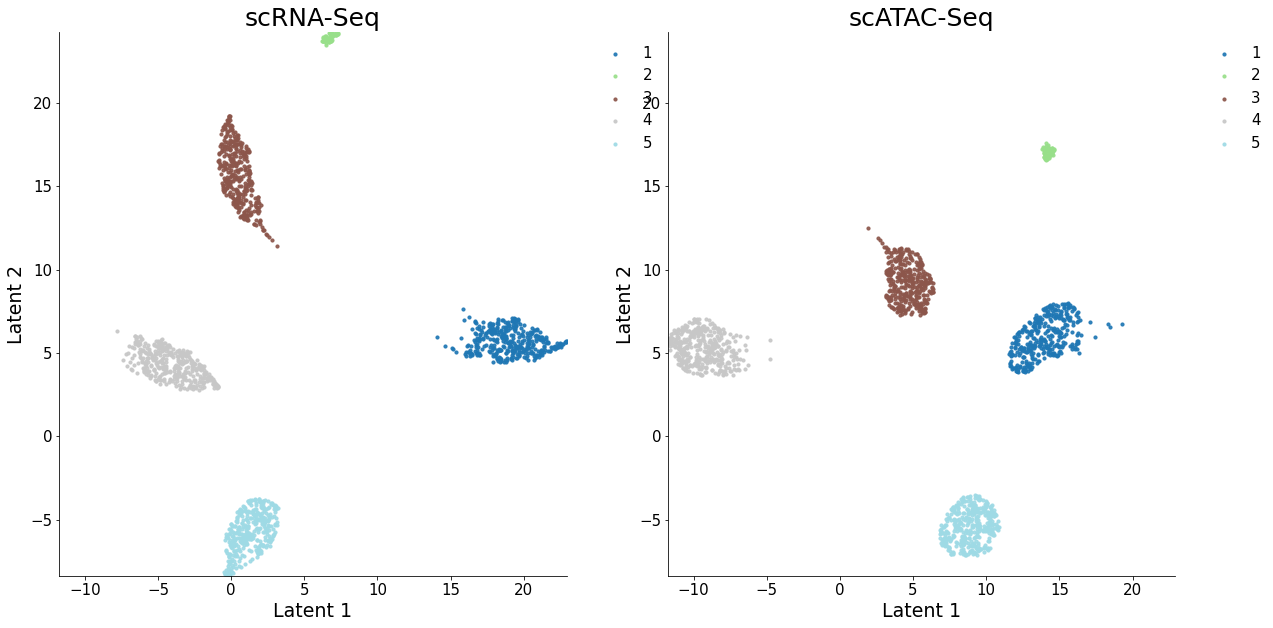

In [27]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = model1.meta_rna["pop"].values[:,None]
label_atac = model1.meta_atac["pop"].values[:,None]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

None


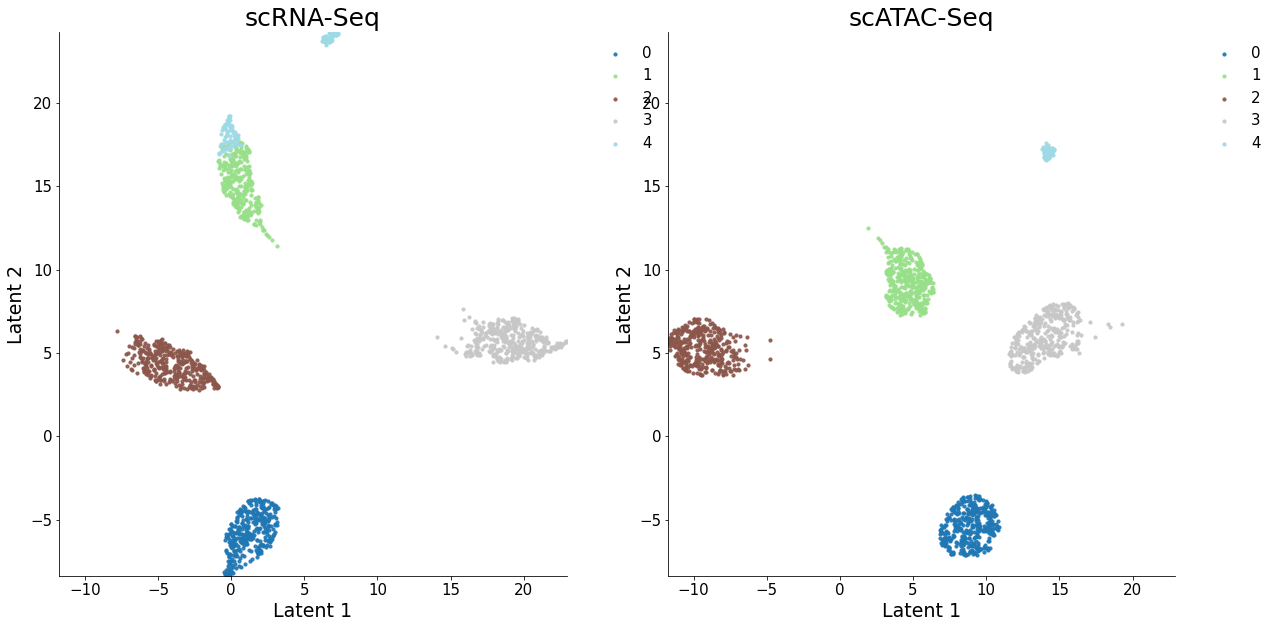

In [28]:
utils.plot_latent(z_rna, z_atac, max_rna, max_atac, mode= "separate", save = None)

# Neural Collaborative Filtering

In [181]:
import deep_model
import importlib 
importlib.reload(deep_model)

<module 'deep_model' from '/storage/hive/project/cse-vuduc/zzhang834/CFRM/src/deep_model.py'>

In [182]:
alpha = torch.FloatTensor([5000, 0.1, 0.00, 1])
deep_cfrm = deep_model.deep_cfrm(dir = '../data/simulated/2b3c_ziqi1/', N = 5, 
                                 batch_size = 0.1, interval = 1, lr = 5e-4, alpha = alpha).to(device)


deep_cfrm.train_func(T=10000)

Epoch 1, Validating Loss: 2990.0701
	 loss RNA: 0.03890
	 loss ATAC: 27760.04102
	 loss gact: 0.00000
	 loss entropy: 19.58524
Epoch 2, Validating Loss: 2954.6250
	 loss RNA: 0.03955
	 loss ATAC: 27382.99219
	 loss gact: 0.00000
	 loss entropy: 18.59970
Epoch 3, Validating Loss: 2962.8474
	 loss RNA: 0.03687
	 loss ATAC: 27597.36133
	 loss gact: 0.00000
	 loss entropy: 18.73936
Epoch 4, Validating Loss: 2968.7888
	 loss RNA: 0.03863
	 loss ATAC: 27578.17969
	 loss gact: 0.00000
	 loss entropy: 17.80131
Epoch 5, Validating Loss: 2968.5200
	 loss RNA: 0.03700
	 loss ATAC: 27663.59961
	 loss gact: 0.00000
	 loss entropy: 17.14341
Epoch 6, Validating Loss: 2951.2224
	 loss RNA: 0.03755
	 loss ATAC: 27466.47656
	 loss gact: 0.00000
	 loss entropy: 16.84102
Epoch 7, Validating Loss: 2964.1536
	 loss RNA: 0.03780
	 loss ATAC: 27589.16406
	 loss gact: 0.00000
	 loss entropy: 16.24465
Epoch 8, Validating Loss: 2938.6252
	 loss RNA: 0.03675
	 loss ATAC: 27389.31641
	 loss gact: 0.00000
	 loss en

Epoch 66, Validating Loss: 2673.0647
	 loss RNA: 0.03178
	 loss ATAC: 24988.29688
	 loss gact: 0.00000
	 loss entropy: 15.31099
Epoch 67, Validating Loss: 2648.9521
	 loss RNA: 0.03283
	 loss ATAC: 24697.61328
	 loss gact: 0.00000
	 loss entropy: 15.04784
Epoch 68, Validating Loss: 2676.2939
	 loss RNA: 0.03372
	 loss ATAC: 24923.85938
	 loss gact: 0.00000
	 loss entropy: 15.32336
Epoch 69, Validating Loss: 2587.7864
	 loss RNA: 0.03409
	 loss ATAC: 24011.67188
	 loss gact: 0.00000
	 loss entropy: 16.17043
Epoch 70, Validating Loss: 2575.7759
	 loss RNA: 0.03385
	 loss ATAC: 23913.01758
	 loss gact: 0.00000
	 loss entropy: 15.23496
Epoch 71, Validating Loss: 2625.0342
	 loss RNA: 0.03383
	 loss ATAC: 24403.66992
	 loss gact: 0.00000
	 loss entropy: 15.54150
Epoch 72, Validating Loss: 2569.2817
	 loss RNA: 0.03508
	 loss ATAC: 23773.09961
	 loss gact: 0.00000
	 loss entropy: 16.56869
Epoch 73, Validating Loss: 2573.9138
	 loss RNA: 0.03360
	 loss ATAC: 23904.67578
	 loss gact: 0.00000
	

Epoch 136, Validating Loss: 1980.1174
	 loss RNA: 0.03307
	 loss ATAC: 17951.32812
	 loss gact: 0.00000
	 loss entropy: 19.62746
Epoch 137, Validating Loss: 1887.3909
	 loss RNA: 0.03251
	 loss ATAC: 17059.26953
	 loss gact: 0.00000
	 loss entropy: 18.89309
Epoch 138, Validating Loss: 2052.5996
	 loss RNA: 0.03213
	 loss ATAC: 18723.76953
	 loss gact: 0.00000
	 loss entropy: 19.56177
Epoch 139, Validating Loss: 2061.2205
	 loss RNA: 0.03318
	 loss ATAC: 18756.89062
	 loss gact: 0.00000
	 loss entropy: 19.64936
Epoch 140, Validating Loss: 1958.1655
	 loss RNA: 0.03243
	 loss ATAC: 17765.42969
	 loss gact: 0.00000
	 loss entropy: 19.49327
Epoch 141, Validating Loss: 1978.2946
	 loss RNA: 0.03352
	 loss ATAC: 17910.00195
	 loss gact: 0.00000
	 loss entropy: 19.70079
Epoch 142, Validating Loss: 1925.8425
	 loss RNA: 0.03278
	 loss ATAC: 17421.33789
	 loss gact: 0.00000
	 loss entropy: 19.82843
Epoch 143, Validating Loss: 2074.8079
	 loss RNA: 0.03364
	 loss ATAC: 18871.68164
	 loss gact: 0

Epoch 226, Validating Loss: 1917.8501
	 loss RNA: 0.03262
	 loss ATAC: 17340.77734
	 loss gact: 0.00000
	 loss entropy: 20.66985
Epoch 227, Validating Loss: 2052.4468
	 loss RNA: 0.03251
	 loss ATAC: 18686.39062
	 loss gact: 0.00000
	 loss entropy: 21.27175
Epoch 228, Validating Loss: 2059.0642
	 loss RNA: 0.03223
	 loss ATAC: 18761.21094
	 loss gact: 0.00000
	 loss entropy: 21.78184
Epoch 229, Validating Loss: 1985.3270
	 loss RNA: 0.03436
	 loss ATAC: 17936.77734
	 loss gact: 0.00000
	 loss entropy: 19.86641
Epoch 230, Validating Loss: 1952.6193
	 loss RNA: 0.03234
	 loss ATAC: 17698.03516
	 loss gact: 0.00000
	 loss entropy: 21.11569
Epoch 231, Validating Loss: 2059.0774
	 loss RNA: 0.03372
	 loss ATAC: 18698.41602
	 loss gact: 0.00000
	 loss entropy: 20.62061
Epoch 232, Validating Loss: 1882.9871
	 loss RNA: 0.03327
	 loss ATAC: 16962.83594
	 loss gact: 0.00000
	 loss entropy: 20.37214
Epoch 233, Validating Loss: 2007.0691
	 loss RNA: 0.03233
	 loss ATAC: 18243.76953
	 loss gact: 0

None


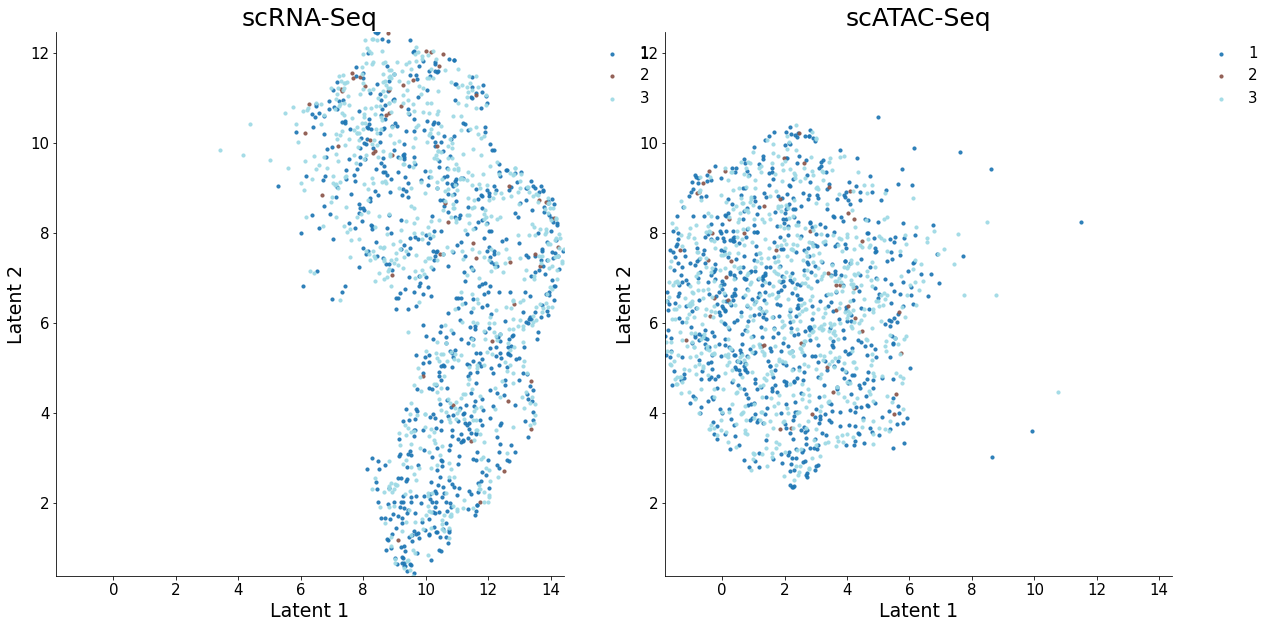

In [184]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 


z_rna = deep_cfrm.ncf.proj_b1(torch.eye(deep_cfrm.G.shape[0]).to(device)).detach().cpu().numpy()
z_atac = deep_cfrm.ncf.proj_b2(torch.eye(deep_cfrm.R.shape[0]).to(device)).detach().cpu().numpy()

z_rna = F.softmax(deep_cfrm.ncf.proj_b1(torch.eye(deep_cfrm.G.shape[0]).to(device)), dim = 1).detach().cpu().numpy()
z_atac = F.softmax(deep_cfrm.ncf.proj_b2(torch.eye(deep_cfrm.R.shape[0]).to(device)), dim = 1).detach().cpu().numpy()


max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = deep_cfrm.meta_rna["pop"].values[:,None]
label_atac = deep_cfrm.meta_atac["pop"].values[:,None]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [51]:
class sc_cfrm(Module):
    def __init__(self, dir = "../data/simulated/2b3c_ziqi1/", N=3, batch_size=512, interval=10, lr=1e-3, init='svd'):
        super().__init__()
        self.N = N
        self.batch_size = batch_size
        self.interval = interval
        self.alpha = torch.FloatTensor([1000, 1000, 1, 1, 1]).to(device)
        # data
        counts_rna = pd.read_csv(dir + "GxC1.txt", sep = "\t", header = None).values.T
        counts_atac = pd.read_csv(dir + "RxC2.txt", sep = "\t", header = None).values.T
        gact = pd.read_csv(dir + "region2gene.txt", sep = "\t", header = None).values.T

        counts_rna = utils.preprocess(counts_rna, mode = "quantile", modality = "RNA")
        counts_atac = utils.preprocess(counts_atac, mode = "quantile", modality = "ATAC")
        gact = utils.preprocess(gact, mode = "gact")

        counts_rna = counts_rna/np.max(counts_rna)
        counts_atac = counts_atac/np.max(counts_atac)

        self.G = torch.FloatTensor(counts_rna).to(device)
        self.R = torch.FloatTensor(counts_atac).to(device)
        self.A = torch.FloatTensor(gact).to(device)

        self.Ar = Parameter(torch.randn((N,N)))
        self.Ag = Parameter(torch.randn((N,N)))
        # self.Ar = torch.eye(N,N)
        # self.Ag = torch.eye(N,N)

        self.C_1 = Parameter(torch.randn(self.G.shape[0], N))
        self.C_2 = Parameter(torch.randn(self.R.shape[0], N))
        
        # replace C_2 with P @ C_1, where P is a simplex pairing matrix, then C_2 is still simplex
        # self.P = Parameter(torch.randn(self.G.shape[0], self.R.shape[0]))
        
        # low rank decomp
        self.Pl = Parameter(torch.randn(self.G.shape[0], N))
        self.Pr = Parameter(torch.randn(N, self.R.shape[0]))
        
        self.C_g = Parameter(torch.randn(self.G.shape[1], N))
        self.C_r = Parameter(torch.randn(self.R.shape[1], N))
        
        self.s_g = torch.ones(1, self.G.shape[1]).to(device)
        self.s_r = torch.ones(1, self.R.shape[1]).to(device)

        self.b_g = Parameter(torch.zeros(1, self.G.shape[1]))
        self.b_r = Parameter(torch.zeros(1, self.R.shape[1]))
        # self.b_g = torch.zeros(1, self.G.shape[1]).to(device)
        # self.b_r = torch.zeros(1, self.R.shape[1]).to(device)

        self.meta_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), sep = "\t")
        self.meta_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), sep = "\t")
    
        self.optimizer = opt.Adam(self.parameters(), lr=lr)

        # with torch.no_grad():
        #     loss, *_ = self.batch_loss('valid')
        #     print('Initial Loss is {:.5f}'.format(loss.item()))

    @staticmethod
    def softmax(X: torch.Tensor):
        return torch.softmax(X, dim=1)
        # return X
        # return torch.exp(X)

    @staticmethod
    def entropy_loss(C):
        # loss = - F.softmax(C, dim=1) * F.log_softmax(C, dim=1)
        loss = - C * torch.log(C)
        return loss.sum(dim=1).mean()

    def batch_loss(self, mode):
        if mode != 'valid':
            mask_1 = np.random.choice(self.G.shape[0], self.batch_size, replace=False)
            mask_2 = np.random.choice(self.R.shape[0], self.batch_size, replace=False)
            mask_g = np.random.choice(self.G.shape[1], self.batch_size, replace=False)
            mask_r = np.random.choice(self.R.shape[1], self.batch_size, replace=False)
            
        if mode == 'C_12':

            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:]) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:]) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r,:].detach()).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            loss3 = 0
            loss4 = 0 
            loss5 = 0
            
        elif mode == "P":
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:]) @ 
                     self.softmax(self.Pr[:,mask_2]) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r,:].detach()).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            loss3 = 0
            loss4 = 0 
            loss5 = self.entropy_loss((self.softmax(self.Pl[mask_1,:]) @ self.softmax(self.Pr[:,mask_2])))
        
        elif mode == 'C_gr':
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :]).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
    
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r, :]).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            # correlation ver
            loss3 = - torch.trace((self.softmax(self.C_g[mask_g,:])/ torch.norm(self.softmax(self.C_g[mask_g,:]), dim = 0)[None,:]).t() @ 
                      self.A[np.ix_(mask_g, mask_r)] @ (self.softmax(self.C_r[mask_r,:])/torch.norm(self.softmax(self.C_r[mask_r,:]), dim = 0)[None,:]))
            
            loss4 = 0 
            loss5 = 0
        
        elif mode == "A":
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ self.Ar @
                     self.softmax(self.C_r[mask_r, :].detach()).t()) - self.b_r[:, mask_r]).pow(2).mean()
            

            loss3 = 0
            loss4 = -torch.trace((self.Ar/torch.norm(self.Ar)).t() @ (self.Ag)/torch.norm(self.Ag))
            loss5 = 0
            
   
        elif mode == 'valid':
            with torch.no_grad():
                loss1 = (self.G - (self.softmax(self.Pl) @ self.softmax(self.Pr) @ 
                         self.softmax(self.C_2) @ self.Ag @
                         self.softmax(self.C_g).t()) - self.b_g).pow(2).mean()
                
                loss2 = (self.R - (self.softmax(self.C_2) @ self.Ar @
                         self.softmax(self.C_r).t()) - self.b_r).pow(2).mean()
                
                # maximize the correlationship
                loss3 = - torch.trace((self.softmax(self.C_g) / torch.norm(self.softmax(self.C_g), dim = 0)[None,:]).t() @ 
                                      self.A @ (self.softmax(self.C_r) / torch.norm(self.softmax(self.C_r), dim = 0)[None,:]))
                
                loss4 = -torch.trace((self.Ar/torch.norm(self.Ar)).t() @ (self.Ag)/torch.norm(self.Ag))
                loss5 = self.entropy_loss((self.softmax(self.Pl) @ self.softmax(self.Pr)))
        else:
            raise NotImplementedError
        loss = self.alpha[0] * loss1 + self.alpha[1] * loss2 + self.alpha[2] * loss3 + self.alpha[3] * loss4 + self.alpha[4] * loss5
               
        return loss, self.alpha[0] * loss1, self.alpha[1] * loss2, self.alpha[2] * loss3, self.alpha[3] * loss4, self.alpha[4] * loss5
    #
    def train_func(self, T):
        best_loss = 1e12
        count = 0
        for t in range(T):
            loss = 0
            for it in range(500):
                mode = 'C_12'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
            loss = 0
            for it in range(500):
                mode = 'P'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
            
            loss = 0
            for it in range(500):
                mode = 'C_gr'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    


            for it in range(500):
                mode = 'A'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
                
            if (t+1) % self.interval == 0:
                loss, loss1, loss2, loss3, loss4, loss5 = self.batch_loss('valid')
                print('Epoch {}, Validating Loss: {:.4f}'.format(t + 1, loss.item()))
                info = [
                    'loss 1: {:.5f}'.format(loss1.item()),
                    'loss 2: {:.5f}'.format(loss2.item()),
                    'loss 3: {:.5f}'.format(loss3.item()),
                    'loss 4: {:.5f}'.format(loss4.item()),
                    'loss 5: {:.5f}'.format(loss5.item())
                ]
                for i in info:
                    print("\t", i)
                if loss.item() < best_loss:
                    best_loss = loss.item()
                    torch.save(self.state_dict(), f'../check_points/real_{self.N}.pt')
                    count = 0
                else:
                    count += 1
                    if count % 20 == 0:
                        self.optimizer.param_groups[0]['lr'] *= 0.5
                        print('Epoch: {}, shrink lr to {:.4f}'.format(t + 1, self.optimizer.param_groups[0]['lr']))
                        if self.optimizer.param_groups[0]['lr'] < 1e-4:
                            break
                        else:
                            self.load_state_dict(torch.load(f'../check_points/real_{self.N}.pt'))
                            count = 0



None


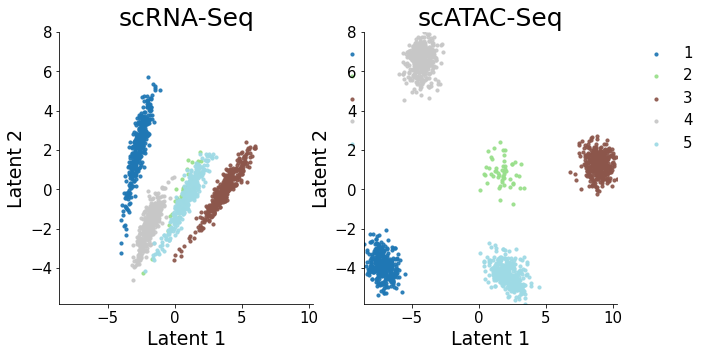

In [10]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = pca_op.fit_transform(model.G.detach().numpy())
z_atac = pca_op.fit_transform(model.R.detach().numpy())

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None, figsize = (10,5))

In [11]:
from scipy.sparse import csr_matrix, linalg
def svd_fast(X, n_pcs = 2):
    U, Sigma, Vh = linalg.svds(X, return_singular_vectors = "u", k = n_pcs, which = "LM")
    return U

In [12]:
z_rna = svd_fast(model.G.detach().numpy())
z_atac = svd_fast(model.R.detach().numpy())

None


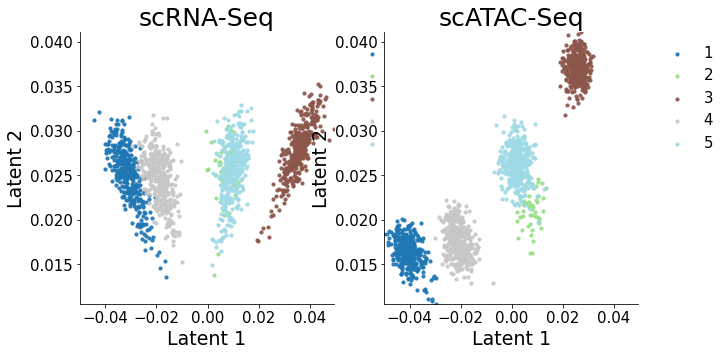

In [13]:
label_rna = model.meta_rna["pop"].values[:,None]
label_atac = model.meta_atac["pop"].values[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None, figsize = (10,5))

In [45]:
model = cfrmModel(dir = '../data/simulated/2b5c_ziqi1/', N=3, batch_size = 512, init = "svd")
model.train_func(T=100)

0.39255449175834656
0.3472805917263031
0.0450749546289444
0.000198934183572419
Epoch 1, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 2, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 3, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 4, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 5, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 6, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 7, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 8, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 9, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 10, Training Loss: 0.3926
	 loss RNA: 0.34

Epoch 84, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 85, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 86, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 87, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020


KeyboardInterrupt: 

In [46]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

In [50]:
dir = '../data/simulated/2b5c_ziqi1/'
meta_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), sep = "\t")
meta_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), sep = "\t")
label_rna = meta_rna["pop"].values[:,None]
label_atac = meta_atac["pop"].values[:,None]

None


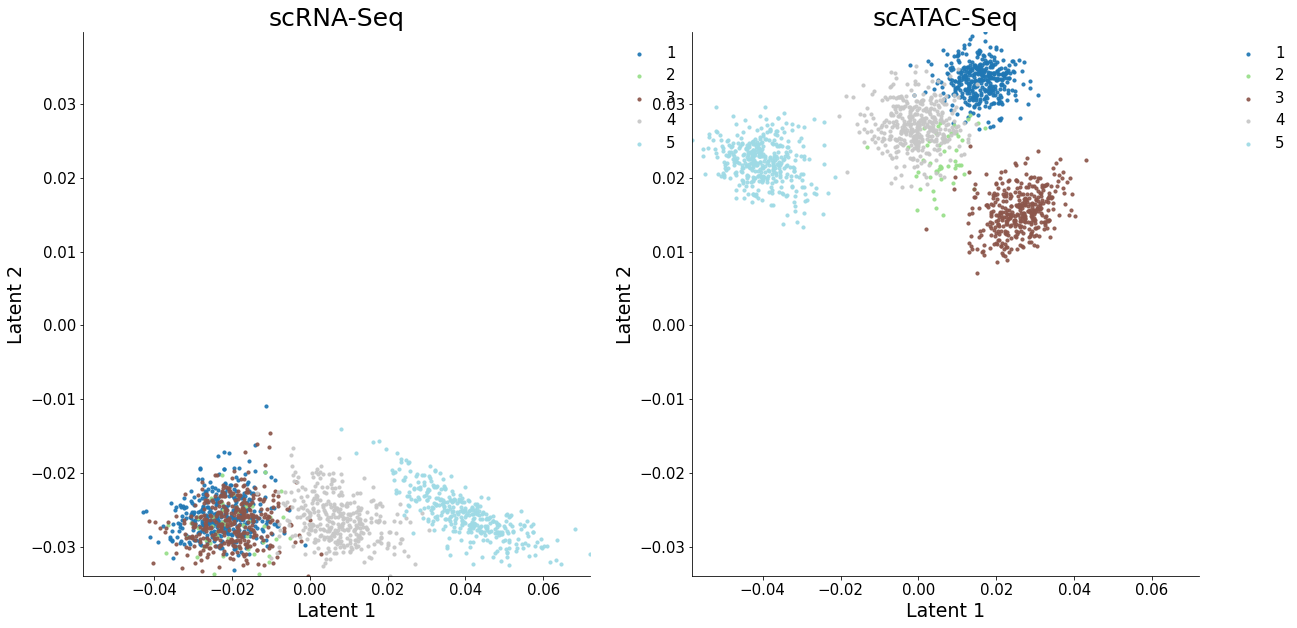

In [51]:
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [27]:
model = cfrmModel(dir = '../data/simulated/2batches_3clusts', N=3, dropout=0, init = "svd")
model.train_func(T=1000)

0.2704484164714813
0.2241944968700409
0.04583536460995674
0.0004185508587397635
Epoch 1, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042


KeyboardInterrupt: 

None


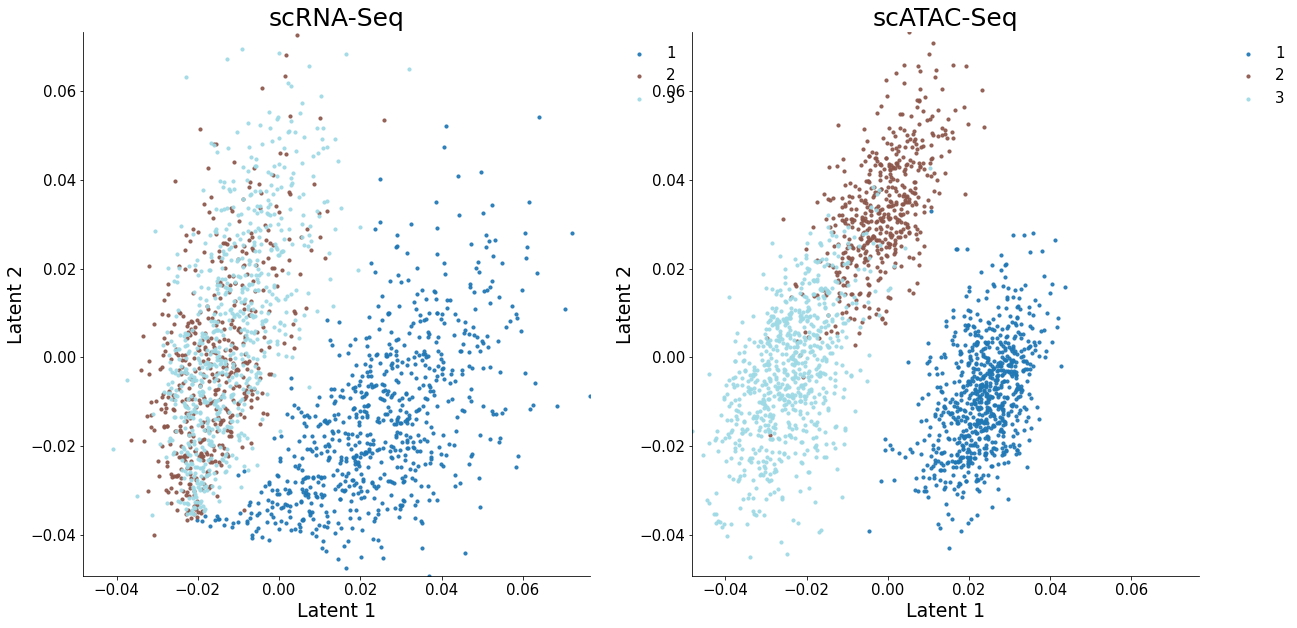

In [28]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [29]:
model = cfrmModel(dir = '../data/simulated/2batches_6clusts', N=3, dropout=0, init = "random")
model.train_func(T=100)

1.1414905786514282
1.0413411855697632
0.09973078221082687
0.0004186659352853894
Epoch 1, Training Loss: 0.3652
	 loss RNA: 0.28159
	 loss ATAC: 0.08321
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2638
	 loss RNA: 0.21496
	 loss ATAC: 0.04846
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2599
	 loss RNA: 0.21157
	 loss ATAC: 0.04789
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2596
	 loss RNA: 0.21145
	 loss ATAC: 0.04776
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2596
	 loss RNA: 0.21144
	 loss ATAC: 0.04771
	 loss gene act: 0.00042
Epoch 6, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04767
	 loss gene act: 0.00042
Epoch 7, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04764
	 loss gene act: 0.00042
Epoch 8, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04763
	 loss gene act: 0.00042
Epoch 9, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04761
	 loss gene act: 0.00042
Epoch 10, Training Loss: 0.2595
	 loss RNA: 0.2

KeyboardInterrupt: 

None


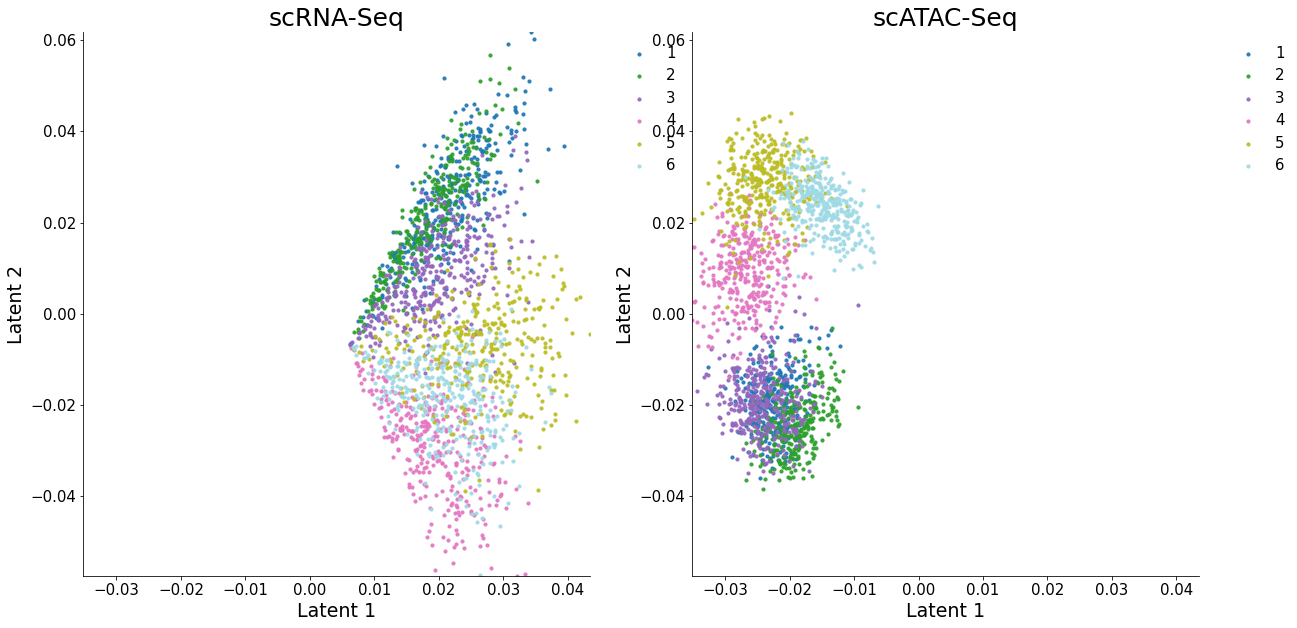

In [30]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [31]:
model = cfrmModel(dir = '../data/simulated/2batches_6clusts', N=3, dropout=0, init = "svd")
model.train_func(T=100)

0.25944381952285767
0.21143664419651031
0.04758860915899277
0.0004185651778243482
Epoch 1, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 6, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042


KeyboardInterrupt: 

None


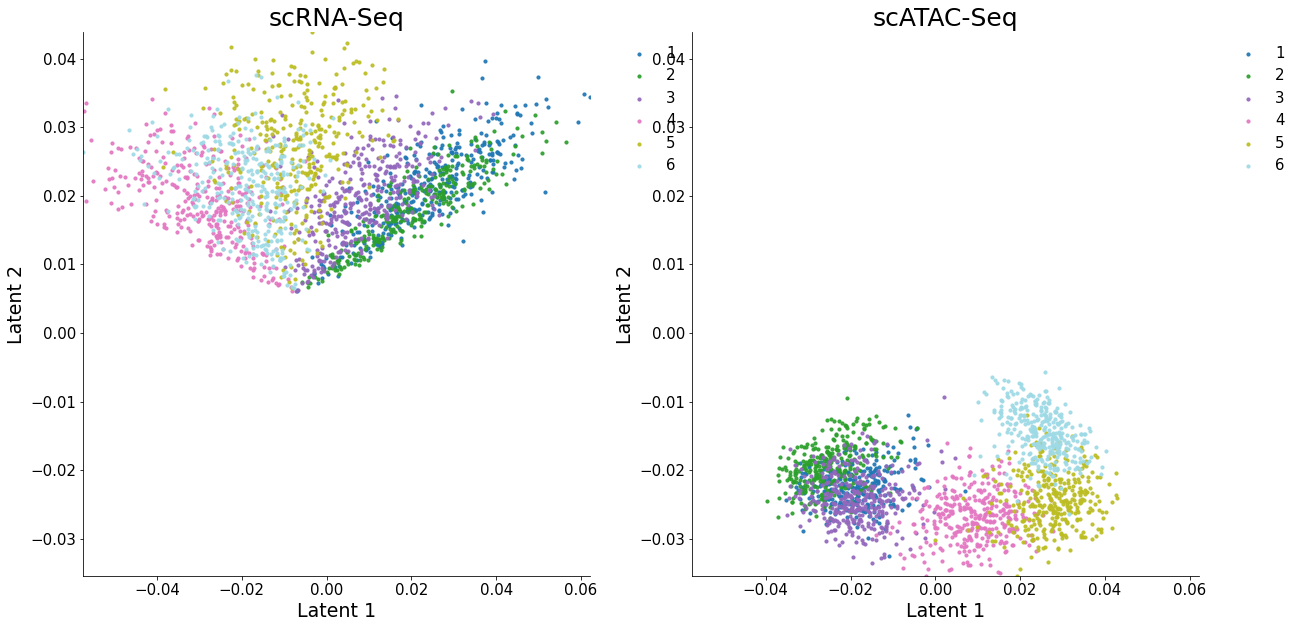

In [32]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)